# **Marketing Campaign Analysis**

## **Problem Definition**

### **The Context:**

Whether marketing to active or past customers, each campaign has a success metric (for example: percent increase in conversions, total number of leads generated, or downloads of an app).  Also, while there is also a cost associated with the effort, skills and labor that campaigns require, most companies cannot afford to simply not engage with marketing either, as marketing is often associated with engagement and growth.

As collecting customer data becomes more common, especially with online shopping and rewards programs, it is possible to conduct analysis on the data to both gather insights about customers and improve the chances of marketing campaigns succeeding.

A particularly successful method of marketing is customer segmentation.  Via customer segmentation, it is possible to group customers with similar profiles and behaviors so that marketing campaigns can be appropriate targeted and customized.

While manual or non-algorithmic methods can be utilized in segmenting customers, it becomes more difficult with larger customer datasets.  Data science techniques are more efficient and effective in these cases.

### **The objective:**

The objective of this analysis is to perform customer segmentation so that the company may strategize future marketing campaigns by customizing them to different customer groups.

Our approach will involve exploring the data, preparing the data for unsupervised learning, identifying the optimal number of clusters, comparing different clustering models and finally, profiling the clusters.

### **The key questions:**

- What are some general characteristics of the customer dataset?
- What are the different ways we can group our customers, i.e. the most optimized number of customer segments?
- How confident are we in the results of our groupings and methods?
- What are the shared characteristics of each customer segment?
- What is the recommended customized marketing campaign strategy for each customer segment?

### **The problem formulation**:

Using Unsupervised Learning, what do different clustering methods reveal about the customer segments in the given customer dataset and inform us on how to customize marketing strategies?

------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** Data is collected in the year 2016.

## **Import the necessary libraries and load the data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.9 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import skew
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Classes/MIT/ADSP/Coursework/10 - Capstone Project/Capstone Project on Marketing Campaign Analysis based on the domain - Data Analysis & Visualization Unsupervised Learning/marketing_campaign+%284%29.csv')

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values
- Drop the column which has no null values

In [ ]:
data.shape

(2240, 27)

In [ ]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3  10-02-2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0         1  
1             0         0         0  
2             0         0         0  
3             0         0         0  
4             0         0         0  

[5 rows x 27 columns]

In [ ]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

In [ ]:
#Drop ID column
data.drop(['ID'], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [ ]:
# Converting Dt-Customer to Date datatype
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
print(data)

      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0     2012-09-04       

In [ ]:
# Converting Complain and Response columns to Boolean datatypes
data['Complain'] = data['Complain'].astype(bool)
data['Response'] = data['Response'].astype(bool)
print(data)

      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0     2012-09-04       

In [ ]:
# Converting Education and Martial Status to Category datatype
data['Education'] = data['Education'].astype('category')
data['Marital_Status'] = data['Marital_Status'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   category      
 2   Marital_Status       2240 non-null   category      
 3   Income               2216 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

In [ ]:
data.duplicated().sum()

182

In [ ]:
#Drop duplicate records
data.drop_duplicates(inplace=True)

In [ ]:
data.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [ ]:
#Quick check on skewness of Income variable
print(data['Income'].skew())

7.058216394277115


In [ ]:
data

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
0           1957  Graduation         Single   58138.0        0         0   
1           1954  Graduation         Single   46344.0        1         1   
2           1965  Graduation       Together   71613.0        0         0   
3           1984  Graduation       Together   26646.0        1         0   
4           1981         PhD        Married   58293.0        1         0   
...          ...         ...            ...       ...      ...       ...   
2233        1977  Graduation       Together  666666.0        1         0   
2235        1967  Graduation        Married   61223.0        0         1   
2237        1981  Graduation       Divorced   56981.0        0         0   
2238        1956      Master       Together   69245.0        0         1   
2239        1954         PhD        Married   52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0     2012-09-04       58       635         88  ...                   10   
1     2014-03-08       38        11          1  ...                    1   
2     2013-08-21       26       426         49  ...                    2   
3     2014-02-10       26        11          4  ...                    0   
4     2014-01-19       94       173         43  ...                    3   
...          ...      ...       ...        ...  ...                  ...   
2233  2013-06-02       23         9         14  ...                    1   
2235  2013-06-13       46       709         43  ...                    3   
2237  2014-01-25       91       908         48  ...                    3   
2238  2014-01-24        8       428         30  ...                    5   
2239  2012-10-15       40        84          3  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2233                  3                  6             0             0   
2235                  4                  5             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0                0             0             0     False      True  
1                0             0             0     False     False  
2                0             0             0     False     False  
3                0             0             0     False     False  
4                0             0             0     False     False  
...            ...           ...           ...       ...       ...  
2233             0             0             0     False     False  
2235             0             0             0     False     False  
2237             0             0             0     False     False  
2238             0             0             0     False     False  
2239             0             0             0     False      True  

[2058 rows x 26 columns]

In [ ]:
data.shape

(2058, 26)

#### **Observations and Insights from the Data overview:**

#### **Overall Preparations Made to Data:**

1. Converting Accepted Campaign, Complain and Response to Boolean datatype
2. Converting Customer Date to date datatype
3. Imputing missing income values with the median
4. Dropping the ID variable
5. Dropping duplicate records

**Data Types:**

Most of the data has the correct data type, which a few exceptions.

Integer to Boolean Data Types

*   The Complain and Response variables are all currently integer datatypes.  However, since the values are 1 (True) and 0 (False), it was more appropriate to convert them to a Boolean datatype.
*   As for Accepted Campaign, we will be needing it to calculate Total Accepted Campaigns, so I will be leaving it as a numerical value.

There are 3 object data types: Education, Martial Status, and Customer Date.
*   I converted the data type of Customer Date to a Date data type (so as to allow it to be used for calculating customer lifetime later).
*   Education and Martial Status are categorical variables (with currently 5 and 8 categories, respectively).  I converted these from object to a categorical data type.

Lastly, it is worth mentioning that KidHome and TeenHome each have only 3 unique values.  Since the difference between kids and teens is not clearly defined, it may be worthwhile to note that creating a 'children' variable would be helpful.

**Missing Values:**

There are missing values in the income variable.  It seems on the outset that the Income variable is highly skewed and therefore needs to be imputed with the Median.  However, later in the EDA I discover that removing the outlier impacts this decision.

**Unique Values:**

There are 2240 unique values for the ID variable.  As there are also 2240 entries, I can drop this variable - it will not generate any insights for our purposes of segmentation.

**Duplicate Records:**

There are 182 records that are duplicates that were dropped so as to not bias clustering results with more instances of a specific customer.  After removing duplicate records, the new total number of records is 2058.

## **Exploratory Data Analysis (EDA)**


### **Categorical Variables - Data Preparation**

Prior to any analysis of categorical variables, I first reorganized the categorical variables to ensure the summary statistics would be accurately interpretable.

To summarize, there are only two true categorical variables: Education and Martial Status.

Education originally had 5 unique categories.  Martial Status had 8 unique categories.  Both categorical variables had categories that presented interesting problems.  For example, in Education, the 'Graduation' and 'Basic' categories are ambiguous (uncertain whether they refer to High School or Undergraduate graduations).  Also, Martial Status had categories that are ambiguous, such as 'Absurd' and 'YOLO' which are not meaningful for our customer segmentation analysis.

There were also are some categories that can be combined.  For example, 2n cycles refer to levels after undergrad but before PhD.  Although it can include certificates, it is otherwise most similar to a Master's degree, so I can combine '2n Cycle' with the Master category.

The categories Alone, Absurd and YOLO that have a low count.
 Upon checking the counts of each unique category of each categorical variable, I consolidated certain categories, namely Absurd and YOLO.

It is uncertain whether 'Alone' means Single, Divorced or Widow.  Therefore, I combined these as 'Alone'.  Likewise, 'Together' and 'Married' were similar, so these were combined.  Lastly, it cannot be determined what 'Absurd' and 'YOLO' means in terms of martial status.  Therefore, I replaced these values with Not Available.

In [ ]:
#Checking categories within Education and Martial Status
category_columns = ['Education', 'Marital_Status']
for column in category_columns:
    print(data[column].value_counts())

Education
Graduation    1030
PhD            450
Master         341
2n Cycle       188
Basic           49
Name: count, dtype: int64
Marital_Status
Married     795
Together    521
Single      448
Divorced    216
Widow        71
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [ ]:
#Replacing 2n Cycle with Master
data['Education'] = data['Education'].replace('2n Cycle', 'Master')

#Combining Single, Divorced, Widow and Alone as 'Alone'
data['Marital_Status'] = data['Marital_Status'].replace(['Single', 'Divorced', 'Widow'], 'Alone')

#Combining Together and Married as 'Together'
data['Marital_Status'] = data['Marital_Status'].replace(['Married'], 'Together')

#Replacing Absurd and YOLO with Unknown
data['Marital_Status'] = data['Marital_Status'].replace(['Absurd', 'YOLO'], np.nan)

for column in category_columns:
    print(data[column].value_counts())

Education
Graduation    1030
Master         529
PhD            450
Basic           49
Name: count, dtype: int64
Marital_Status
Together    1316
Alone        738
Name: count, dtype: int64


### **Univariate Analysis on Numerical and Categorical data**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

**Numerical Variables**

In [ ]:
data.describe()

Year_Birth         Income      Kidhome     Teenhome  \
count  2058.000000    2034.000000  2058.000000  2058.000000   
mean   1968.787172   52357.791544     0.445578     0.509232   
min    1893.000000    1730.000000     0.000000     0.000000   
25%    1959.000000   35528.250000     0.000000     0.000000   
50%    1970.000000   51533.000000     0.000000     0.000000   
75%    1977.000000   68480.750000     1.000000     1.000000   
max    1996.000000  666666.000000     2.000000     2.000000   
std      11.973898   25526.956988     0.537556     0.546489   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2058  2058.000000  2058.000000  2058.000000   
mean   2013-07-11 12:50:22.740524800    48.951895   303.921769    26.234694   
min              2012-07-30 00:00:00     0.000000     0.000000     0.000000   
25%              2013-01-17 00:00:00    24.000000    23.000000     1.000000   
50%              2013-07-12 00:00:00    49.000000   174.000000     8.000000   
75%              2014-01-01 00:00:00    74.000000   504.000000    33.000000   
max              2014-06-29 00:00:00    99.000000  1493.000000   199.000000   
std                              NaN    28.999189   336.528217    39.750728   

       MntMeatProducts  MntFishProducts  ...  NumDealsPurchases  \
count      2058.000000      2058.000000  ...        2058.000000   
mean        167.704568        37.329446  ...           2.339164   
min           0.000000         0.000000  ...           0.000000   
25%          16.000000         3.000000  ...           1.000000   
50%          67.000000        12.000000  ...           2.000000   
75%         229.500000        50.000000  ...           3.000000   
max        1725.000000       259.000000  ...          15.000000   
std         228.303238        54.657215  ...           1.942947   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2058.000000          2058.000000        2058.000000   
mean          4.098639             2.660836           5.770651   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   
std           2.797577             2.933824           3.239113   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2058.000000   2058.000000   2058.000000   2058.000000   
mean            5.319728      0.073372      0.076774      0.071914   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   
std             2.439907      0.260810      0.266297      0.258409   

       AcceptedCmp1  AcceptedCmp2  
count   2058.000000   2058.000000  
mean       0.065598      0.012148  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  
std        0.247638      0.109572  

[8 rows x 22 columns]

In [ ]:
numerical_columns = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

for column in numerical_columns:
    skewness = skew(data[column])
    print(column,':', skewness)

Income : nan
Kidhome : 0.6209997641114658
Teenhome : 0.41036055720032194
Recency : 0.0021232527927704946
MntWines : 1.1735649098052374
MntFruits : 2.106574921242605
MntMeatProducts : 2.103045571237239
MntSweetProducts : 2.1485630094602257
MntGoldProds : 1.9036726808041555
NumDealsPurchases : 2.4376177043718155
NumWebPurchases : 1.4253401831986279
NumCatalogPurchases : 1.9495154380601074
NumStorePurchases : 0.7010009831752313
NumWebVisitsMonth : 0.2524508912682745


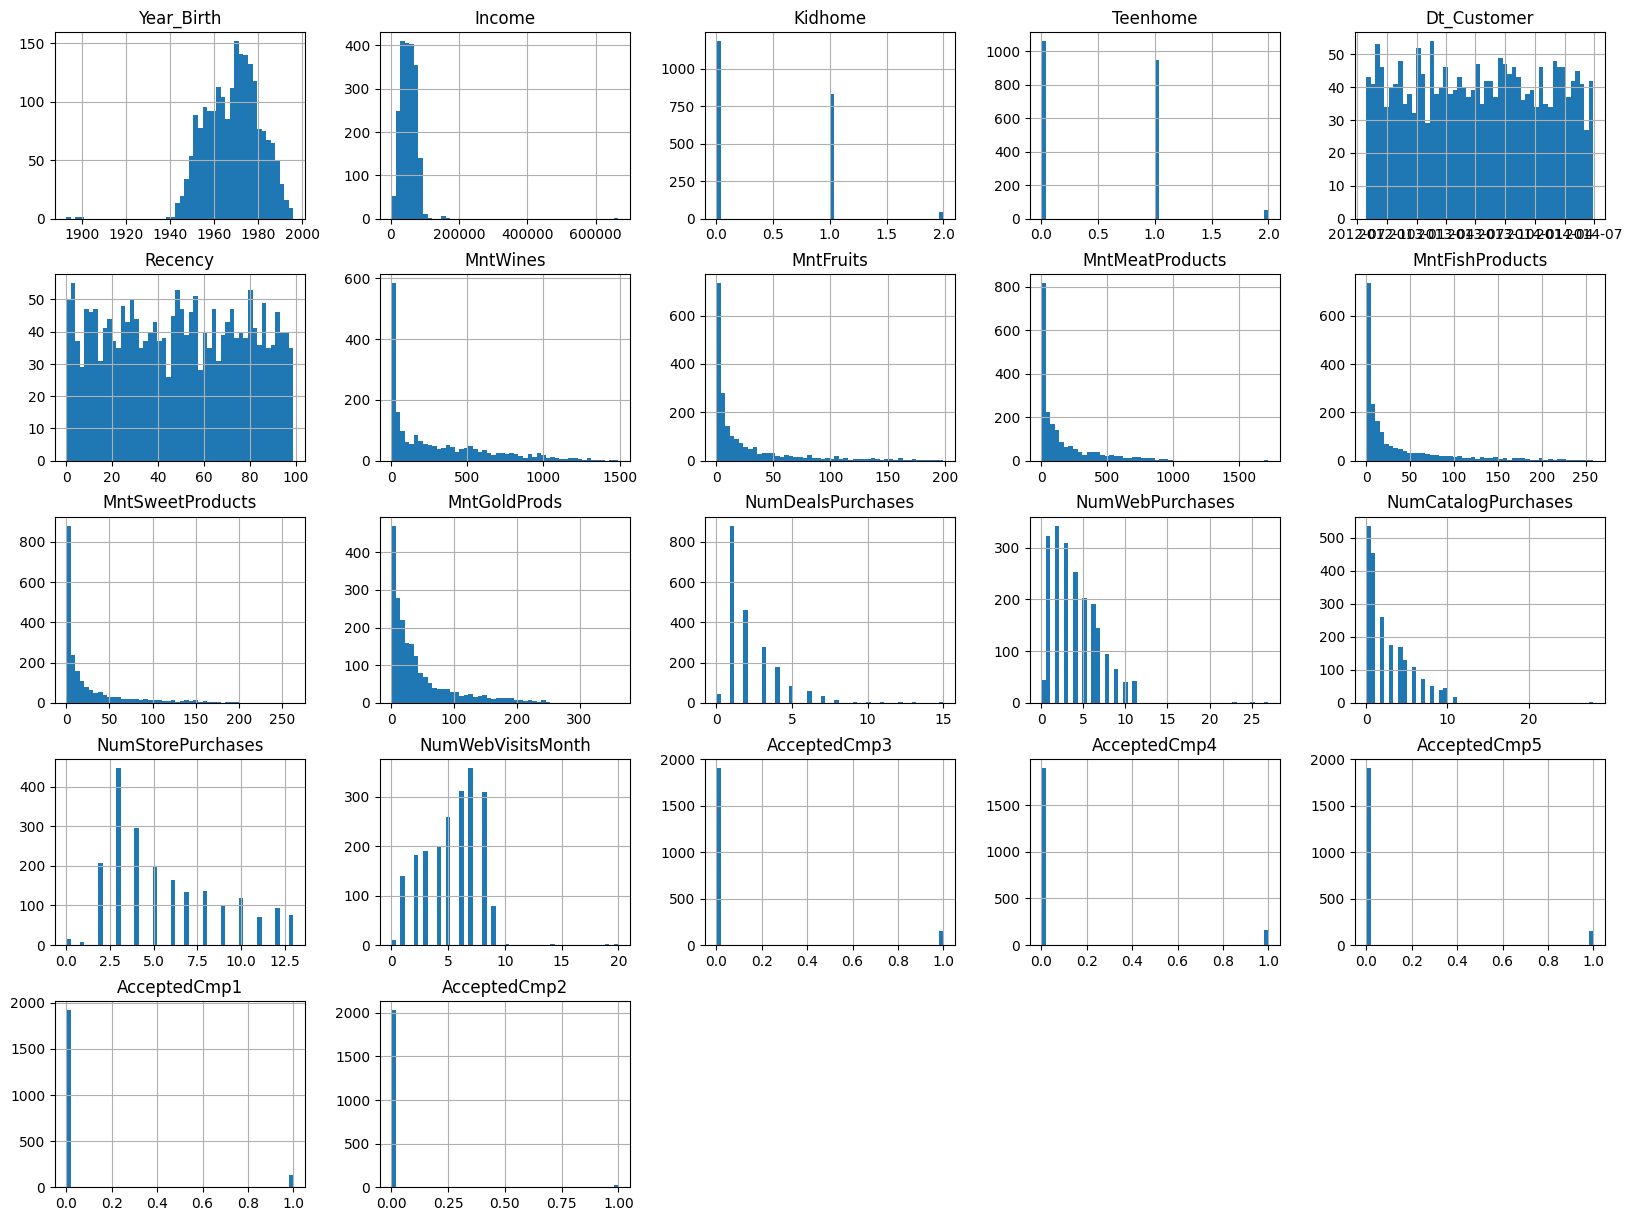

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

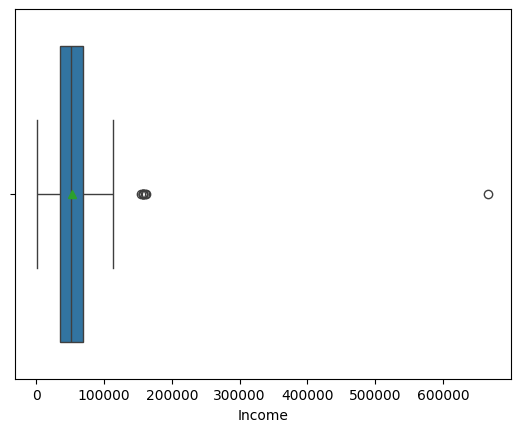

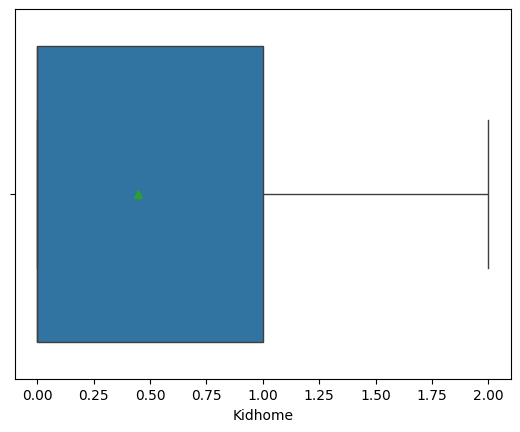

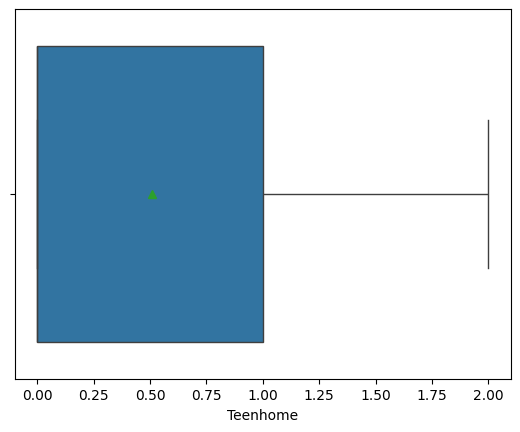

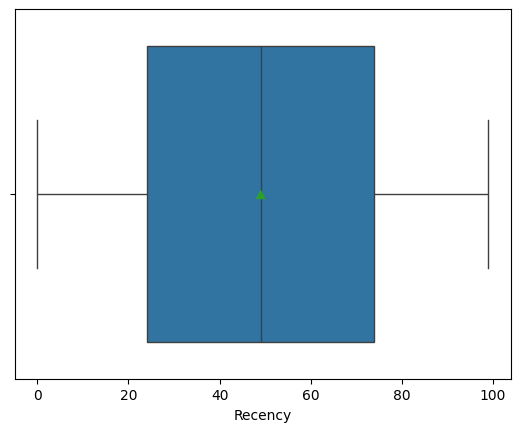

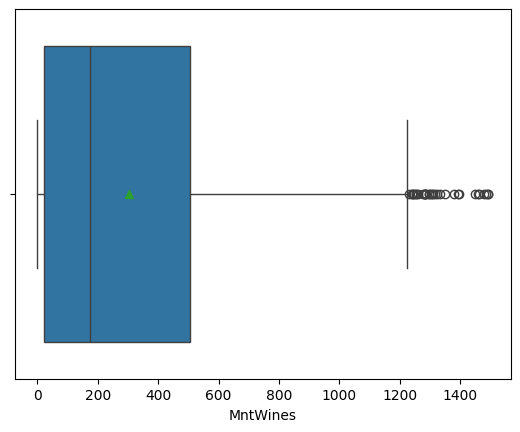

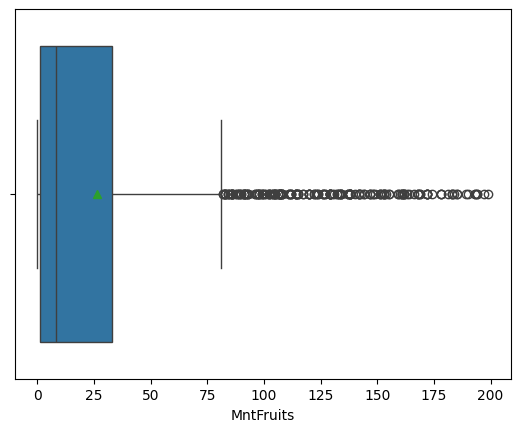

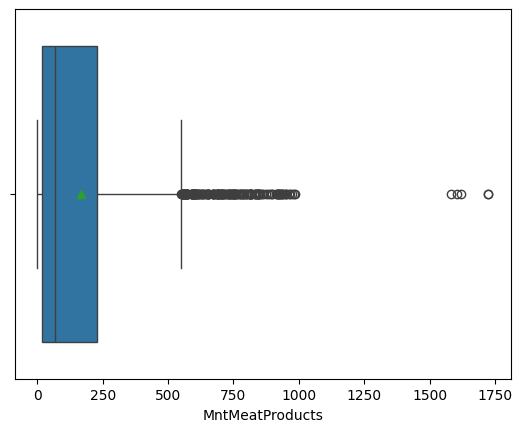

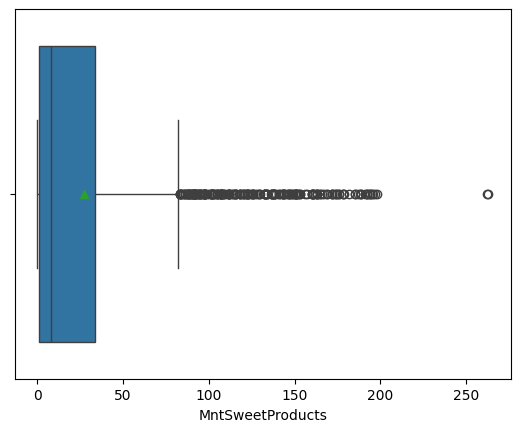

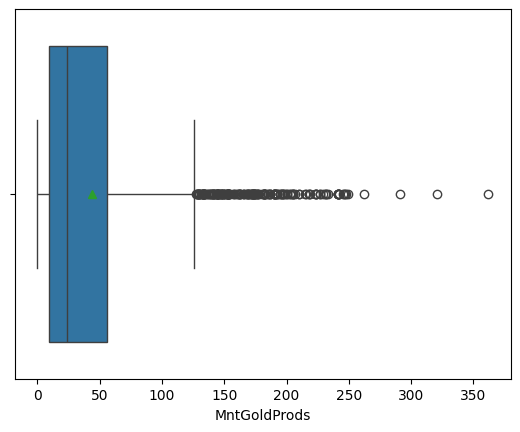

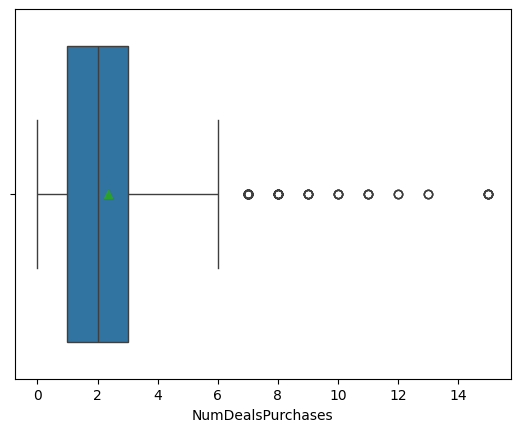

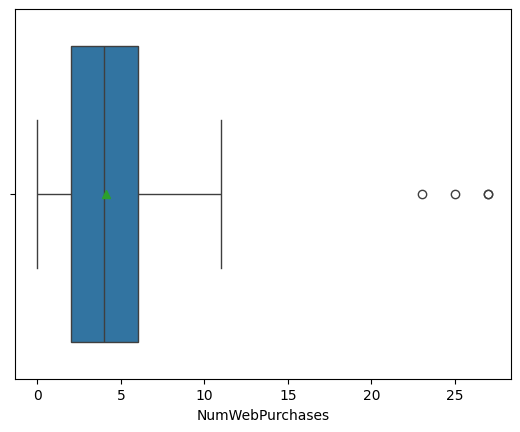

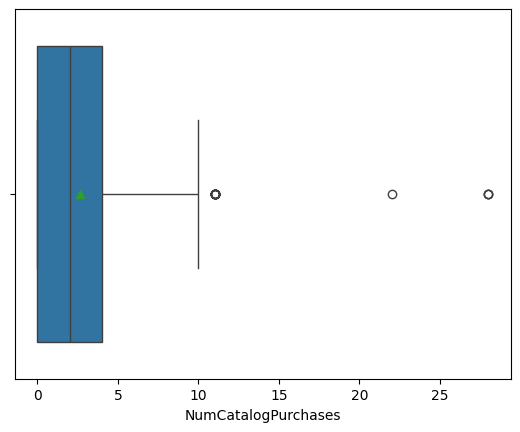

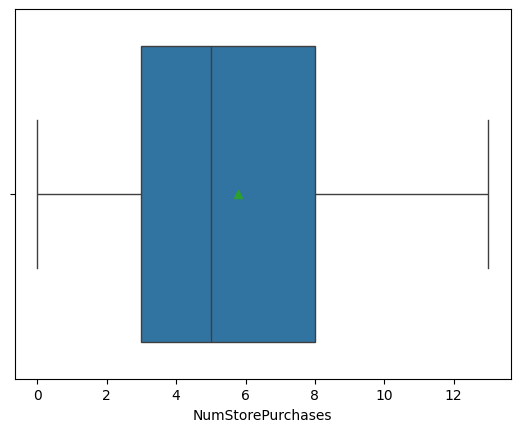

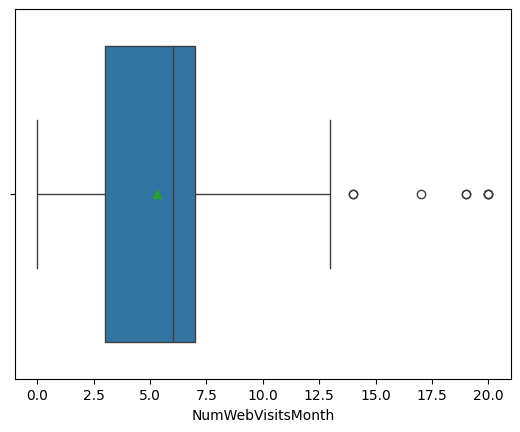

In [ ]:
for column in numerical_columns:
  sns.boxplot(data=data[column], showmeans=True, orient='h')
  plt.show()

In [ ]:
outlier_income = []

for x in data['Income']:
  if x > 200000:
    outlier_income.append(x)

print(outlier_income)

[666666.0]


In [ ]:
#Replace income outlier value with Mean - possibly an error in data entry
mean_income = data['Income'].mean()
data['Income'] = data['Income'].replace(666666, mean_income)

In [ ]:
outlier_MntSweetProducts = []

for x in data['MntSweetProducts']:
  if x > 250:
    outlier_MntSweetProducts.append(x)

print(outlier_MntSweetProducts)

[263, 262]


**After removing Income outlier, reanalyzing:**

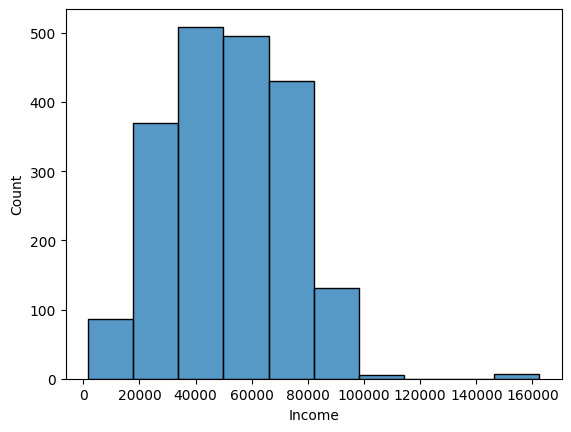

In [ ]:
sns.histplot(data['Income'], bins=10, kde=False)
plt.show()

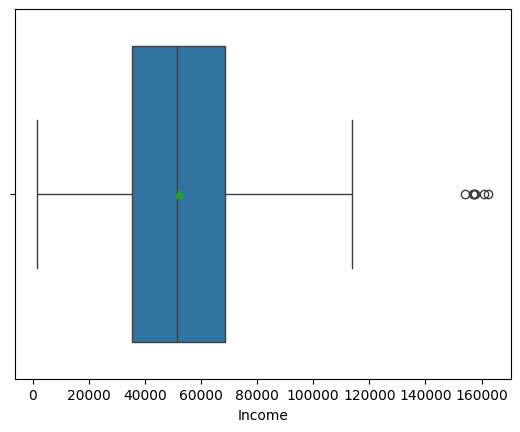

In [ ]:
sns.boxplot(data['Income'], showmeans=True, orient='h')
plt.show()

In [ ]:
data['Income'].describe()

count      2034.000000
mean      52055.771776
std       21584.943566
min        1730.000000
25%       35528.250000
50%       51533.000000
75%       68445.750000
max      162397.000000
Name: Income, dtype: float64

In [ ]:
data['Income'].skew()

0.36654376103560254

**Imputing missing Income values**

In [ ]:
#Using Mean to impute since Income variable is not skewed (after removing outlier)
data['Income'].fillna(data['Income'].mean(), inplace=True)
data.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         4
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

**After removing Amount of Sweets Products outlier, reanalyzing:**

In [ ]:
data['MntSweetProducts'].skew()
#Note: there no change in skewness from 2.1 before

2.150130477350209

**Categorical Variables**

In [ ]:
#Checking category statistics
for column in category_columns:
  category_statistics = data[column].describe()
  print(category_statistics)

count           2058
unique             4
top       Graduation
freq            1030
Name: Education, dtype: object
count         2054
unique           2
top       Together
freq          1316
Name: Marital_Status, dtype: object


In [ ]:
#Calculating percentages within category variables
for column in category_columns:
    percent_cat = data[column].value_counts(normalize=True) * 100
    print(column, ':', percent_cat)

Education : Education
Graduation    50.048591
Master        25.704568
PhD           21.865889
Basic          2.380952
Name: proportion, dtype: float64
Marital_Status : Marital_Status
Together    64.070107
Alone       35.929893
Name: proportion, dtype: float64


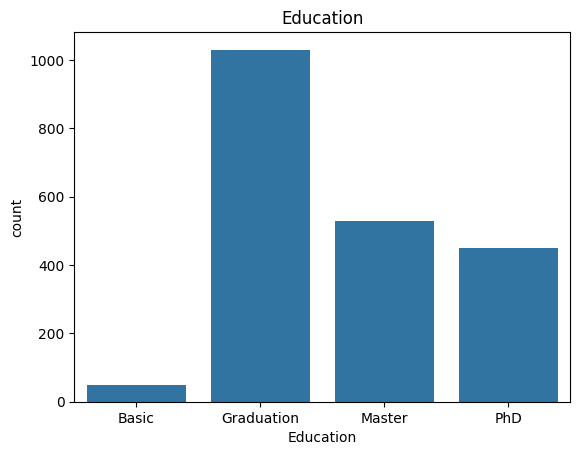

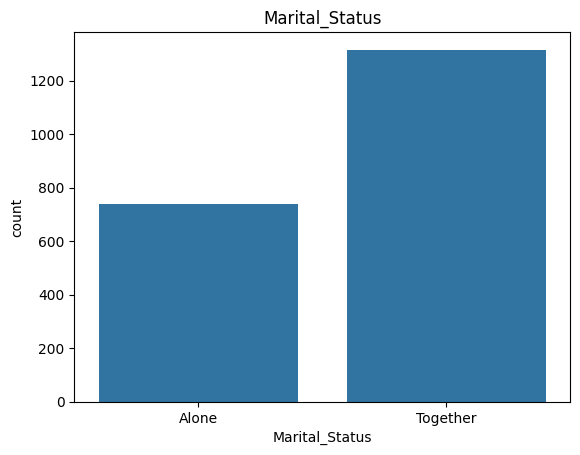

In [ ]:
for column in category_columns:
  sns.countplot(data=data, x=column)
  plt.title(column)
  plt.xlabel(column)
  plt.show()

**Boolean Variables**

In [ ]:
#Summary statistics for Boolean variables
boolean_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']

for column in boolean_columns:
  print(data[column].value_counts())

AcceptedCmp1
0    1923
1     135
Name: count, dtype: int64
AcceptedCmp2
0    2033
1      25
Name: count, dtype: int64
AcceptedCmp3
0    1907
1     151
Name: count, dtype: int64
AcceptedCmp4
0    1900
1     158
Name: count, dtype: int64
AcceptedCmp5
0    1910
1     148
Name: count, dtype: int64
Complain
False    2038
True       20
Name: count, dtype: int64
Response
False    1745
True      313
Name: count, dtype: int64


In [ ]:
#Checking percentages for Boolean variables
for column in boolean_columns:
  percent_bool = (data[column].value_counts(normalize=True)) * 100
  print(column, ':', percent_bool)

AcceptedCmp1 : AcceptedCmp1
0    93.440233
1     6.559767
Name: proportion, dtype: float64
AcceptedCmp2 : AcceptedCmp2
0    98.785228
1     1.214772
Name: proportion, dtype: float64
AcceptedCmp3 : AcceptedCmp3
0    92.662779
1     7.337221
Name: proportion, dtype: float64
AcceptedCmp4 : AcceptedCmp4
0    92.322643
1     7.677357
Name: proportion, dtype: float64
AcceptedCmp5 : AcceptedCmp5
0    92.808552
1     7.191448
Name: proportion, dtype: float64
Complain : Complain
False    99.028183
True      0.971817
Name: proportion, dtype: float64
Response : Response
False    84.791059
True     15.208941
Name: proportion, dtype: float64


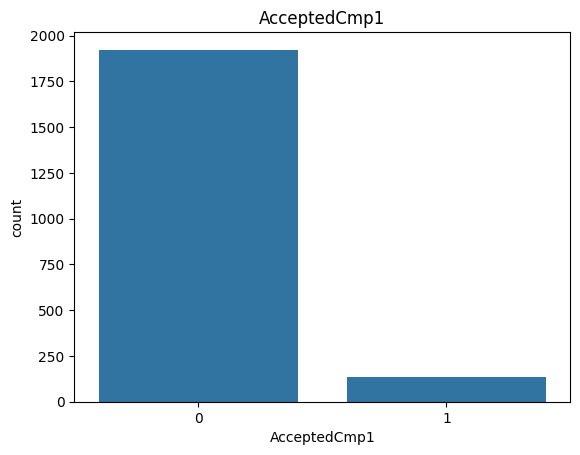

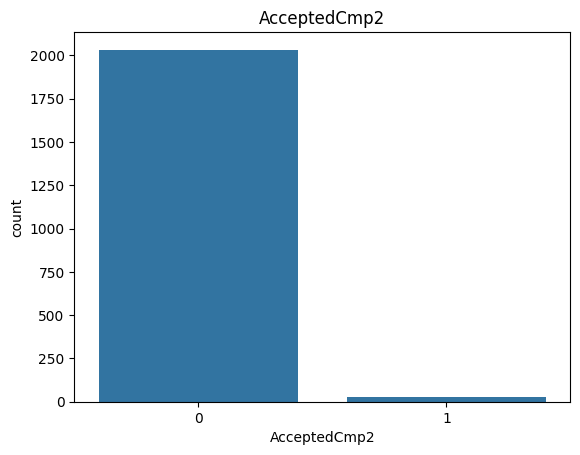

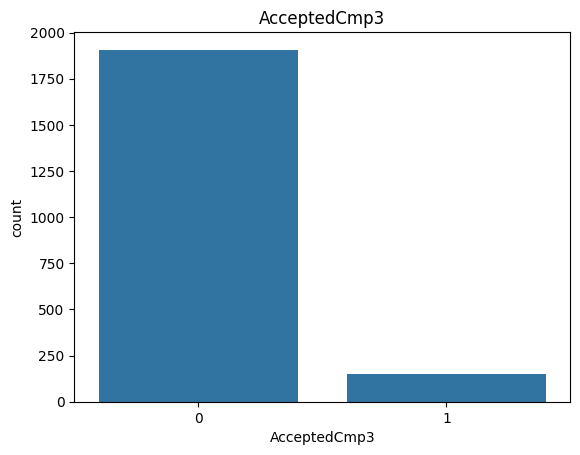

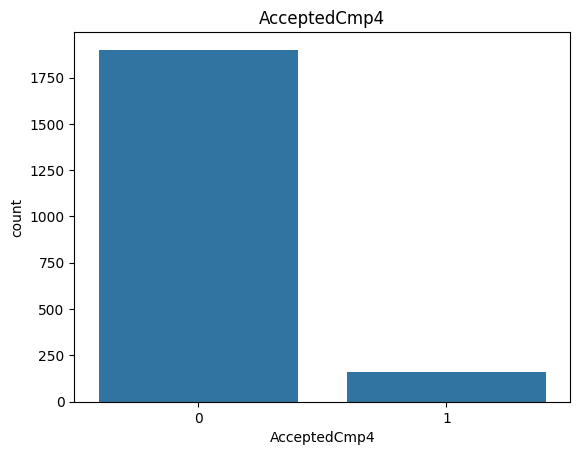

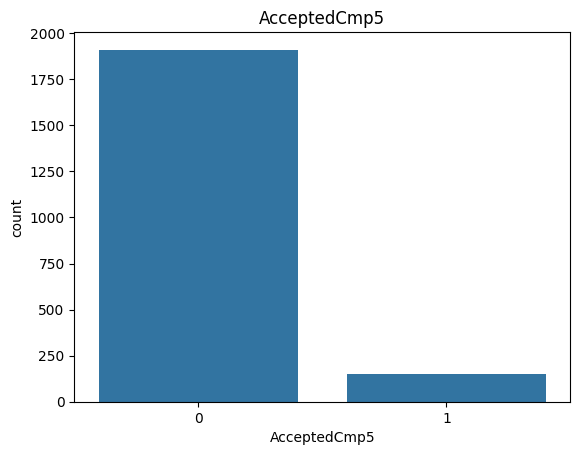

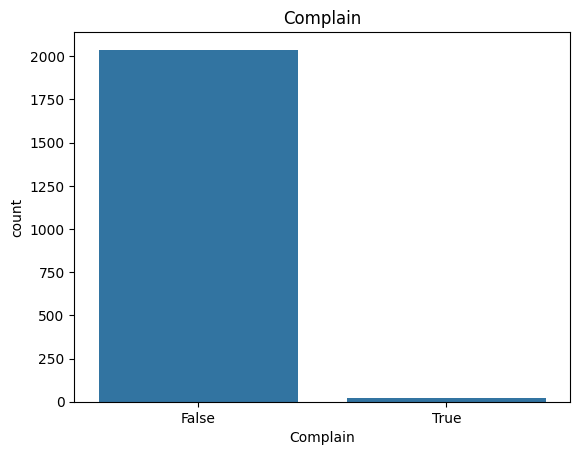

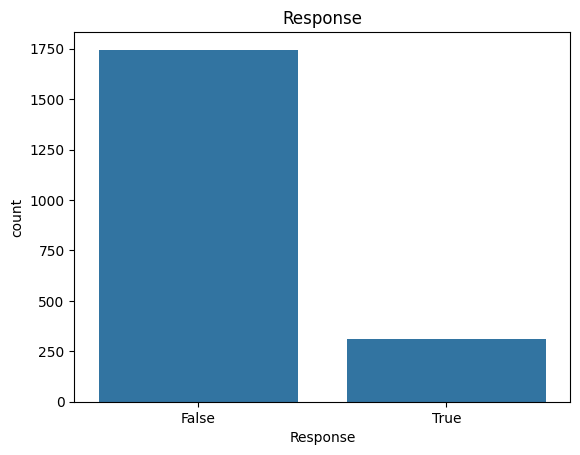

In [ ]:
for column in boolean_columns:
  sns.countplot(data=data, x=column)
  plt.title(column)
  plt.xlabel(column)
  plt.show()

### **Bivariate Analysis**

In [ ]:
category_table = pd.crosstab(data['Education'], data['Marital_Status'])
print(category_table)

Marital_Status  Alone  Together
Education                      
Basic              20        29
Graduation        378       651
Master            178       350
PhD               162       286


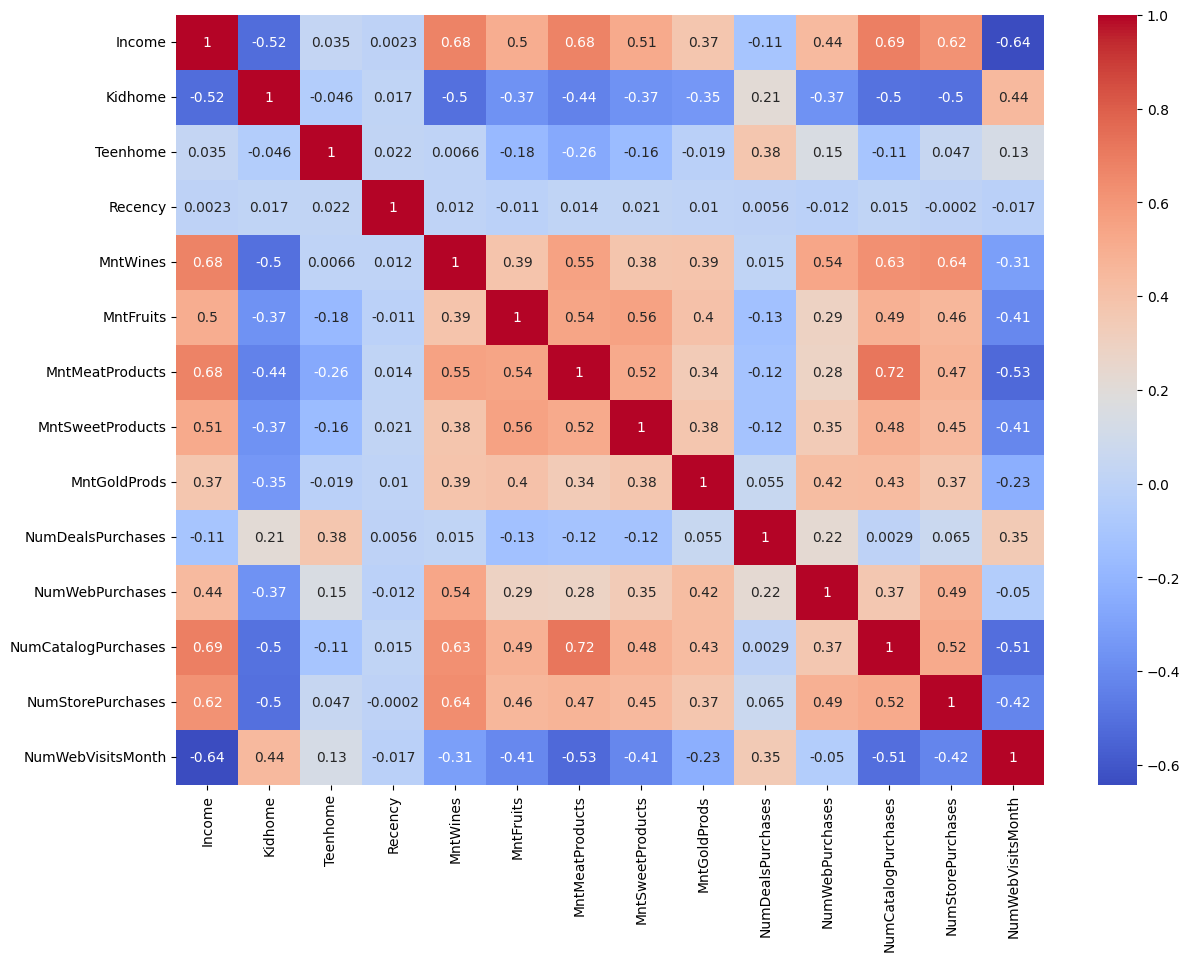

In [ ]:
corr = data[numerical_columns].corr()
plt.figure(figsize = (14,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

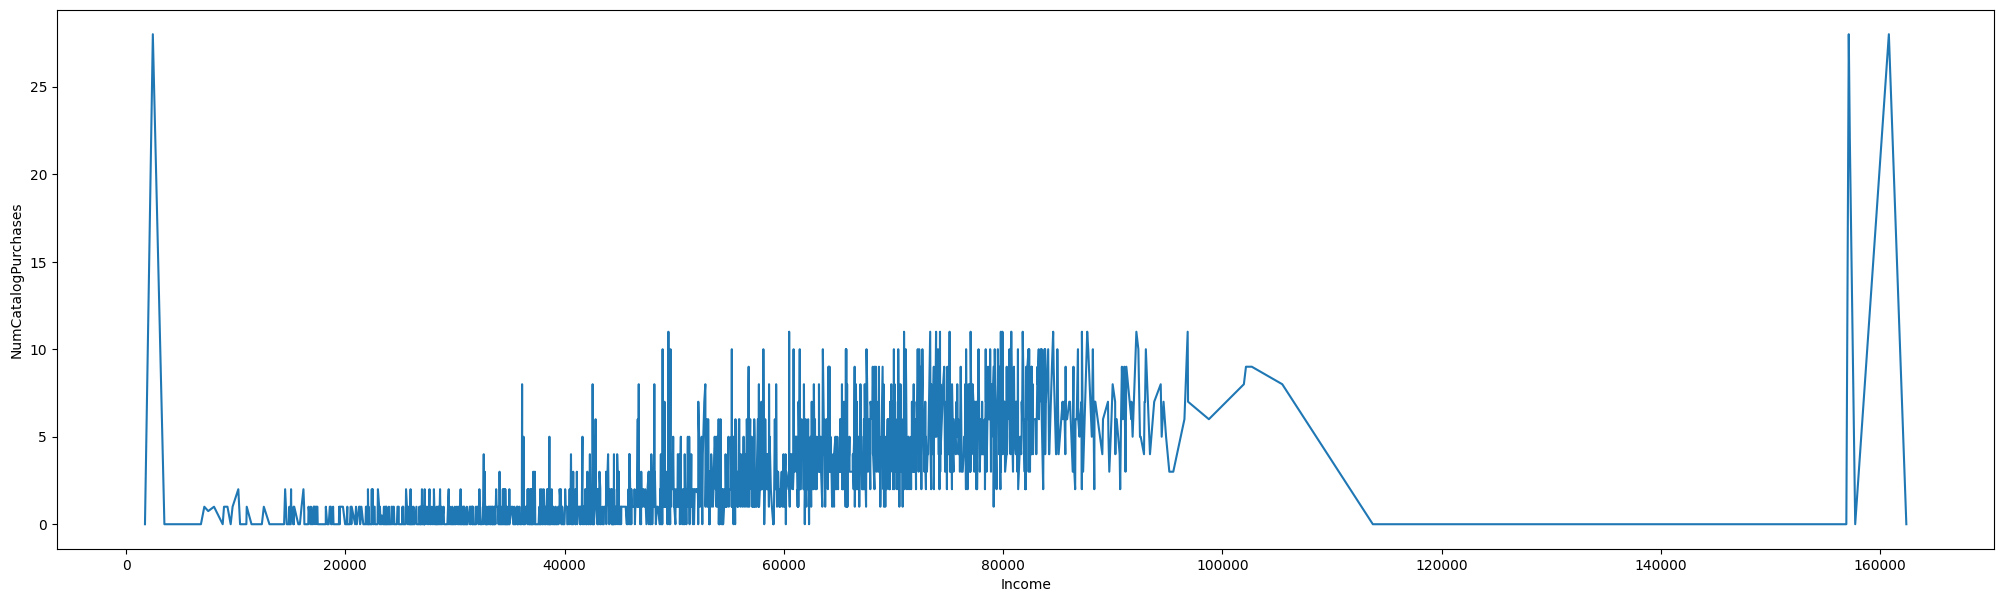

In [ ]:
#Correlation score between Income/NumCatalogPurchases = 0.69
plt.figure(figsize = (25, 7))
sns.lineplot(x = 'Income', y = 'NumCatalogPurchases', ci = 0, data = data, estimator='mean')
plt.show()

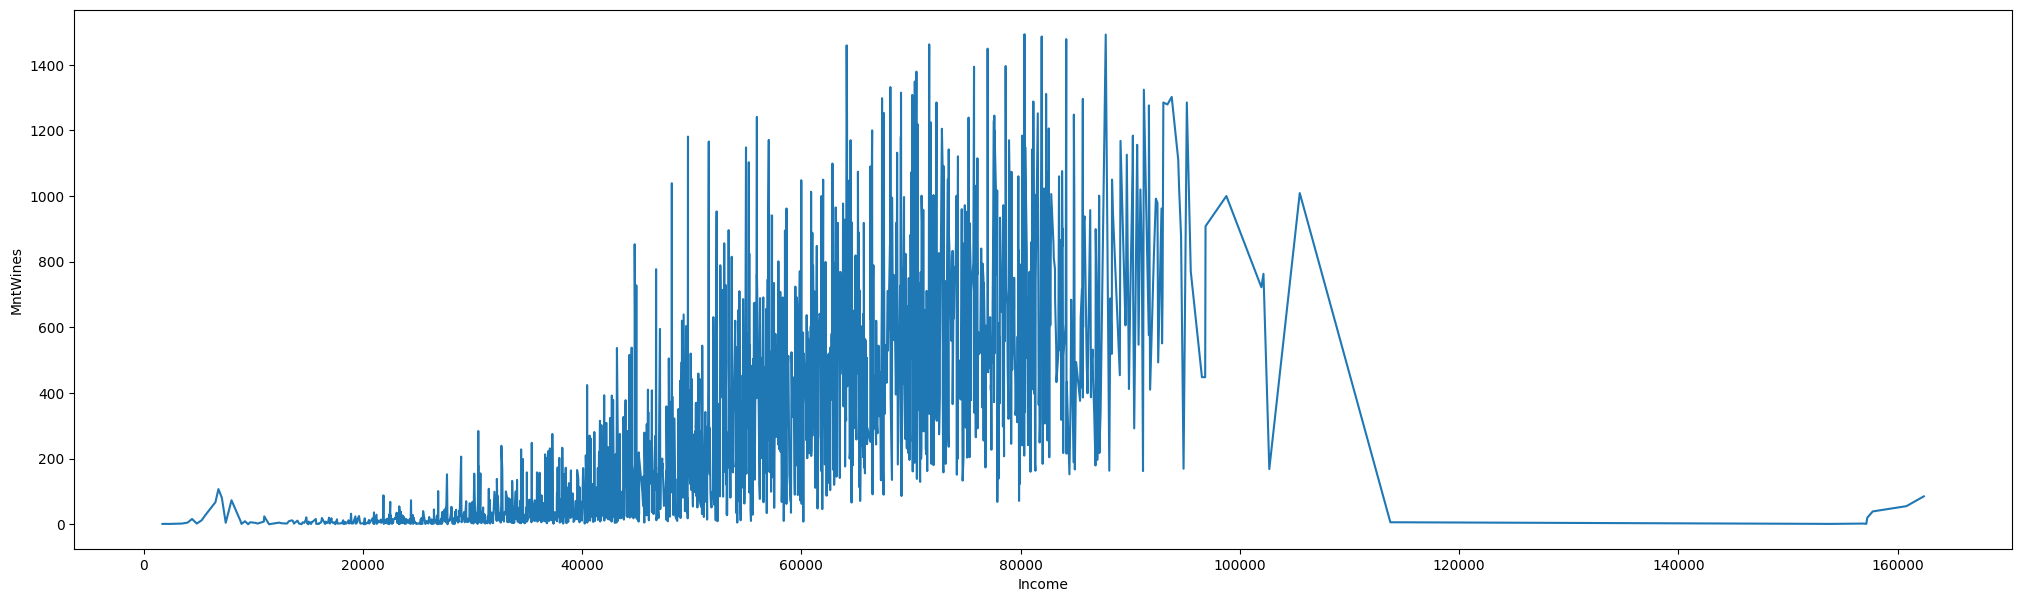

In [ ]:
#Correlation score between Income/MntWines = 0.68
plt.figure(figsize = (25, 7))
sns.lineplot(x = 'Income', y = 'MntWines', ci = 0, data = data, estimator='mean')
plt.show()

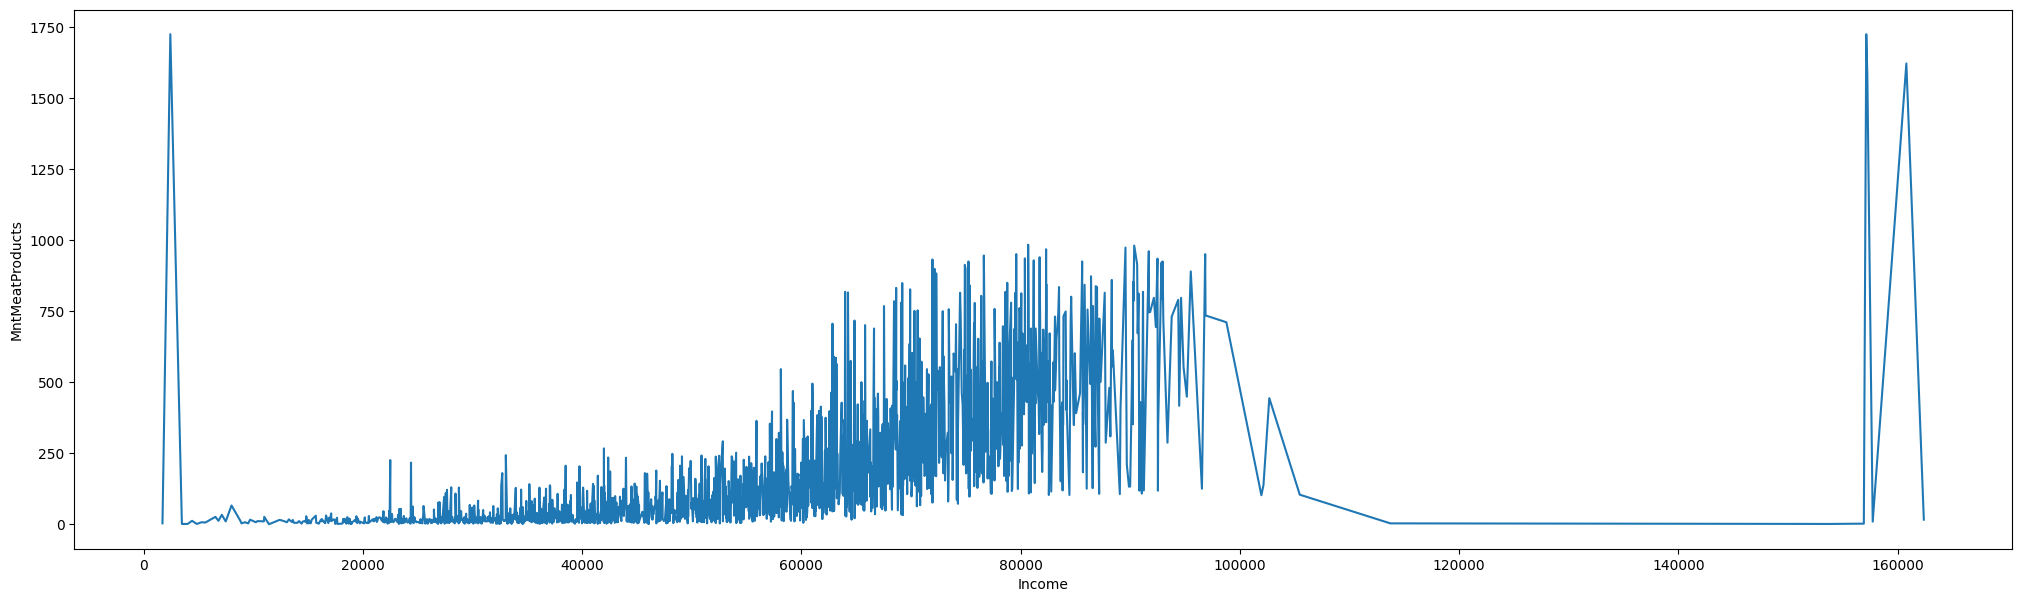

In [ ]:
#Correlation score between Income/MntMeatProducts = 0.68
plt.figure(figsize = (25, 7))
sns.lineplot(x = 'Income', y = 'MntMeatProducts', ci = 0, data = data, estimator='mean')
plt.show()

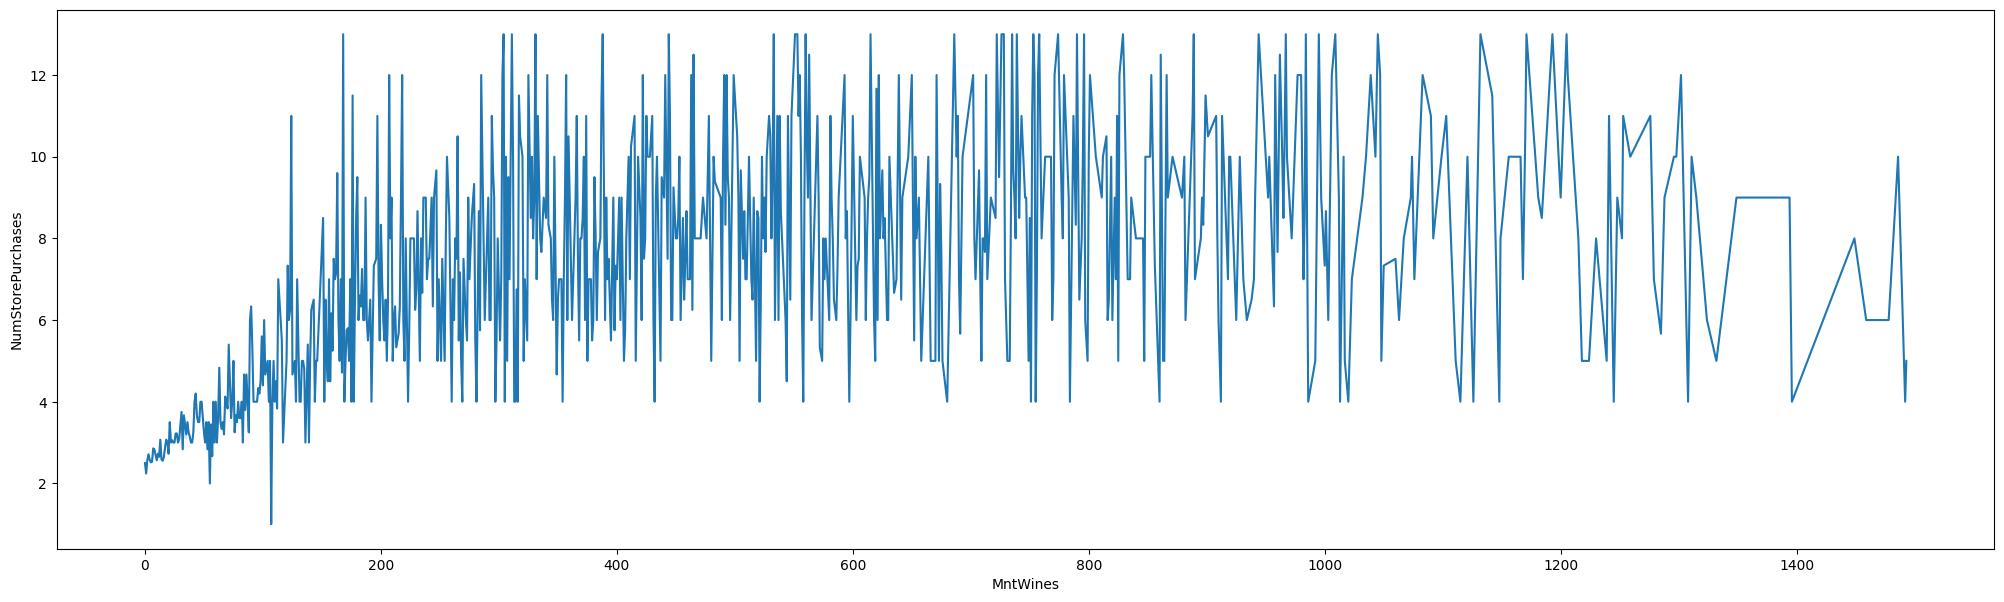

In [ ]:
#Correlation score between MntWines/NumStorePurchases = 0.64
plt.figure(figsize = (25, 7))
sns.lineplot(x = 'MntWines', y = 'NumStorePurchases', ci = 0, data = data, estimator='mean')
plt.show()

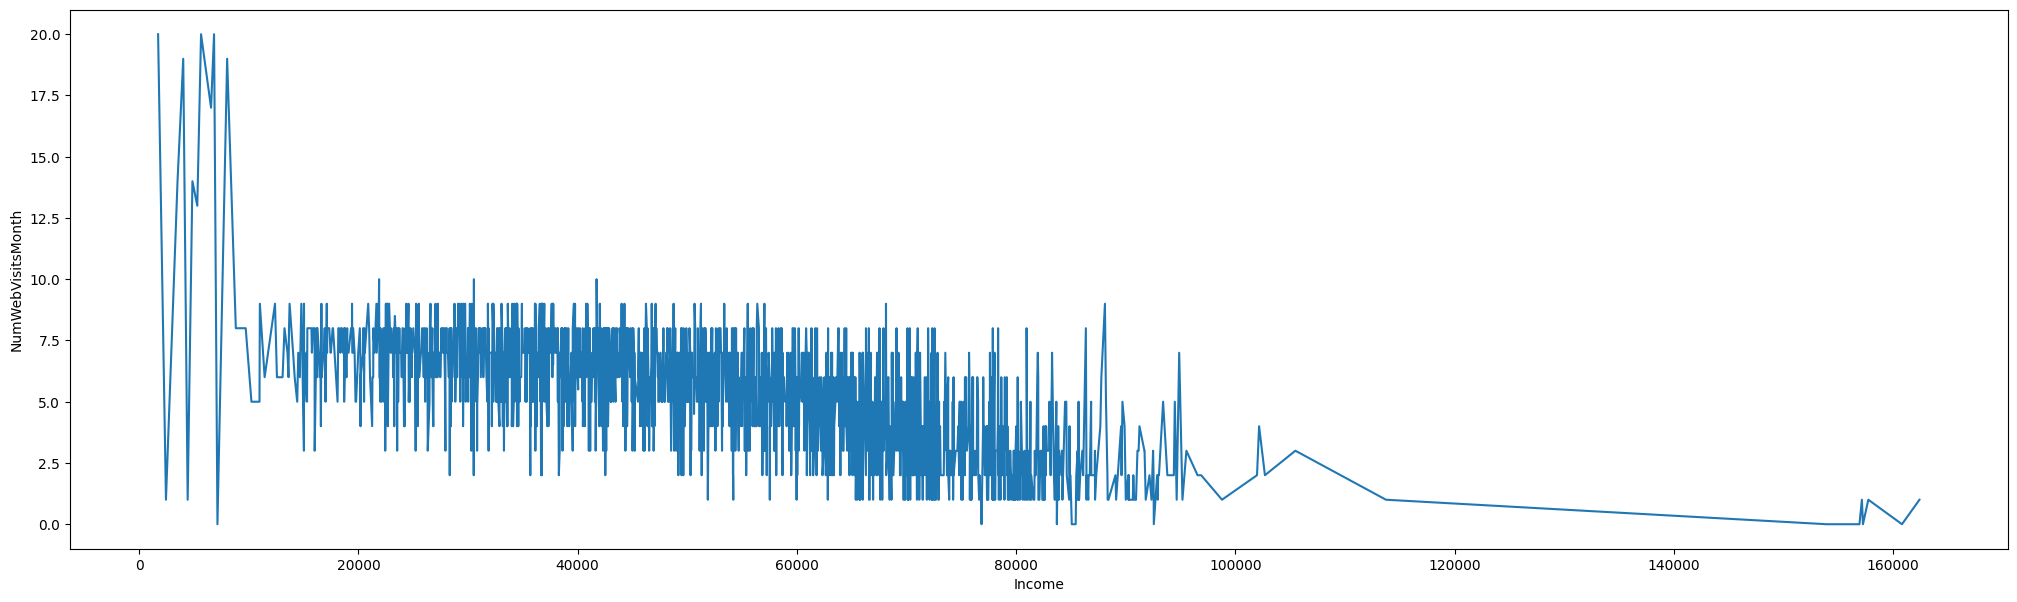

In [ ]:
#Correlation score between Income/NumWebVisitsMonth = -0.64
plt.figure(figsize = (25, 7))
sns.lineplot(x = 'Income', y = 'NumWebVisitsMonth', ci = 0, data = data, estimator='mean')
plt.show()

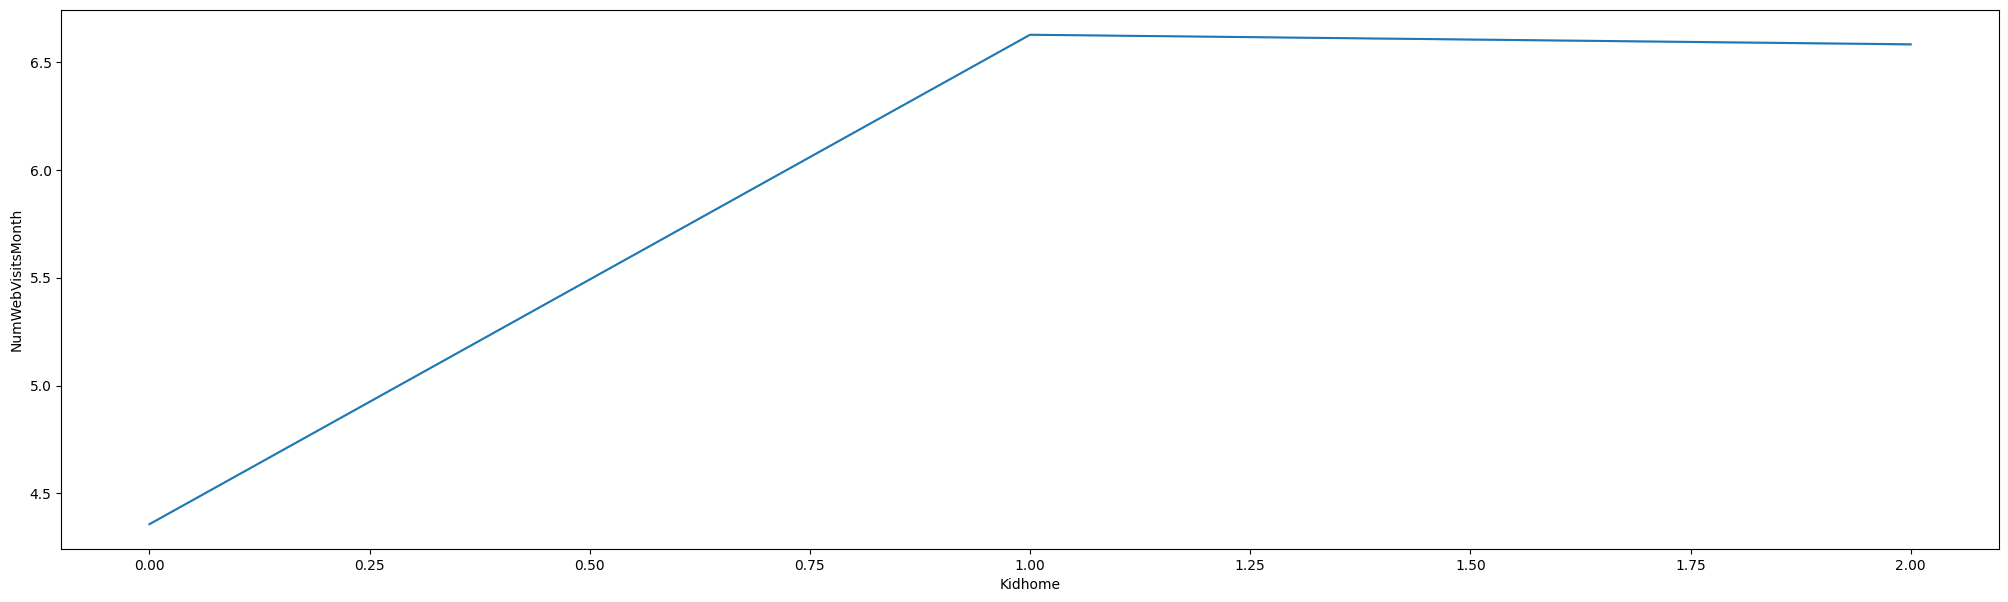

In [ ]:
#Correlation score between Kidhome/NumWebVisitsMonth = 0.44
plt.figure(figsize = (25, 7))
sns.lineplot(x = 'Kidhome', y = 'NumWebVisitsMonth', ci = 0, data = data, estimator='mean')
plt.show()

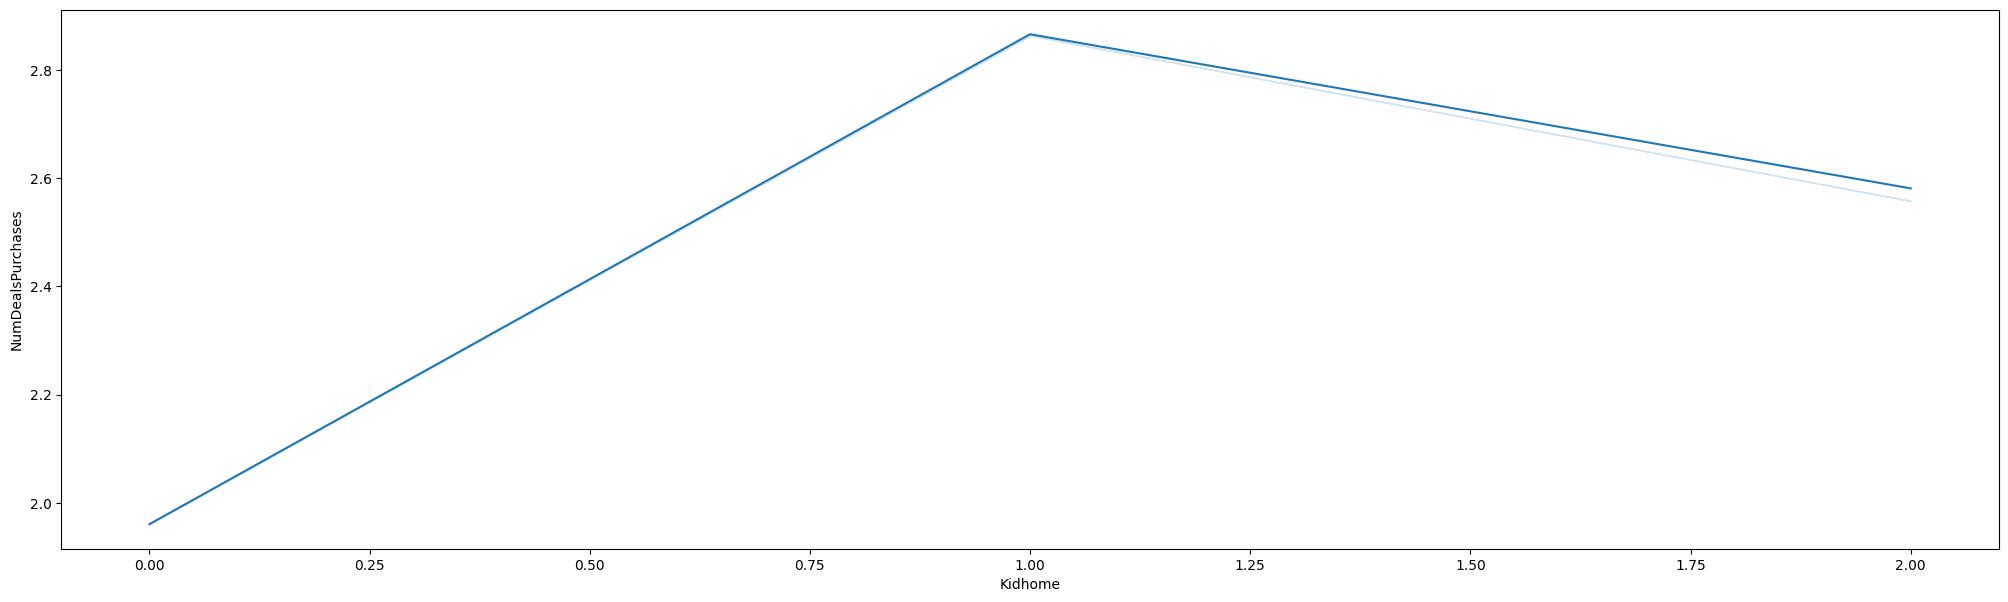

In [ ]:
#Correlation score between Teenhome/NumDealsPurchases = 0.38
plt.figure(figsize = (25, 7))
sns.lineplot(x = 'Kidhome', y = 'NumDealsPurchases', ci = 0, data = data, estimator='mean')
plt.show()

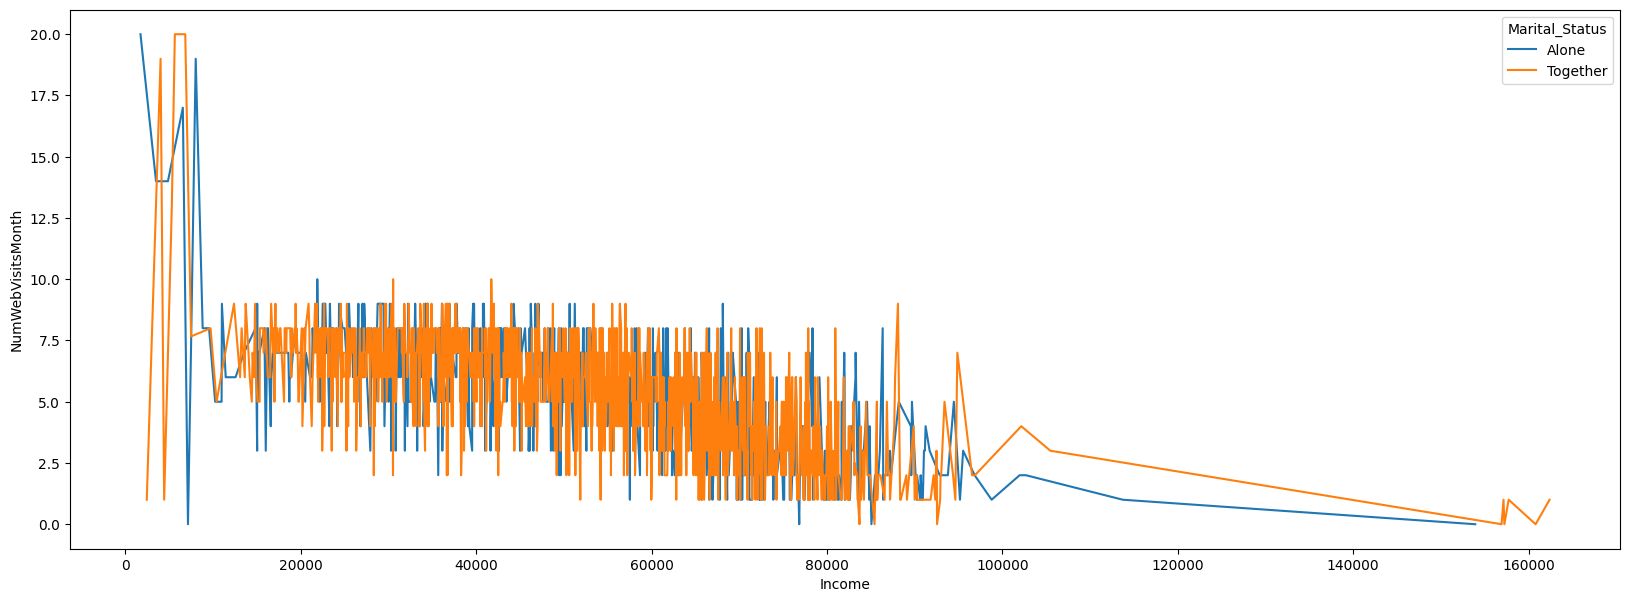

In [ ]:
plt.figure(figsize = (20, 7))
sns.lineplot(x = 'Income', y = 'NumWebVisitsMonth', ci = 0, data = data, hue = 'Marital_Status')
plt.show()

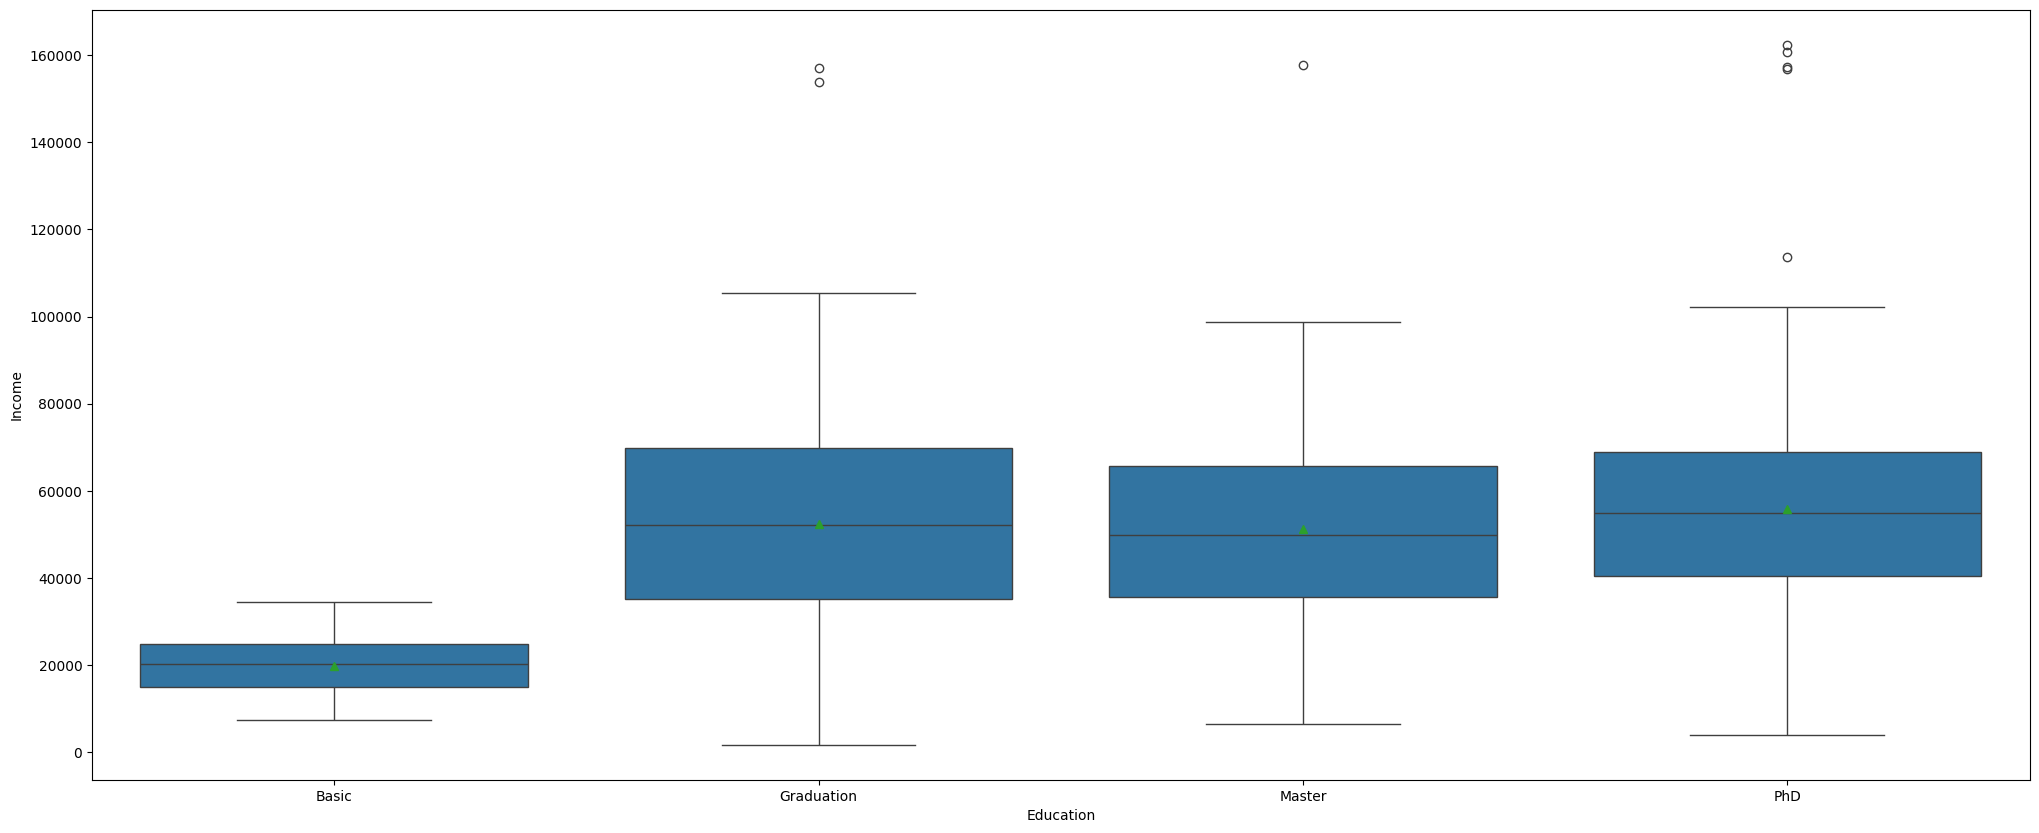

In [ ]:
plt.figure(figsize=(25,10))
sns.boxplot(x='Education', y='Income', data=data, showmeans=True)
plt.show()

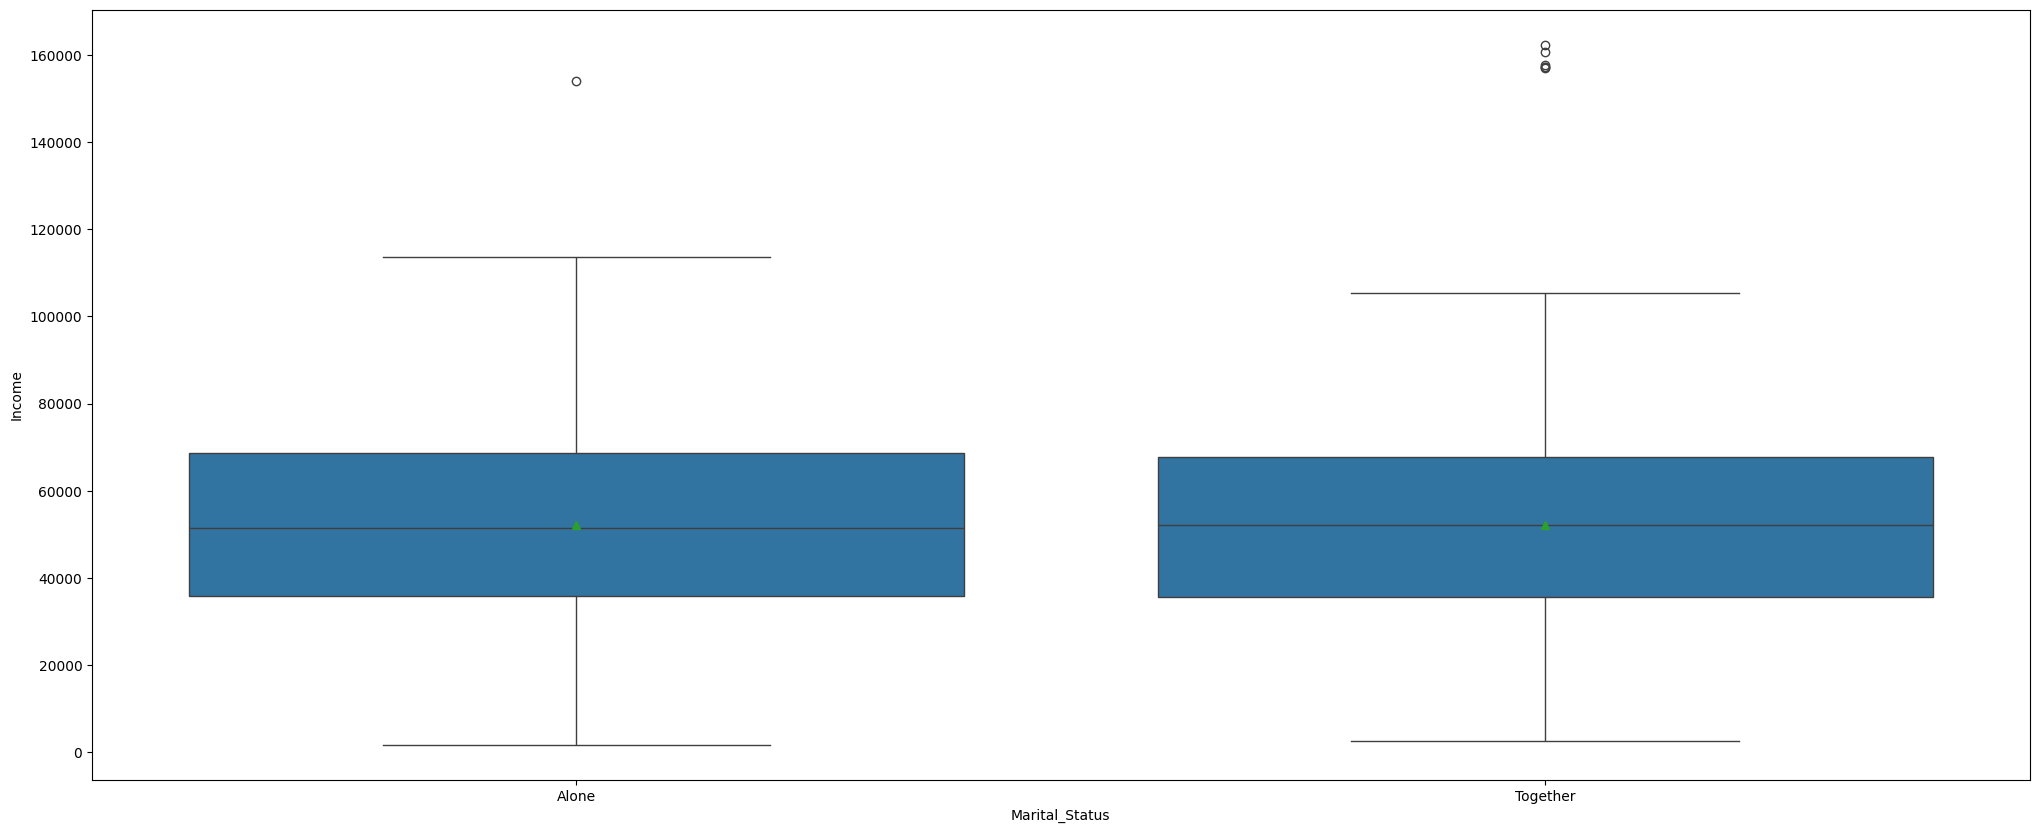

In [ ]:
plt.figure(figsize=(25,10))
sns.boxplot(x='Marital_Status', y='Income', data=data, showmeans=True)
plt.show()

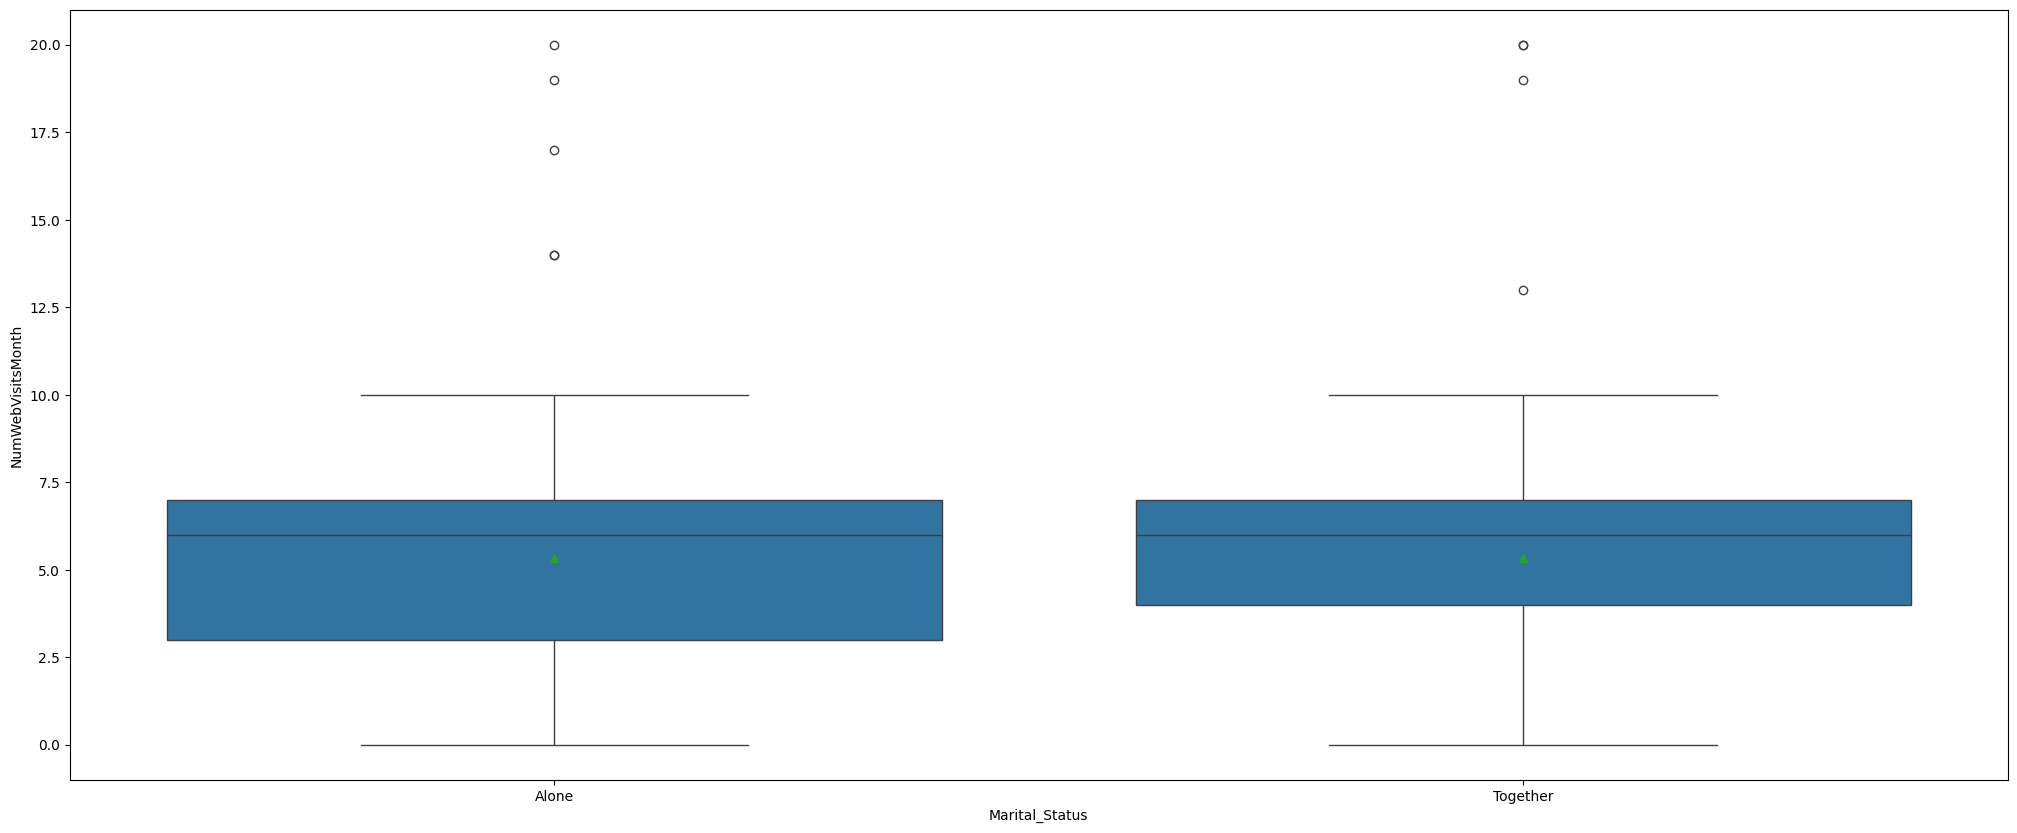

In [ ]:
plt.figure(figsize=(25,10))
sns.boxplot(x='Marital_Status', y='NumWebVisitsMonth', data=data, showmeans=True)
plt.show()

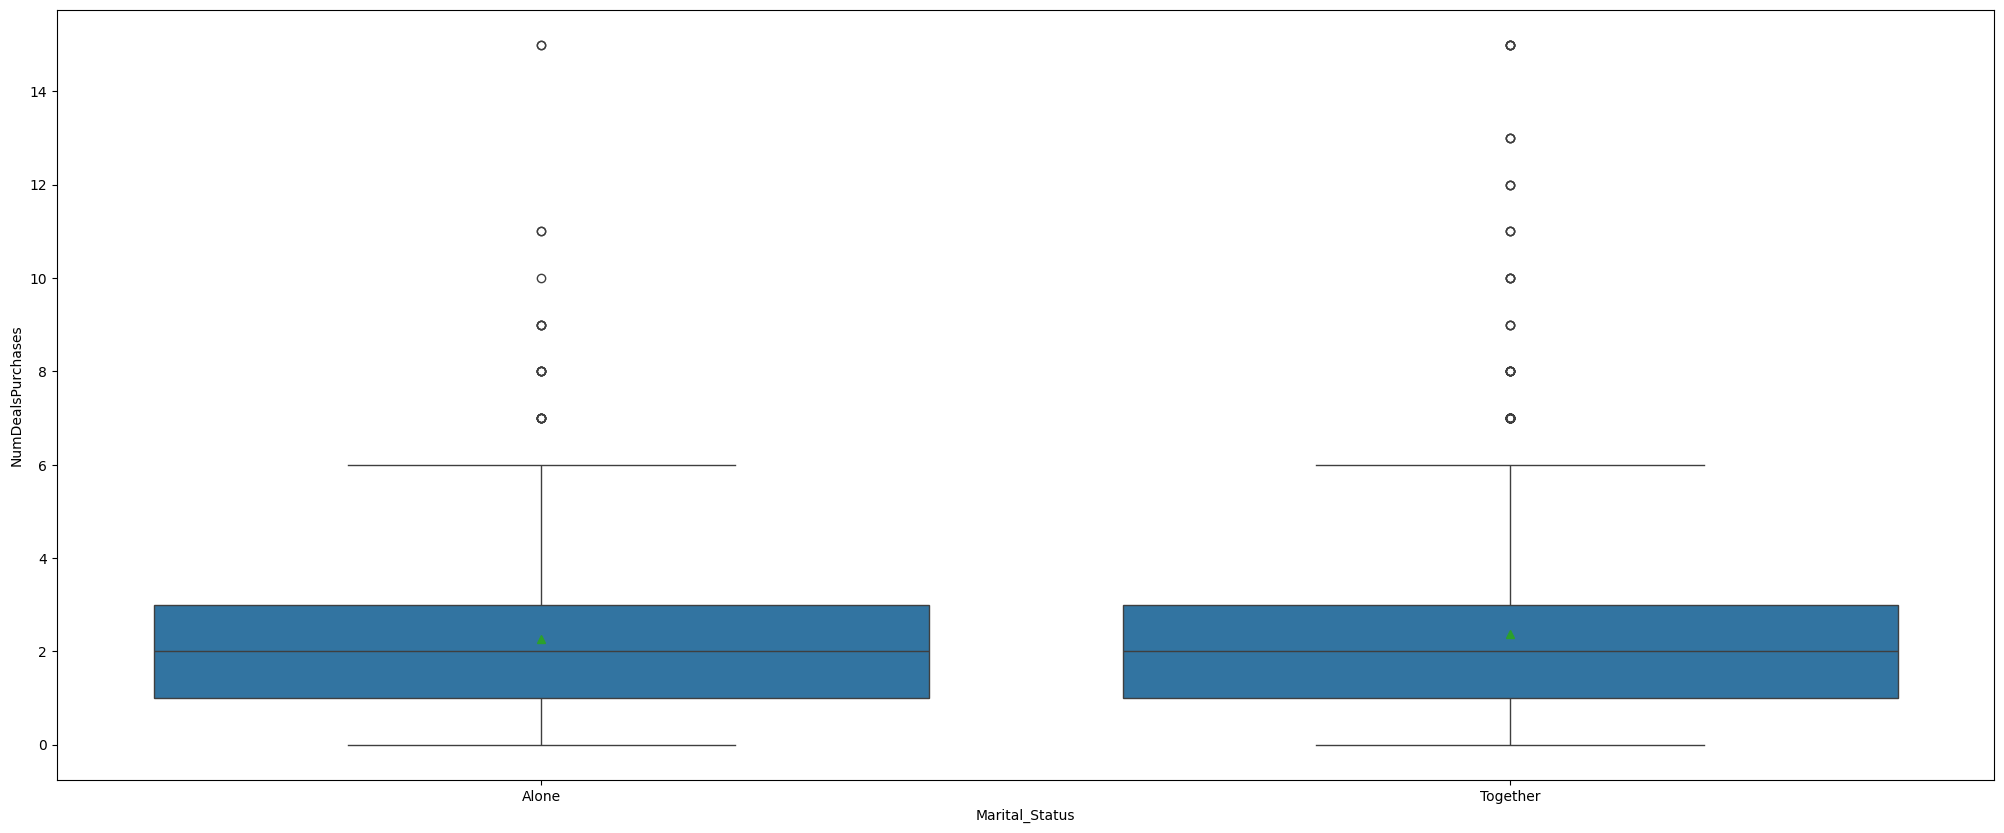

In [ ]:
plt.figure(figsize=(25,10))
sns.boxplot(x='Marital_Status', y='NumDealsPurchases', data=data, showmeans=True)
plt.show()

### **Feature Engineering and Data Processing**

In this section, we will first prepare our dataset for analysis.

*   Imputing missing values

In [ ]:
#See above - I already imputed missing Income values with the mean

**Think About It:**

- Can we extract the age of each customer and create a new feature?
- Can we find the total kids and teens in the home?
- Can we find out how many members each family has?
- Can we find the total amount spent by the customers on various products?
- Can we find out how long the customer has been with the company?
- Can we find out how many offers the customers have accepted?
- Can we find out amount spent per purchase?

#### **My Calculations:**

There are several new columns I can create using existing columns.  Namely the following:

*   Age = 2016 - Year of birth
*   Household size = Martial status (0 or 1) + Kidhome + Teenhome
*   Customer Lifetime = 2016 - Customer Date
*   Total Purchases = Number of Store Purchases + Number of Web Purchases
*   % Web Purchases = Number of Web Purchases / Total Purchases
*   % Store Purchases = Number of Store Purchases / Total Purchases
*   % Deals = Number of Deals / Total Purchases
*   Total Campaigns = 5
*   Total Accepted Campaigns = AcceptedCmp1 + AcceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5
*   Percent Accepted Campaigns= Total Accepted Campaigns / Total Campaigns
*   Total Food

After doing so, I can drop the columns year of birth, customer date, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4 and AcceptedCmp5.

In [ ]:
#Age
age = []
for x in data['Year_Birth']:
  age.append(2016 - x)
data['Age'] = age

In [ ]:
#Total Kids/Teens
total_kids_teens = []
for x, y in zip(data['Kidhome'], data['Teenhome']):
  total_kids_teens.append(x + y)
data['total_kids_teens'] = total_kids_teens

#Household Size
household_size = []
for x, y in zip(data['Marital_Status'], data['total_kids_teens']):
  if x == 'Together':
    household_size.append(2 + y)
  else:
    household_size.append(1)
data['household_size'] = household_size

In [ ]:
#Customer Lifetime
data['year'] = data['Dt_Customer'].dt.year

customer_lifetime = []
for x in data['year']:
  customer_lifetime.append(2016 - x)
data['customer_lifetime'] = customer_lifetime

In [ ]:
#Total Purchases
total_purchases = []
for x, y in zip(data['NumStorePurchases'], data['NumWebPurchases']):
  total_purchases.append(x + y)
data['total_purchases'] = total_purchases

In [ ]:
#Percent Deals
data['percent_deals'] = data['NumDealsPurchases'] / data['total_purchases'] * 100
data['percent_deals'] = data['percent_deals'].fillna(0)
data['percent_deals'].replace([float('inf'), float('-inf')], 0, inplace=True)
print(data['percent_deals'])

0       25.000000
1       66.666667
2        5.555556
3       33.333333
4       45.454545
          ...    
2233    66.666667
2235    15.384615
2237     6.666667
2238    12.500000
2239    42.857143
Name: percent_deals, Length: 2058, dtype: float64


In [ ]:
#Total Accepted Campaigns
data['total_accepted_campaigns'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

In [ ]:
#Percent Accepted Campaigns
data['percent_accepted_campaigns'] = data['total_accepted_campaigns'] / 5 * 100
data['percent_accepted_campaigns'] = data['percent_accepted_campaigns'].fillna(0)

In [ ]:
print(data)

      Year_Birth   Education Marital_Status        Income  Kidhome  Teenhome  \
0           1957  Graduation          Alone  58138.000000        0         0   
1           1954  Graduation          Alone  46344.000000        1         1   
2           1965  Graduation       Together  71613.000000        0         0   
3           1984  Graduation       Together  26646.000000        1         0   
4           1981         PhD       Together  58293.000000        1         0   
...          ...         ...            ...           ...      ...       ...   
2233        1977  Graduation       Together  52357.791544        1         0   
2235        1967  Graduation       Together  61223.000000        0         1   
2237        1981  Graduation          Alone  56981.000000        0         0   
2238        1956      Master       Together  69245.000000        0         1   
2239        1954         PhD       Together  52869.000000        1         1   

     Dt_Customer  Recency  MntWines  Mn

In [ ]:
data_copy = data.copy(deep='True')

## **Important Insights from EDA and Data Preprocessing**

**Overall**
*   Income and having children are negatively correlated.  Those with higher incomes are less likely to have children at home.  This may be due to the fact most people make more money as they age, and children have grown and are not at home during these high income earning periods.
*   Customers with more income are more likely to make more purchases overall - especially meat and wine products.
*   Customers with children are more likely to use deals.
*   There is also a positive correlation betweeen having kids and visiting the website - possibly due to additional transportation challenges that arise from having children.
*   On the other hand, as income increases, there are less website visits overall.  There is a stronger correlation with in store purchases and moderate correlation with web purchases.

**Skewness**

*   There are several variables with a strong positive skew: Amount of Wine Products, Amount of Sweet Products, Amount of Gold Products, Number of Deals Purchased, Number of Web Purchases and Number of Catalog Purchases.  Other notable variables with strong positive skews include Number of Kids at Home and Number of Store Purchases.  This alone may suggest that most people spend less on those products or engage less in those behaviors than the average.  There is a presence of outliers, which may lend itself to segmentation.
*   On the other hand, Recency and Number of Web Visits per Month are for the. most part symmetric, suggesting that most people behave generally in a similar way.

**Correlations**
*   By using a Heat Map, I was able to compare different numerical variables and see if there are any correlations.  While there were not any strong correlations, I had a few moderate correlations that hinted at possible segmentations.  Many of these correlations made sense.
*   For example, there was a consistent correlation between income and amount spent.  The more income people had, the more likely they were to spend.
*   Another notable correlation that would assist with Marketing Campaign strategization is betwee Kids at Home and Number of Deals Used.  There was a positive correlation suggesting that customers with kids are more likely to use deals.

**Charts and Features**
*   Given that income and having kids were two main profiling characteristics that were revealed to have higher correlations with other behaviors on our heatmap, I created new variables (age, household size, customer lifetime, among others) to help break down these factors more.
*   Overall, the average customer demographics was revealed to be $52,055 47 years old, with a household size of 2, a customer lifetime of 3 years, total purchase of 10, and a 6% campaign success rate.  Our next steps will be to further segment this 'average' customer profile to find opportunities for future marketing campaigns.

## **Data Preparation for Segmentation**

In [ ]:
segmenting_data = data.copy(deep=True)

In [ ]:
#Convert floats to integers
segmenting_data[['Income', 'MntSweetProducts', 'percent_deals', 'percent_accepted_campaigns']] = segmenting_data[['Income', 'MntSweetProducts', 'percent_deals', 'percent_accepted_campaigns']].astype(int)

In [ ]:
segmenting_data.drop('Year_Birth', axis=1, inplace=True)
segmenting_data.drop('Kidhome', axis=1, inplace=True)
segmenting_data.drop('Teenhome', axis=1, inplace=True)
segmenting_data.drop('total_kids_teens', axis=1, inplace=True)
segmenting_data.drop('Dt_Customer', axis=1, inplace=True)
segmenting_data.drop('year', axis=1, inplace=True)
segmenting_data.drop('AcceptedCmp1', axis=1, inplace=True)
segmenting_data.drop('AcceptedCmp2', axis=1, inplace=True)
segmenting_data.drop('AcceptedCmp3', axis=1, inplace=True)
segmenting_data.drop('AcceptedCmp4', axis=1, inplace=True)
segmenting_data.drop('AcceptedCmp5', axis=1, inplace=True)
segmenting_data.drop('Education', axis=1, inplace=True)
segmenting_data.drop('Marital_Status', axis=1, inplace=True)
segmenting_data.drop('Response', axis=1, inplace=True)
segmenting_data.drop('Complain', axis=1, inplace=True)

In [ ]:
segmenting_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Income                      2058 non-null   int64
 1   Recency                     2058 non-null   int64
 2   MntWines                    2058 non-null   int64
 3   MntFruits                   2058 non-null   int64
 4   MntMeatProducts             2058 non-null   int64
 5   MntFishProducts             2058 non-null   int64
 6   MntSweetProducts            2058 non-null   int64
 7   MntGoldProds                2058 non-null   int64
 8   NumDealsPurchases           2058 non-null   int64
 9   NumWebPurchases             2058 non-null   int64
 10  NumCatalogPurchases         2058 non-null   int64
 11  NumStorePurchases           2058 non-null   int64
 12  NumWebVisitsMonth           2058 non-null   int64
 13  Age                         2058 non-null   int64
 14  household_siz

In [ ]:
segmenting_data.describe()

Income      Recency     MntWines    MntFruits  MntMeatProducts  \
count    2058.000000  2058.000000  2058.000000  2058.000000      2058.000000   
mean    52055.762391    48.951895   303.921769    26.234694       167.704568   
std     21458.653193    28.999189   336.528217    39.750728       228.303238   
min      1730.000000     0.000000     0.000000     0.000000         0.000000   
25%     35701.750000    24.000000    23.000000     1.000000        16.000000   
50%     52044.500000    49.000000   174.000000     8.000000        67.000000   
75%     68146.500000    74.000000   504.000000    33.000000       229.500000   
max    162397.000000    99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2058.000000       2058.000000   2058.000000        2058.000000   
mean         37.329446         27.176871     43.873178           2.339164   
std          54.657215         41.714004     52.126598           1.942947   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.750000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2058.000000          2058.000000        2058.000000   
mean          4.098639             2.660836           5.770651   
std           2.797577             2.933824           3.239113   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth          Age  household_size  customer_lifetime  \
count        2058.000000  2058.000000     2058.000000        2058.000000   
mean            5.319728    47.212828        2.265306           2.968416   
std             2.439907    11.973898        1.117576           0.685621   
min             0.000000    20.000000        1.000000           2.000000   
25%             3.000000    39.000000        1.000000           2.000000   
50%             6.000000    46.000000        2.000000           3.000000   
75%             7.000000    57.000000        3.000000           3.000000   
max            20.000000   123.000000        5.000000           4.000000   

       total_purchases  percent_deals  total_accepted_campaigns  \
count      2058.000000    2058.000000               2058.000000   
mean          9.869291      28.321186                  0.299806   
std           5.216827      37.883201                  0.676007   
min           0.000000       0.000000                  0.000000   
25%           5.000000      11.000000                  0.000000   
50%          10.000000      25.000000                  0.000000   
75%          14.000000      40.000000                  0.000000   
max          27.000000    1500.000000                  4.000000   

       percent_accepted_campaigns  
count                 2058.000000  
mean                     5.996113  
std                     13.520146  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                      0.000000  
max                     80.000000

In [ ]:
segmenting_data.head()

Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0   58138       58       635         88              546              172   
1   46344       38        11          1                6                2   
2   71613       26       426         49              127              111   
3   26646       26        11          4               20               10   
4   58293       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Age  \
0                   10                  4                  7   59   
1                    1                  2                  5   62   
2                    2                 10                  4   51   
3                    0                  4                  6   32   
4                    3                  6                  5   35   

   household_size  customer_lifetime  total_purchases  percent_deals  \
0               1                  4               12             25   
1               1                  2                3             66   
2               2                  3               18              5   
3               3                  2                6             33   
4               3                  2               11             45   

   total_accepted_campaigns  percent_accepted_campaigns  
0                         0                           0  
1                         0                           0  
2                         0                           0  
3                         0                           0  
4                         0                           0

In [ ]:
#Plotting correlation
correlation_plot = segmenting_data.corr()
print(correlation_plot)

                              Income   Recency  MntWines  MntFruits  \
Income                      1.000000  0.002315  0.676759   0.500872   
Recency                     0.002315  1.000000  0.011581  -0.010708   
MntWines                    0.676759  0.011581  1.000000   0.388175   
MntFruits                   0.500872 -0.010708  0.388175   1.000000   
MntMeatProducts             0.678429  0.014214  0.554880   0.541054   
MntFishProducts             0.514140 -0.000718  0.395760   0.593156   
MntSweetProducts            0.512694  0.020620  0.380011   0.555291   
MntGoldProds                0.372129  0.010132  0.385986   0.397990   
NumDealsPurchases          -0.108889  0.005605  0.014963  -0.134720   
NumWebPurchases             0.438202 -0.011758  0.537243   0.290716   
NumCatalogPurchases         0.688226  0.015053  0.626678   0.486112   
NumStorePurchases           0.619111 -0.000200  0.638452   0.456825   
NumWebVisitsMonth          -0.642354 -0.016980 -0.310833  -0.410645   
Age   

In [ ]:
print(segmenting_data.columns)

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'household_size',
       'customer_lifetime', 'total_purchases', 'percent_deals',
       'total_accepted_campaigns', 'percent_accepted_campaigns'],
      dtype='object')


In [ ]:
scaler = StandardScaler()
scaled_segmenting_data = pd.DataFrame(scaler.fit_transform(segmenting_data), columns=segmenting_data.columns)
scaled_segmenting_data.head()

Income   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  0.283509  0.312088  0.984044   1.554193         1.657389         2.464511   
1 -0.266240 -0.377754 -0.870634  -0.634978        -0.708461        -0.646539   
2  0.911613 -0.791659  0.362846   0.572841        -0.178335         1.348193   
3 -1.184414 -0.791659 -0.870634  -0.559489        -0.647124        -0.500137   
4  0.290734  1.553804 -0.389131   0.421863        -0.217766         0.158674   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0          1.458453      0.846738           0.340203         1.394889   
1         -0.627684     -0.726738          -0.174604        -1.107885   
2         -0.148113     -0.035944          -0.689411         1.394889   
3         -0.579727     -0.745927          -0.174604        -0.750346   
4         -0.004241     -0.554040           1.369817         0.322272   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth       Age  \
0             2.502177          -0.546780           0.688830  0.984645   
1            -0.566237          -1.164383          -0.131073  1.235251   
2            -0.225302           1.306029          -0.541024  0.316363   
3            -0.907172          -0.546780           0.278878 -1.270808   
4             0.115633           0.070823          -0.131073 -1.020202   

   household_size  customer_lifetime  total_purchases  percent_deals  \
0       -1.132463           1.504963         0.408529      -0.087690   
1       -1.132463          -1.412808        -1.317076       0.994847   
2       -0.237452           0.046078         1.558933      -0.615757   
3        0.657559          -1.412808        -0.741875       0.123536   
4        0.657559          -1.412808         0.216795       0.440376   

   total_accepted_campaigns  percent_accepted_campaigns  
0                 -0.443602                   -0.443602  
1                 -0.443602                   -0.443602  
2                 -0.443602                   -0.443602  
3                 -0.443602                   -0.443602  
4                 -0.443602                   -0.443602

In [ ]:
segmented_data_cols = ['Income', 'Recency', 'Age', 'household_size', 'customer_lifetime', 'total_purchases', 'percent_deals', 'total_accepted_campaigns', 'percent_accepted_campaigns', 'MntGoldProds', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines']

In [ ]:
scaled_segmenting_data_copy = scaled_segmenting_data.copy(deep=True)

## **Applying T-SNE and PCA to the data to visualize the data distributed in 2 dimensions**

### **Applying T-SNE**

In [ ]:
scaled_segmenting_data_copy_tsne = scaled_segmenting_data_copy.copy(deep=True)

<Axes: xlabel='0', ylabel='1'>

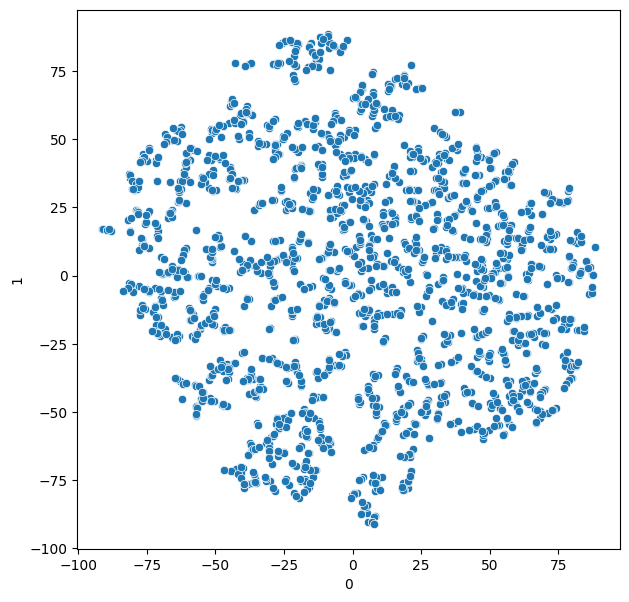

In [ ]:
tsne = TSNE(n_components = 2, random_state = 1, perplexity = 5)

tsne_data_notdf = tsne.fit_transform(scaled_segmenting_data_copy_tsne)

tsne_data = pd.DataFrame(tsne_data_notdf, columns=[0, 1])

plt.figure(figsize = (7,7))
sns.scatterplot(x = 0, y = 1, data=tsne_data)

<Axes: xlabel='0', ylabel='1'>

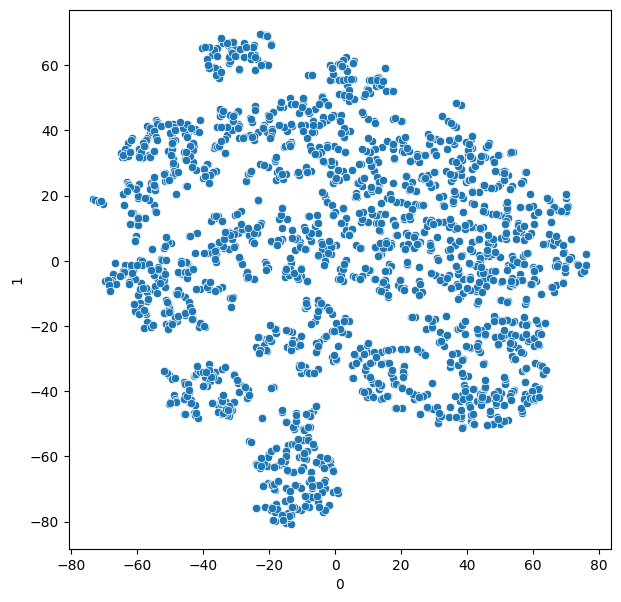

In [ ]:
tsne = TSNE(n_components = 2, random_state = 1, perplexity = 10)

tsne_data_notdf = tsne.fit_transform(scaled_segmenting_data_copy_tsne)

tsne_data = pd.DataFrame(tsne_data_notdf, columns=[0, 1])

plt.figure(figsize = (7,7))
sns.scatterplot(x = 0, y = 1, data=tsne_data)

<Axes: xlabel='0', ylabel='1'>

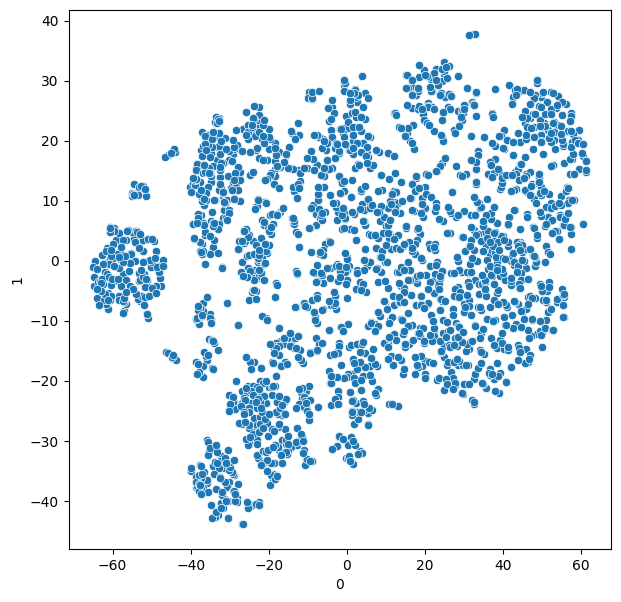

In [ ]:
tsne = TSNE(n_components = 2, random_state = 1, perplexity = 30)

tsne_data_notdf = tsne.fit_transform(scaled_segmenting_data_copy_tsne)

tsne_data = pd.DataFrame(tsne_data_notdf, columns=[0, 1])

plt.figure(figsize = (7,7))
sns.scatterplot(x = 0, y = 1, data=tsne_data)

<Axes: xlabel='X1', ylabel='X2'>

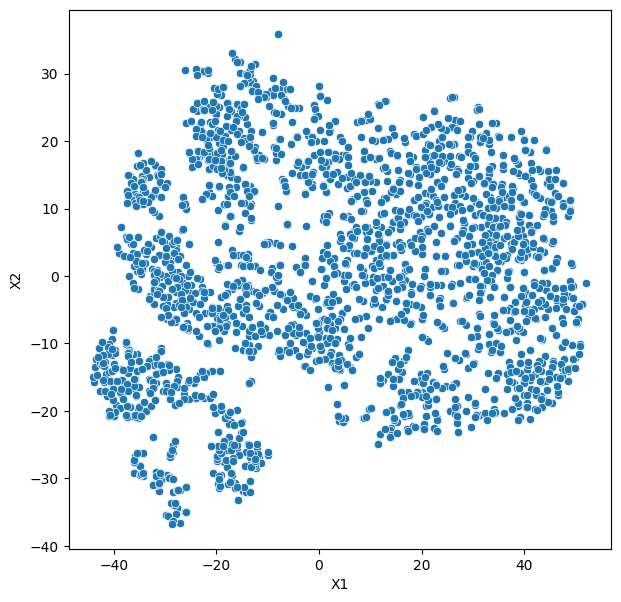

In [ ]:
#Increasing perplexity to 40
tsne = TSNE(n_components = 2, random_state = 1, perplexity = 40)

tsne_data_notdf = tsne.fit_transform(scaled_segmenting_data_copy_tsne)

tsne_data = pd.DataFrame(tsne_data_notdf, columns=['X1', 'X2'])

plt.figure(figsize = (7,7))
sns.scatterplot(x = 'X1', y = 'X2', data=tsne_data)

In [ ]:
tsne_data.head()

X1         X2
0  41.868908  20.096100
1 -17.560478 -23.932949
2  19.751606   8.855103
3 -39.793934 -10.938969
4 -19.410427 -14.082338

In [ ]:
#Coloring groups
def tsne_group(x):
  first = x['X1']
  second = x['X2']

  if first < 0 and second < -10:
    return 'group 1'
  elif first > 0 and second > -10:
    return 'group 2'
  elif first > 0 and second < 0:
    return 'group 3'
  else:
    return 'group 4'

groups = tsne_data.apply(tsne_group, axis=1)

In [ ]:
tsne_data['groups'] = tsne_data.apply(tsne_group, axis=1)

<Axes: xlabel='X1', ylabel='X2'>

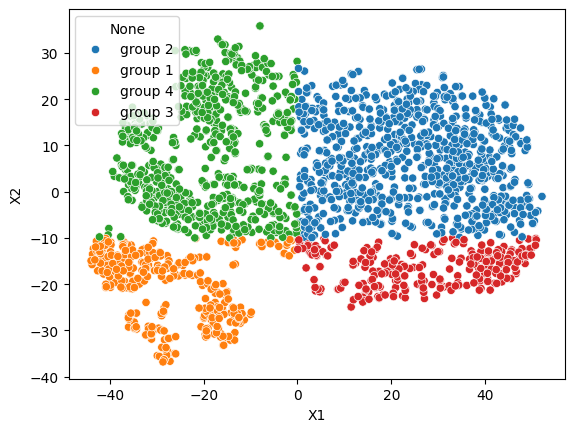

In [ ]:
sns.scatterplot(x='X1', y='X2', data=tsne_data, hue=groups)

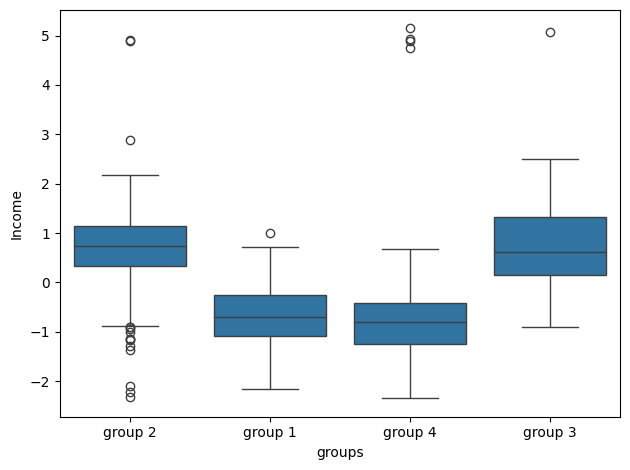

In [ ]:
sns.boxplot(y=scaled_segmenting_data_copy_tsne['Income'], x=tsne_data['groups'])
plt.tight_layout()
plt.show()

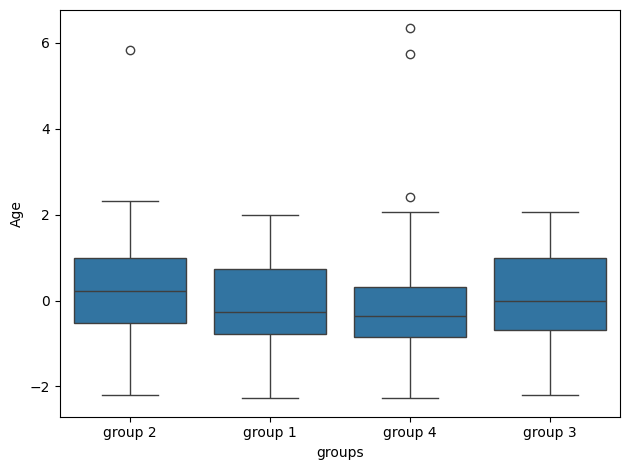

In [ ]:
sns.boxplot(y=scaled_segmenting_data_copy_tsne['Age'], x=tsne_data['groups'])
plt.tight_layout()
plt.show()

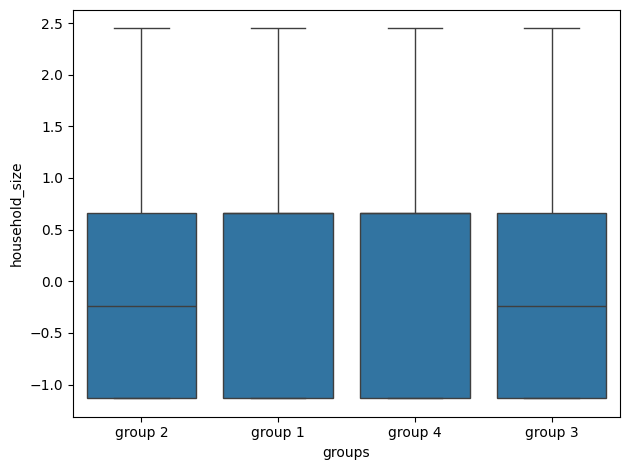

In [ ]:
sns.boxplot(y=scaled_segmenting_data_copy_tsne['household_size'], x=tsne_data['groups'])
plt.tight_layout()
plt.show()

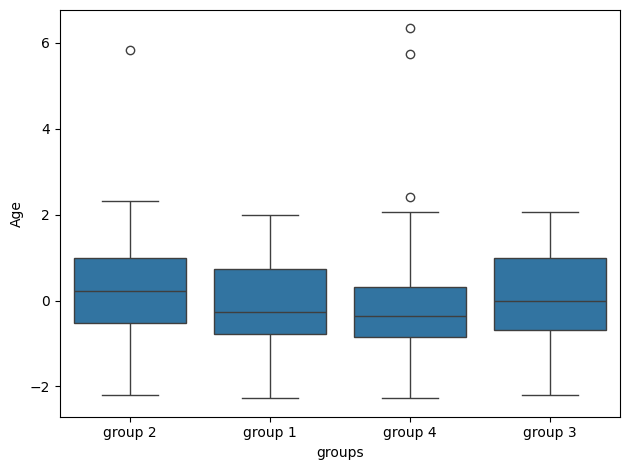

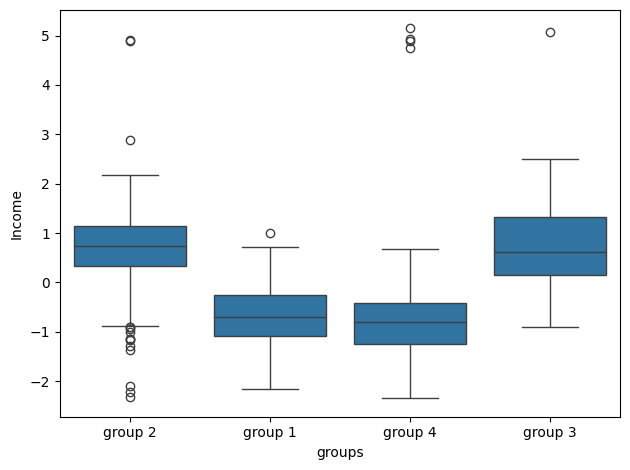

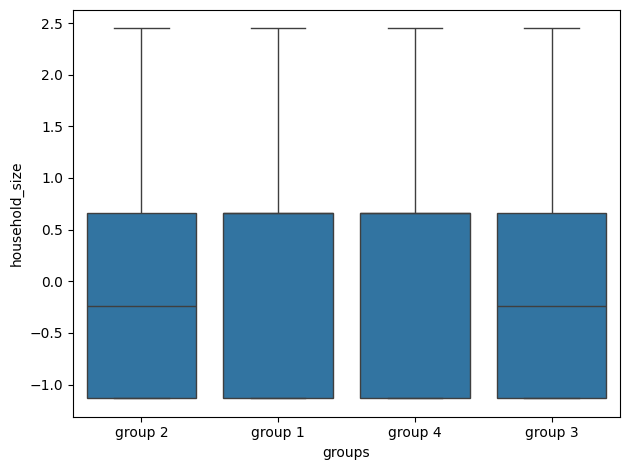

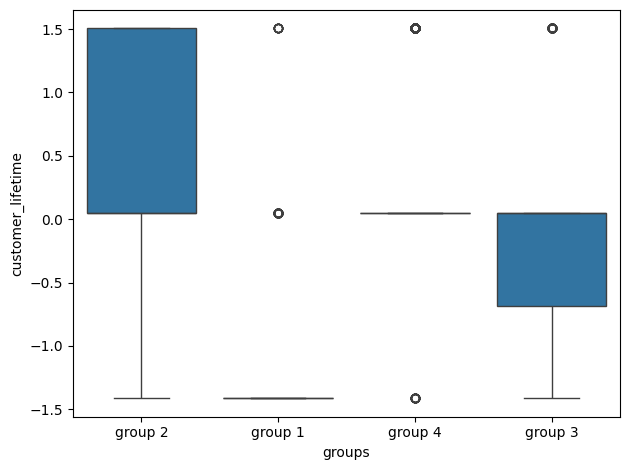

In [ ]:
demographic_variables = ['Age', 'Income', 'household_size', 'customer_lifetime']
for x in demographic_variables:
  sns.boxplot(y=scaled_segmenting_data_copy_tsne[x], x=tsne_data['groups'])
  plt.tight_layout()
  plt.show()

In [ ]:
tsne_data

X1         X2   groups
0     41.868908  20.096100  group 2
1    -17.560478 -23.932949  group 1
2     19.751606   8.855103  group 2
3    -39.793934 -10.938969  group 1
4    -19.410427 -14.082338  group 1
...         ...        ...      ...
2053  -8.096314  -4.247149  group 4
2054  21.729898  -1.217656  group 2
2055  29.705761  -9.115111  group 2
2056  19.980528   5.455206  group 2
2057 -13.424870   1.456923  group 4

[2058 rows x 3 columns]

In [ ]:
#Combining TSNE and group data with Original Data to later compare with Categorical Variables
tsne_data_df = pd.DataFrame(tsne_data, columns = ['X1', 'X2', 'groups'])
print(tsne_data_df)

combined_tsne_df_cat = pd.concat([tsne_data_df, data], axis =1)
print(combined_tsne_df_cat)

             X1         X2   groups
0     41.868908  20.096100  group 2
1    -17.560478 -23.932949  group 1
2     19.751606   8.855103  group 2
3    -39.793934 -10.938969  group 1
4    -19.410427 -14.082338  group 1
...         ...        ...      ...
2053  -8.096314  -4.247149  group 4
2054  21.729898  -1.217656  group 2
2055  29.705761  -9.115111  group 2
2056  19.980528   5.455206  group 2
2057 -13.424870   1.456923  group 4

[2058 rows x 3 columns]
             X1         X2   groups  Year_Birth   Education Marital_Status  \
0     41.868908  20.096100  group 2      1957.0  Graduation          Alone   
1    -17.560478 -23.932949  group 1      1954.0  Graduation          Alone   
2     19.751606   8.855103  group 2      1965.0  Graduation       Together   
3    -39.793934 -10.938969  group 1      1984.0  Graduation       Together   
4    -19.410427 -14.082338  group 1      1981.0         PhD       Together   
...         ...        ...      ...         ...         ...            ... 

In [ ]:
#Making filters
group_1 = combined_tsne_df_cat[combined_tsne_df_cat['groups'] == 'group 1']
group_1_df = pd.DataFrame(group_1)

group_2 = combined_tsne_df_cat[combined_tsne_df_cat['groups'] == 'group 2']
group_2_df = pd.DataFrame(group_2)

group_3 = combined_tsne_df_cat[combined_tsne_df_cat['groups'] == 'group 3']
group_3_df = pd.DataFrame(group_3)

group_4 = combined_tsne_df_cat[combined_tsne_df_cat['groups'] == 'group 4']
group_4_df = pd.DataFrame(group_4)

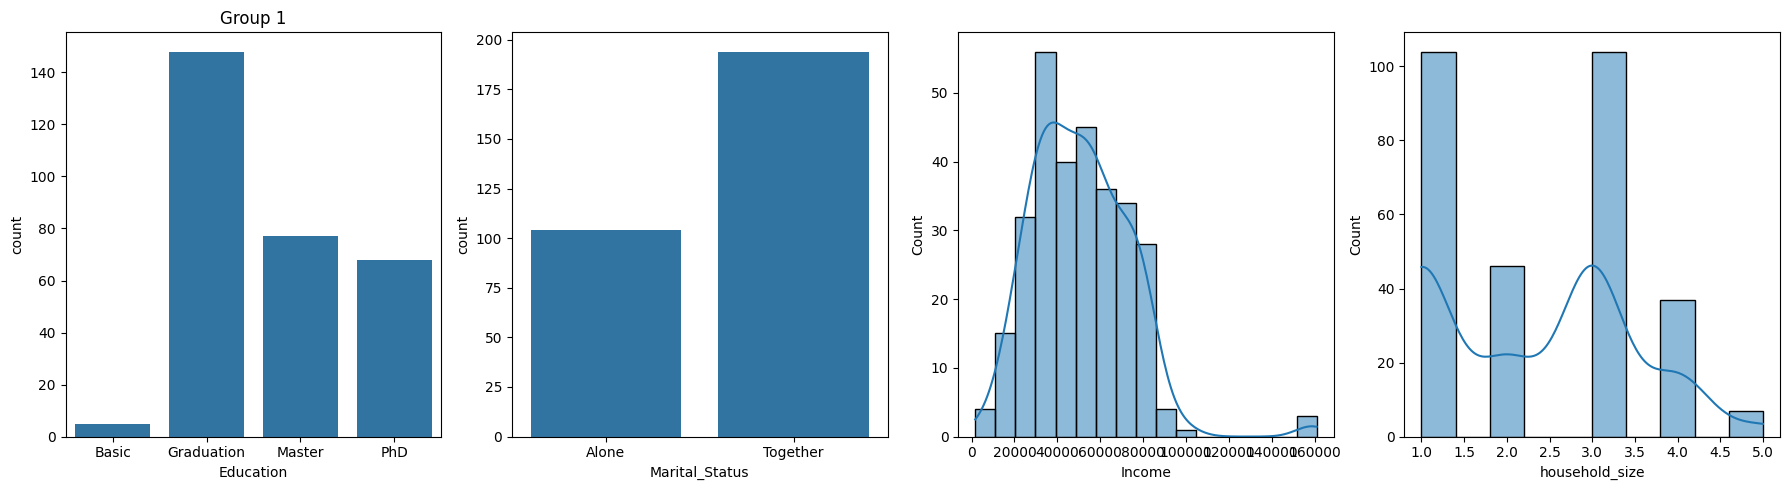

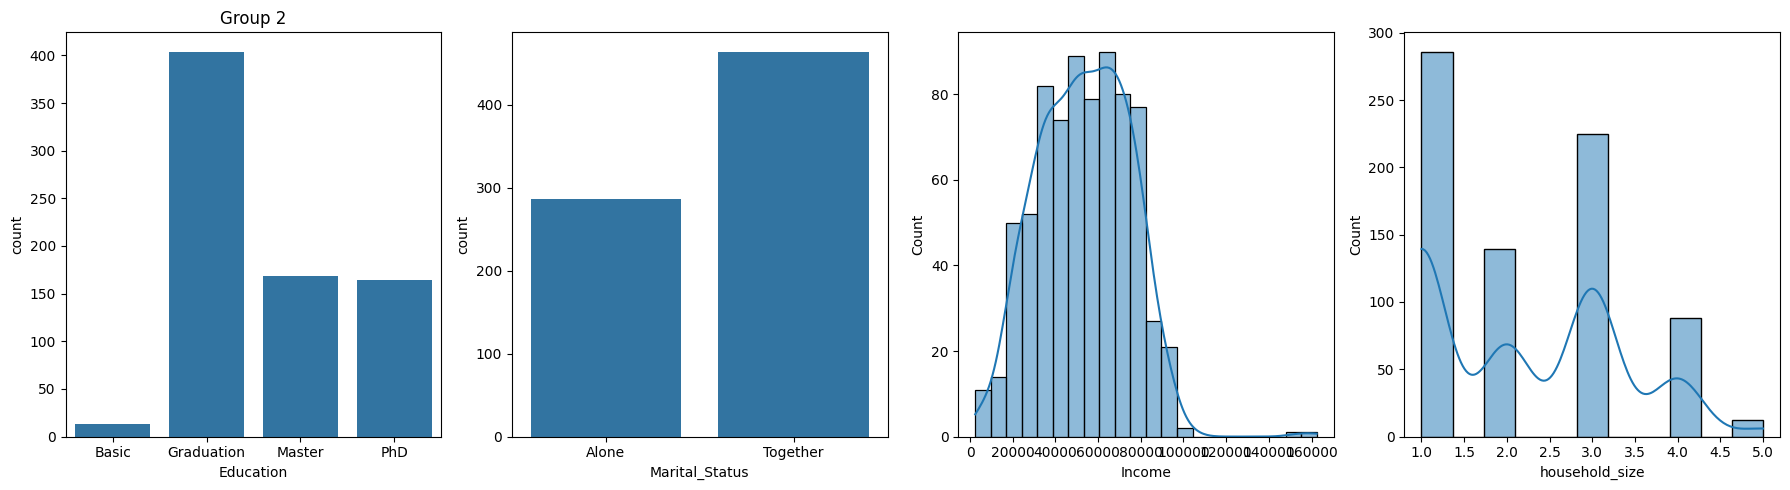

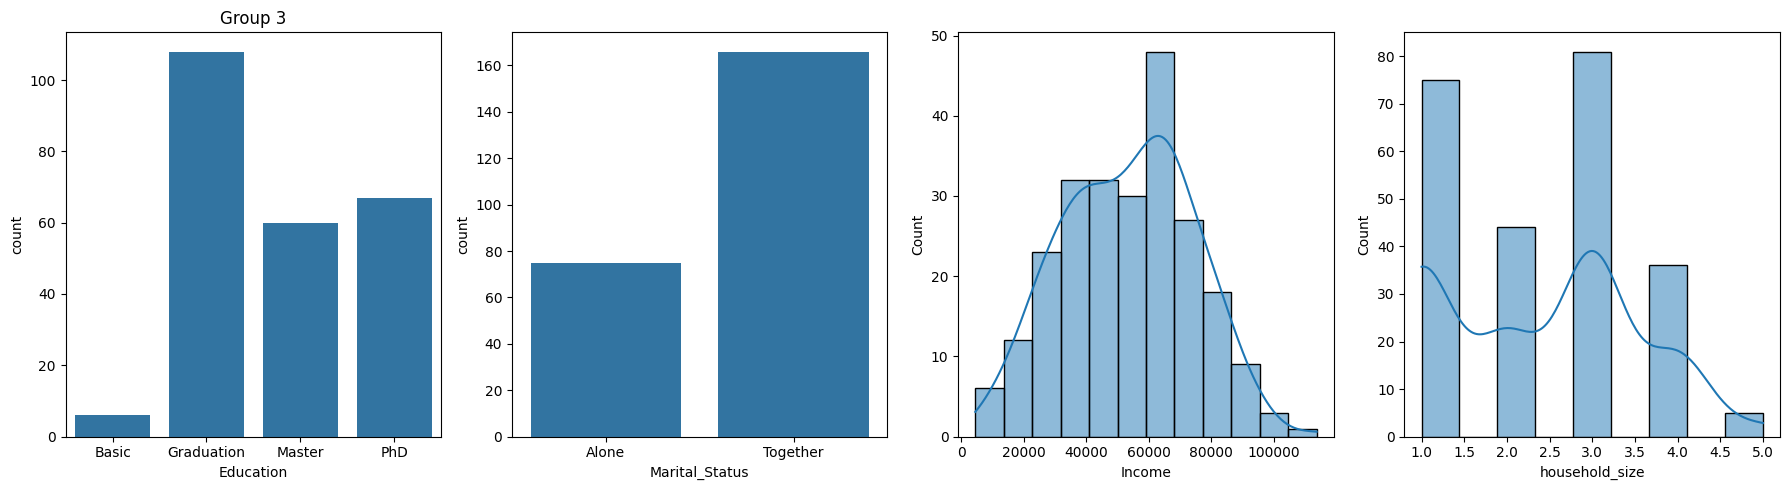

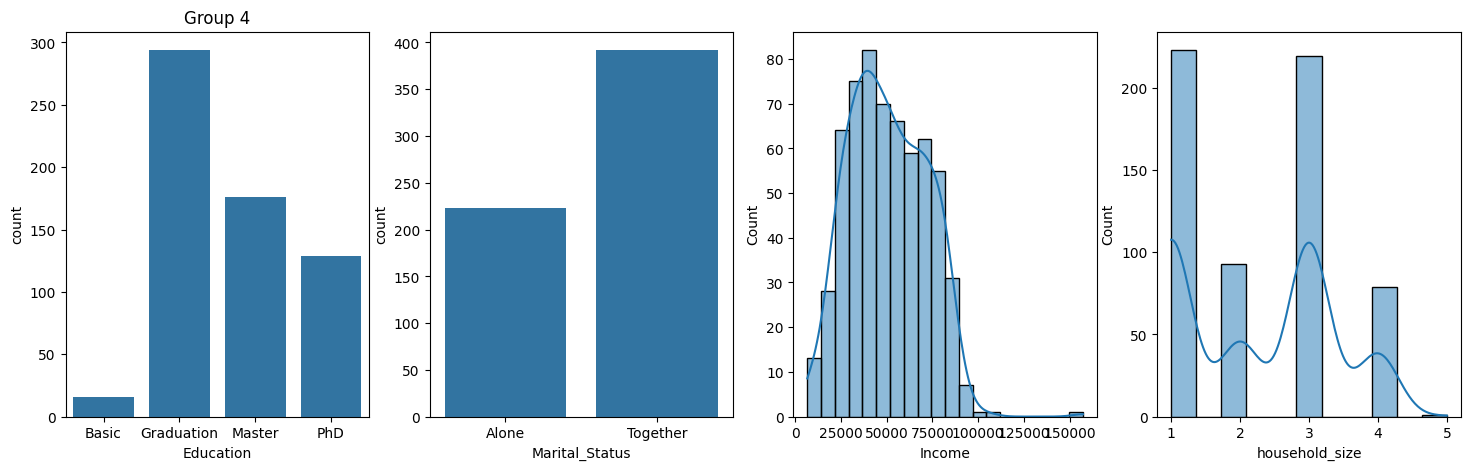

In [ ]:
#Group 1
plt.figure(figsize = (18,5))
plt.subplot(1, 4, 1)
sns.countplot(x='Education', data=group_1_df)
plt.title('Group 1')

plt.subplot(1, 4, 2)
sns.countplot(x='Marital_Status', data=group_1_df)

plt.subplot(1, 4, 3)
sns.histplot(group_1_df['Income'], kde=True)

plt.subplot(1, 4, 4)
sns.histplot(group_1_df['household_size'], kde=True)

plt.tight_layout()
plt.show()

#Group 2
plt.figure(figsize = (18,5))
plt.subplot(1, 4, 1)
sns.countplot(x='Education', data=group_2_df)
plt.title('Group 2')

plt.subplot(1, 4, 2)
sns.countplot(x='Marital_Status', data=group_2_df)

plt.subplot(1, 4, 3)
sns.histplot(group_2_df['Income'], kde=True)

plt.subplot(1, 4, 4)
sns.histplot(group_2_df['household_size'], kde=True)

plt.tight_layout()
plt.show()

#Group 3
plt.figure(figsize = (18,5))
plt.subplot(1, 4, 1)
sns.countplot(x='Education', data=group_3_df)
plt.title('Group 3')

plt.subplot(1, 4, 2)
sns.countplot(x='Marital_Status', data=group_3_df)

plt.subplot(1, 4, 3)
sns.histplot(group_3_df['Income'], kde=True)

plt.subplot(1, 4, 4)
sns.histplot(group_3_df['household_size'], kde=True)

plt.tight_layout()
plt.show()

#Group 4
plt.figure(figsize = (18,5))
plt.subplot(1, 4, 1)
sns.countplot(x='Education', data=group_4_df)
plt.title('Group 4')

plt.subplot(1, 4, 2)
sns.countplot(x='Marital_Status', data=group_4_df)

plt.subplot(1, 4, 3)
sns.histplot(group_4_df['Income'], kde=True)

plt.subplot(1, 4, 4)
sns.histplot(group_4_df['household_size'], kde=True)

plt.show()

In [ ]:
print(group_1_df['Income'].median())
print(group_2_df['Income'].median())
print(group_3_df['Income'].median())
print(group_4_df['Income'].median())

49218.0
53898.0
54237.0
49389.0


**Observation and Insights:**

*   When perplexity was set to 40, there were at least two clusters that may be visualized.  It may be less obvious, but up to 3 groups can be determined.
*   In some ways, the TSNE graph is cluttered and too complex for practical usage.  Nonetheless, distinctive groupings and profiles were made from the groupings defined.
*   For all groups, the most common Education level was 'Graduation'.  Group 3 had slightly more PhD's and Group 1 had slightly more Master's levels.
*   As for Household Size, all groups were bimodal - most sizes being either 1 (single) and 3 (together with one child).
*   Again, income distribution was the most distiguished between the groups, but their medians were all similar (between $49,000-$54,000).  Nonetheless, in our box plots, we see that Group 2 and 3 largely have higher incomes than Group 1 and 4.  The main differentiator between 2 and 3 is that Group 2 has had a longer customer lifetime than Group 3.


### **Applying PCA**

In [ ]:
n = scaled_segmenting_data.shape[1]
print(n)

20


In [ ]:
pca = PCA(n_components=n, random_state = 1)
pca_data = pca.fit_transform(scaled_segmenting_data)

In [ ]:
exp_var = pca.explained_variance_ratio_
print(exp_var)

[3.44545612e-01 1.01326481e-01 9.03438750e-02 6.23358465e-02
 6.01174838e-02 5.04631393e-02 4.60431521e-02 4.06262442e-02
 3.73831100e-02 3.01832680e-02 2.35922713e-02 2.29288765e-02
 2.07281137e-02 1.91982003e-02 1.51411442e-02 1.32581614e-02
 1.26154086e-02 9.16961268e-03 6.70214766e-33 2.13085761e-33]


Text(0, 0.5, 'Cumulative Explained Variance')

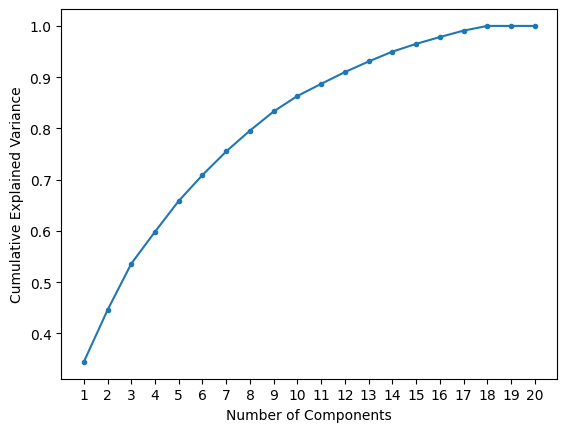

In [ ]:
plt.plot(range(1, 21), exp_var.cumsum(), marker = '.')
plt.xlabel('Number of Components')
plt.xticks(range(1, 21))
plt.ylabel('Cumulative Explained Variance')

In [ ]:
pca = PCA(n_components=6, random_state = 1)
pca_data = pca.fit_transform(scaled_segmenting_data)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
pca_df.head()

PC1       PC2       PC3       PC4       PC5       PC6
0  3.428302  1.126730 -1.470952  1.734356 -0.921309 -0.561770
1 -2.498884 -1.310956 -0.316427 -0.042209  1.410021  0.515231
2  2.020855  0.578669 -1.127988 -1.530646 -0.405409  0.910965
3 -2.679324 -0.831878 -0.118569 -0.122800 -0.005703  1.029994
4 -0.275251  0.580884 -0.558798  0.357069  1.034857 -1.045593

**Observation and Insights:**


*   There are no clear number of components that is best-suited due to the curved shape of the graph.
*   It is possible to estimate that 3 components may be best suited since after 3, the differences in the cumulative explained variance from one component to the next decreases.
*   However, I selected 6 Principal Components ultimately because 6 princiapl components is the number that explains at least 70% of variance.

## **K-Means**

In [ ]:
sse = {}

for k in range (1, 6):
  kmeans = KMeans(n_clusters=k, random_state = 1).fit(scaled_segmenting_data)
  sse[k] = kmeans.inertia_

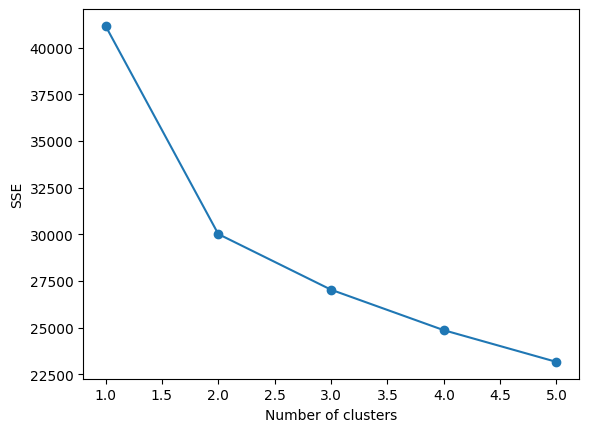

In [ ]:
#Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

### **Applying KMeans on the PCA data and visualize the clusters**

In [ ]:
pca_df_kmeans = pca_df.copy(deep=True)

kmeans = KMeans(n_clusters = 2, random_state = 1)
kmeans_labels = kmeans.fit(pca_df_kmeans)
pca_df_kmeans['Cluster'] = kmeans.labels_

In [ ]:
#Silhouette score
fitpredictkmeans = kmeans.fit_predict(pca_df_kmeans)
kmeans_silhouette = silhouette_score(pca_df_kmeans, fitpredictkmeans)
print(kmeans_silhouette)

0.38191778773640195


In [ ]:
kmeans_sil = kmeans_silhouette
print(kmeans_sil)

0.38191778773640195


In [ ]:
pca_df_kmeans

PC1       PC2       PC3       PC4       PC5       PC6  Cluster
0     3.428302  1.126730 -1.470952  1.734356 -0.921309 -0.561770        0
1    -2.498884 -1.310956 -0.316427 -0.042209  1.410021  0.515231        1
2     2.020855  0.578669 -1.127988 -1.530646 -0.405409  0.910965        0
3    -2.679324 -0.831878 -0.118569 -0.122800 -0.005703  1.029994        1
4    -0.275251  0.580884 -0.558798  0.357069  1.034857 -1.045593        1
...        ...       ...       ...       ...       ...       ...      ...
2053 -2.188859  0.470588  0.025512  0.864968  0.488533  0.993034        1
2054  2.387254  1.351339 -0.893078 -0.164204 -1.001250 -0.036147        0
2055  1.849965 -1.091553  1.228696 -0.955483 -0.332981 -1.110411        0
2056  1.939267  0.203785 -1.049745 -1.532806  1.448142  1.598364        0
2057 -1.885241  1.200590  0.093871 -0.086702  0.618261 -0.087645        1

[2058 rows x 7 columns]

In [ ]:
pca_df_kmeans

PC1       PC2       PC3       PC4       PC5       PC6  Cluster
0     3.428302  1.126730 -1.470952  1.734356 -0.921309 -0.561770        0
1    -2.498884 -1.310956 -0.316427 -0.042209  1.410021  0.515231        1
2     2.020855  0.578669 -1.127988 -1.530646 -0.405409  0.910965        0
3    -2.679324 -0.831878 -0.118569 -0.122800 -0.005703  1.029994        1
4    -0.275251  0.580884 -0.558798  0.357069  1.034857 -1.045593        1
...        ...       ...       ...       ...       ...       ...      ...
2053 -2.188859  0.470588  0.025512  0.864968  0.488533  0.993034        1
2054  2.387254  1.351339 -0.893078 -0.164204 -1.001250 -0.036147        0
2055  1.849965 -1.091553  1.228696 -0.955483 -0.332981 -1.110411        0
2056  1.939267  0.203785 -1.049745 -1.532806  1.448142  1.598364        0
2057 -1.885241  1.200590  0.093871 -0.086702  0.618261 -0.087645        1

[2058 rows x 7 columns]

In [ ]:
#Combining Kmeans and group data with Original Data for Analysis
combined_kmeans_df_cat = pd.concat([pca_df_kmeans, data], axis =1)
print(combined_kmeans_df_cat)

           PC1       PC2       PC3       PC4       PC5       PC6  Cluster  \
0     3.428302  1.126730 -1.470952  1.734356 -0.921309 -0.561770      0.0   
1    -2.498884 -1.310956 -0.316427 -0.042209  1.410021  0.515231      1.0   
2     2.020855  0.578669 -1.127988 -1.530646 -0.405409  0.910965      0.0   
3    -2.679324 -0.831878 -0.118569 -0.122800 -0.005703  1.029994      1.0   
4    -0.275251  0.580884 -0.558798  0.357069  1.034857 -1.045593      1.0   
...        ...       ...       ...       ...       ...       ...      ...   
2233       NaN       NaN       NaN       NaN       NaN       NaN      NaN   
2235       NaN       NaN       NaN       NaN       NaN       NaN      NaN   
2237       NaN       NaN       NaN       NaN       NaN       NaN      NaN   
2238       NaN       NaN       NaN       NaN       NaN       NaN      NaN   
2239       NaN       NaN       NaN       NaN       NaN       NaN      NaN   

      Year_Birth   Education Marital_Status  ...  Response   Age  \
0      

In [ ]:
#Making filters
group_1_kmeans = combined_kmeans_df_cat[combined_kmeans_df_cat['Cluster'] == 0]
group_1_kmeans_df = pd.DataFrame(group_1_kmeans)

group_2_kmeans = combined_kmeans_df_cat[combined_kmeans_df_cat['Cluster'] == 1]
group_2_kmeans_df = pd.DataFrame(group_2_kmeans)

In [ ]:
group_2_kmeans_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1189 entries, 1 to 2057
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   PC1                         1189 non-null   float64       
 1   PC2                         1189 non-null   float64       
 2   PC3                         1189 non-null   float64       
 3   PC4                         1189 non-null   float64       
 4   PC5                         1189 non-null   float64       
 5   PC6                         1189 non-null   float64       
 6   Cluster                     1189 non-null   float64       
 7   Year_Birth                  1097 non-null   float64       
 8   Education                   1097 non-null   category      
 9   Marital_Status              1097 non-null   category      
 10  Income                      1097 non-null   float64       
 11  Kidhome                     1097 non-null   float64       
 1

In [ ]:
print('Median Income')
print(group_1_kmeans_df['Income'].median())
print(group_2_kmeans_df['Income'].median())

print('Mean Income')
print(group_1_kmeans_df['Income'].mean())
print(group_2_kmeans_df['Income'].mean())

print('Median Age')
print(group_1_kmeans_df['Age'].median())
print(group_2_kmeans_df['Age'].median())

print('Mean Age')
print(group_1_kmeans_df['Age'].mean())
print(group_2_kmeans_df['Age'].mean())

print('Median Household Size')
print(group_1_kmeans_df['household_size'].median())
print(group_2_kmeans_df['household_size'].median())

print('Mean Household Size')
print(group_1_kmeans_df['household_size'].mean())
print(group_2_kmeans_df['household_size'].mean())

print('Median NumStorePurchases')
print(group_1_kmeans_df['NumStorePurchases'].median())
print(group_2_kmeans_df['NumStorePurchases'].median())

print('Mean NumStorePurchases')
print(group_1_kmeans_df['NumStorePurchases'].mean())
print(group_2_kmeans_df['NumStorePurchases'].mean())

print('Median NumWebPurchases')
print(group_1_kmeans_df['NumWebPurchases'].median())
print(group_2_kmeans_df['NumWebPurchases'].median())

print('NumWebPurchases')
print(group_1_kmeans_df['NumWebPurchases'].mean())
print(group_2_kmeans_df['NumWebPurchases'].mean())

print('Median NumDealsPurchases')
print(group_1_kmeans_df['NumDealsPurchases'].median())
print(group_2_kmeans_df['NumDealsPurchases'].median())

print('Mean NumDealsPurchases')
print(group_1_kmeans_df['NumDealsPurchases'].mean())
print(group_2_kmeans_df['NumDealsPurchases'].mean())

print('Median NumDealsPurchases')
print(group_1_kmeans_df['NumDealsPurchases'].median())
print(group_2_kmeans_df['NumDealsPurchases'].median())

print('Mean NumDealsPurchases')
print(group_1_kmeans_df['NumDealsPurchases'].mean())
print(group_2_kmeans_df['NumDealsPurchases'].mean())

print('Median percent_deals')
print(group_1_kmeans_df['percent_deals'].median())
print(group_2_kmeans_df['percent_deals'].median())

print('Mean percent_deals')
print(group_1_kmeans_df['percent_deals'].mean())
print(group_2_kmeans_df['percent_deals'].mean())

print('Median Teenhome')
print(group_1_kmeans_df['Teenhome'].median())
print(group_2_kmeans_df['Teenhome'].median())

print('Mean Teenhome')
print(group_1_kmeans_df['Teenhome'].mean())
print(group_2_kmeans_df['Teenhome'].mean())

print('Median MntGoldProds')
print(group_1_kmeans_df['MntGoldProds'].median())
print(group_2_kmeans_df['MntGoldProds'].median())

print('Mean MntGoldProds')
print(group_1_kmeans_df['MntGoldProds'].mean())
print(group_2_kmeans_df['MntGoldProds'].mean())

Median Income
54058.0
50002.0
Mean Income
53599.29941840584
50993.201904768874
Median Age
46.0
46.0
Mean Age
47.40644361833953
47.01458523245214
Median Household Size
2.0
2.0
Mean Household Size
2.220570012391574
2.2898814949863264
Median NumStorePurchases
5.0
5.0
Mean NumStorePurchases
5.965303593556381
5.68003646308113
Median NumWebPurchases
4.0
4.0
NumWebPurchases
4.2168525402726145
4.010938924339107
Median NumDealsPurchases
2.0
2.0
Mean NumDealsPurchases
2.224287484510533
2.422971741112124
Median NumDealsPurchases
2.0
2.0
Mean NumDealsPurchases
2.224287484510533
2.422971741112124
Median percent_deals
21.428571428571427
25.0
Mean percent_deals
25.981469697094084
30.29923390280701
Median Teenhome
0.0
0.0
Mean Teenhome
0.49814126394052044
0.5077484047402006
Median MntGoldProds
25.0
24.0
Mean MntGoldProds
45.41140024783147
42.15679124886053


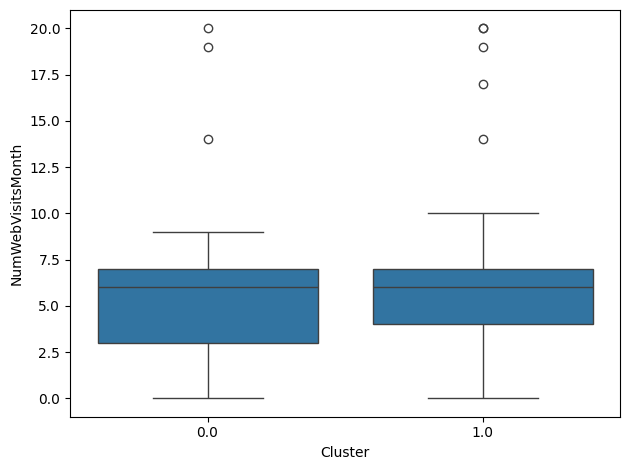

In [ ]:
sns.boxplot(y=combined_kmeans_df_cat['NumWebVisitsMonth'], x=combined_kmeans_df_cat['Cluster'])
plt.tight_layout()
plt.show()

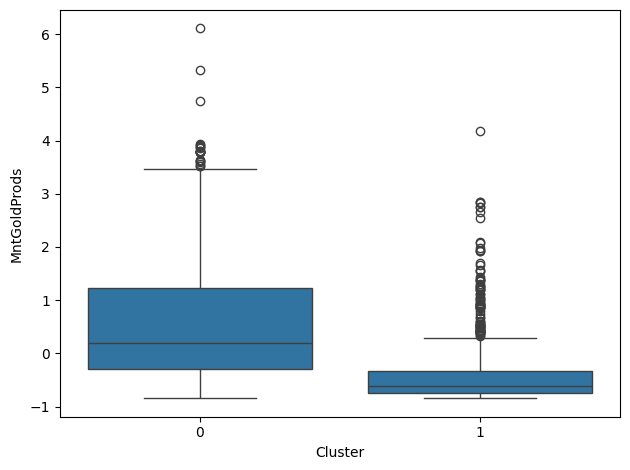

In [ ]:
sns.boxplot(y=scaled_segmenting_data_copy_tsne['MntGoldProds'], x=pca_df_kmeans['Cluster'])
plt.tight_layout()
plt.show()

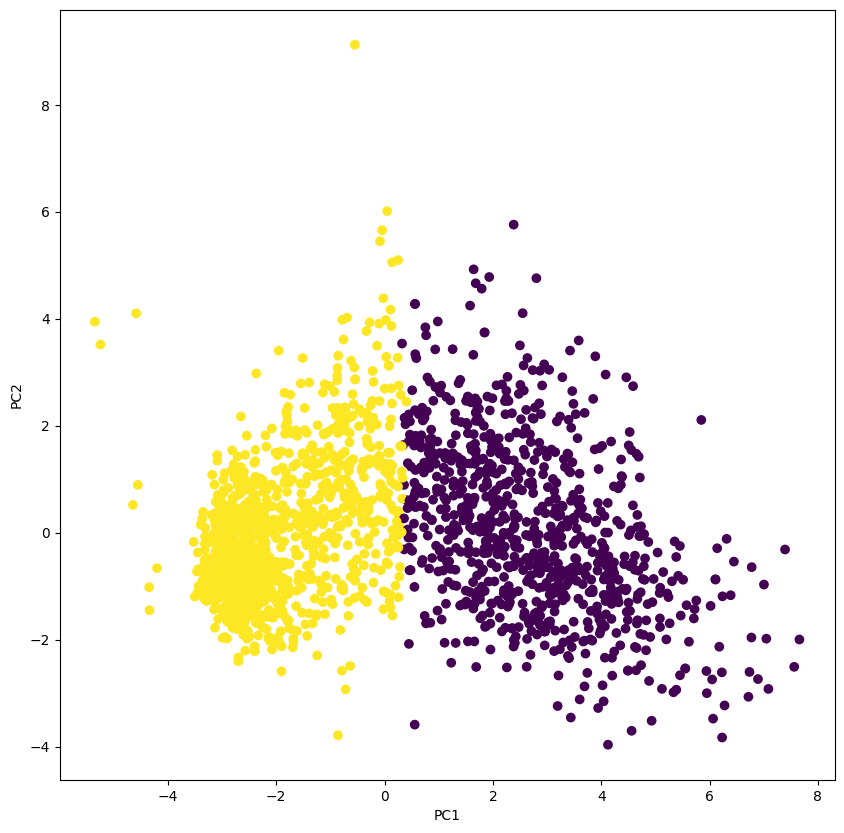

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(pca_df_kmeans['PC1'], pca_df_kmeans['PC2'], c=pca_df_kmeans['Cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### **Cluster Profiling**


In [ ]:
pca_df_kmeans

PC1       PC2       PC3       PC4       PC5       PC6  Cluster
0     3.428302  1.126730 -1.470952  1.734356 -0.921309 -0.561770        0
1    -2.498884 -1.310956 -0.316427 -0.042209  1.410021  0.515231        1
2     2.020855  0.578669 -1.127988 -1.530646 -0.405409  0.910965        0
3    -2.679324 -0.831878 -0.118569 -0.122800 -0.005703  1.029994        1
4    -0.275251  0.580884 -0.558798  0.357069  1.034857 -1.045593        1
...        ...       ...       ...       ...       ...       ...      ...
2053 -2.188859  0.470588  0.025512  0.864968  0.488533  0.993034        1
2054  2.387254  1.351339 -0.893078 -0.164204 -1.001250 -0.036147        0
2055  1.849965 -1.091553  1.228696 -0.955483 -0.332981 -1.110411        0
2056  1.939267  0.203785 -1.049745 -1.532806  1.448142  1.598364        0
2057 -1.885241  1.200590  0.093871 -0.086702  0.618261 -0.087645        1

[2058 rows x 7 columns]

In [ ]:
#Combining pca_df_kmeans and Original Data for Analysis
pca_df_kmeans_combined = pd.concat([pca_df_kmeans, data], axis = 1)
print(pca_df_kmeans_combined)

           PC1       PC2       PC3       PC4       PC5       PC6  Cluster  \
0     3.428302  1.126730 -1.470952  1.734356 -0.921309 -0.561770      0.0   
1    -2.498884 -1.310956 -0.316427 -0.042209  1.410021  0.515231      1.0   
2     2.020855  0.578669 -1.127988 -1.530646 -0.405409  0.910965      0.0   
3    -2.679324 -0.831878 -0.118569 -0.122800 -0.005703  1.029994      1.0   
4    -0.275251  0.580884 -0.558798  0.357069  1.034857 -1.045593      1.0   
...        ...       ...       ...       ...       ...       ...      ...   
2233       NaN       NaN       NaN       NaN       NaN       NaN      NaN   
2235       NaN       NaN       NaN       NaN       NaN       NaN      NaN   
2237       NaN       NaN       NaN       NaN       NaN       NaN      NaN   
2238       NaN       NaN       NaN       NaN       NaN       NaN      NaN   
2239       NaN       NaN       NaN       NaN       NaN       NaN      NaN   

      Year_Birth   Education Marital_Status  ...  Response   Age  \
0      

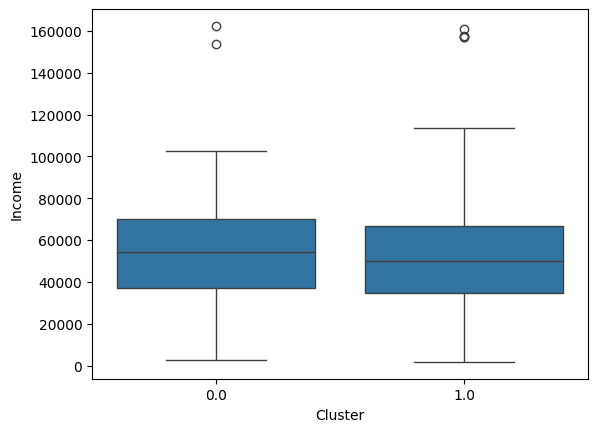

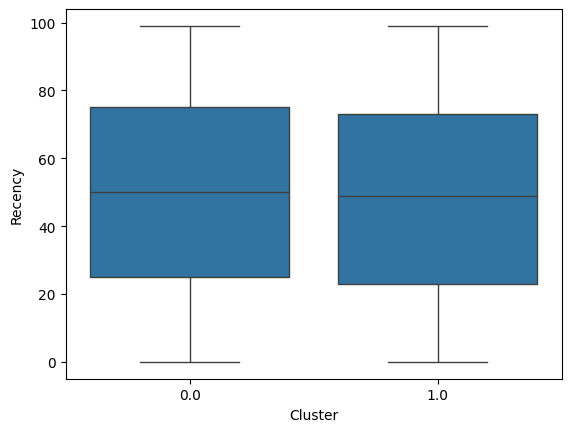

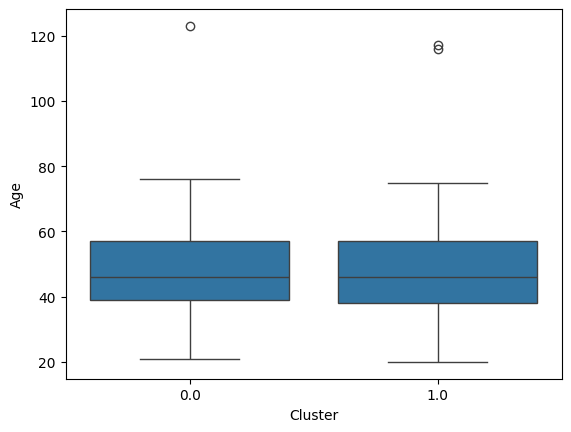

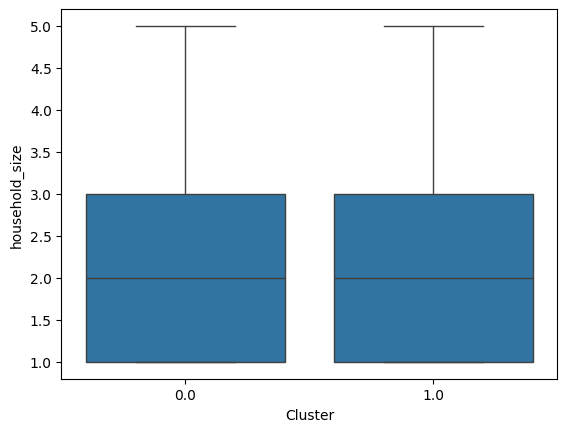

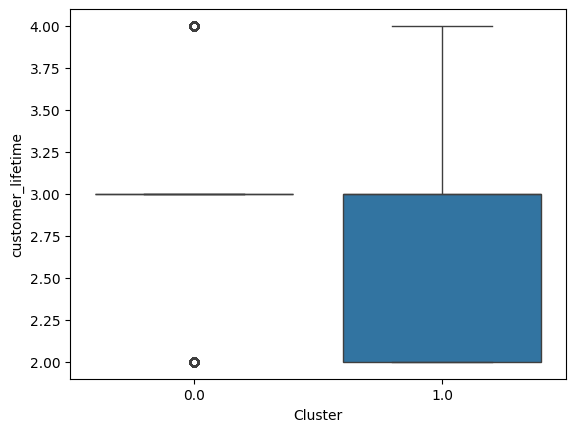

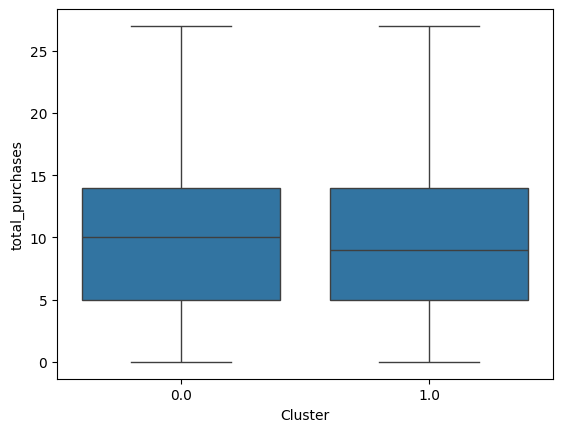

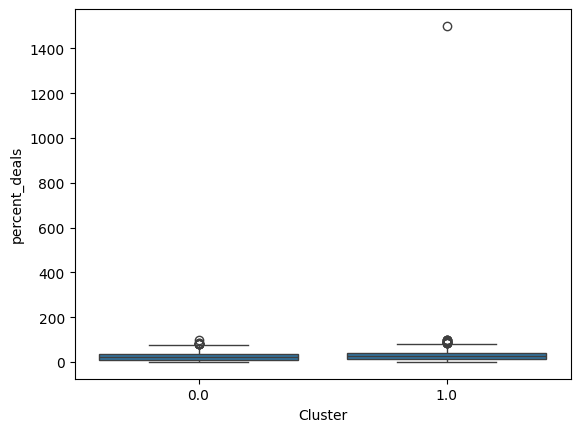

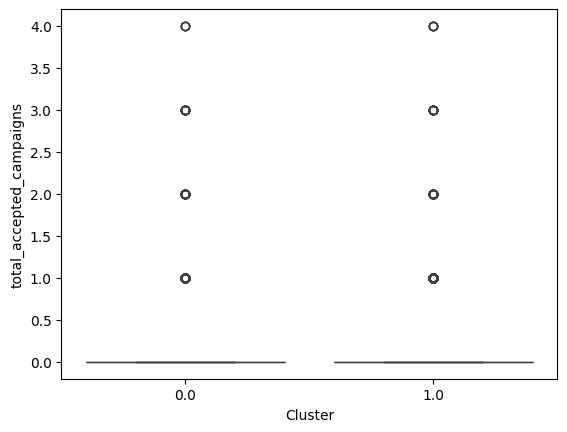

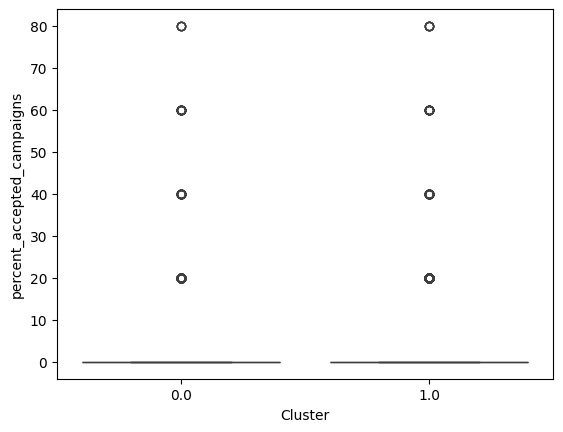

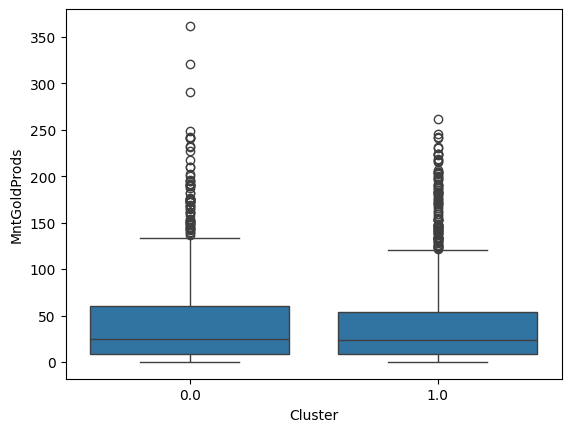

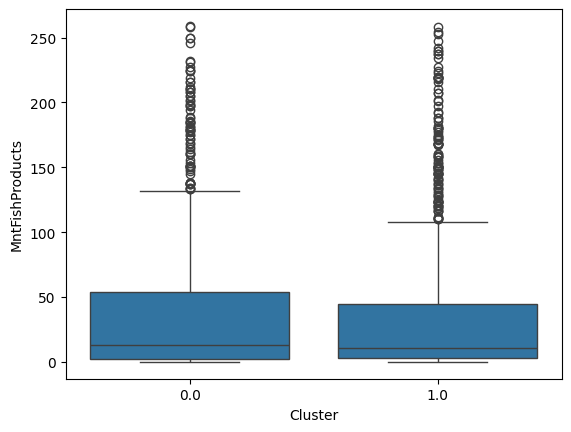

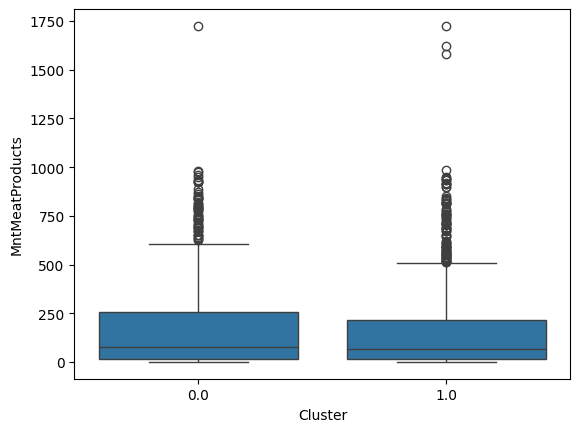

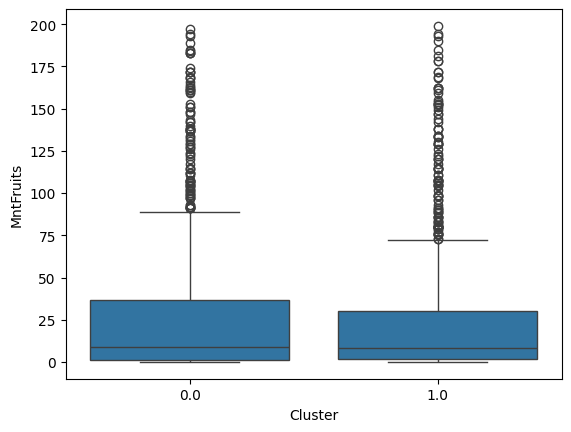

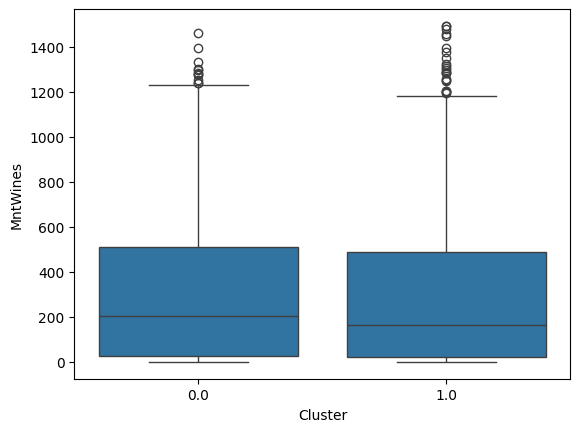

In [ ]:
for col in segmented_data_cols:
    sns.boxplot(x = 'Cluster', y = col, data = pca_df_kmeans_combined)
    plt.show()

In [ ]:
print(group_1_df['Income'].median())
print(group_2_df['Income'].median())
print(group_3_df['Income'].median())
print(group_4_df['Income'].median())

49218.0
53898.0
54237.0
49389.0


**Observations and Insights:**

*   Upon using an Elbow plot, I saw that 2 was the optimal number of clusters to use for my K-Means technique.
*   When exploring the clusters with different variables, I noticed that they did not have many distinguishing characteristics.  The only variable I found to be distinguishable was Cluster 1 having a slightly higher Number of Web Visits per Month.



### **Describe the characteristics of each cluster**

**Summary of each cluster:**

Again, both clusters shared many common characteristics with only a few slight differences.

Cluster 1 (Label 0)

*   For median: Income is $54,058; age is 46; household size is 2; number of store purchases is 5; web purchases is 4; number of deals purchased is 2; median percent deals is 21%; amount of gold purchased is 25.

Cluster 2 (Label 1)
*   Similar to Cluster 1, the median age is 46; household size is 2; number of store purchases is 5; web purchases is 4; number of deals purchased is 2.
*   Unlike Cluster 2, the median income is $40,002; percent deals is 25%; amount of gold purchased is 24.

In other words, it appears that the purchasing power of Cluster 1 is higher - which would align with the fact that the median gold purchased is also higher for this group.  The percent deals used to purchase items is higher for Cluster 2.

Given that the data is skewed (median does not equal the mean), some of these differences are more apparent when using the mean as a reference measurement.  For example, Cluster 1 purchase total is 5.9 as opposed to Cluster 2's 5.6.  The Percent Deals for Cluster 1 is only 25% as opposed to Cluster 2's 30%.

Behaviors / Channels:

*   Given these insights, we can begin hypothesizing that one group of customers will be characterized by a higher purchasing power.  This group is more likely to purchase items overall, typically in stores - as we have learned from the correlation between higher income and in store purchases.  The channel to focus on for marketing campaigns with this group would be in-store marketing.  Successful marketing with this group would likely improve overall sales.
*   As opposed to the cluster with higher income, who do not significantly use as many deals, the second cluster has lower income and more purchases are made with deals.  Marketing campaigns for this segment could involve more usage of deals.



## **K-Medoids**

In [ ]:
data_kmedoids = data.copy(deep=True)
pca_df_kmedoids = pca_df.copy(deep=True)

In [ ]:
kmedoids = KMedoids(n_clusters = 6, random_state = 1)
kmedoids.fit(pca_df_kmedoids)
data_kmedoids['kmedoLabels'] = kmedoids.predict(pca_df_kmedoids)

In [ ]:
#silhoeutte score
fitpredictkmed = kmedoids.fit_predict(pca_df_kmedoids)
kmedoids_silhouette = silhouette_score(pca_df_kmedoids, fitpredictkmed)
print(kmedoids_silhouette)

0.16067717077461152


In [ ]:
kmed_sil = kmedoids_silhouette
print(kmed_sil)

0.16067717077461152


In [ ]:
data_kmedoids.kmedoLabels.value_counts()

kmedoLabels
5    620
1    442
4    353
3    319
0    202
2    122
Name: count, dtype: int64

### **Visualize the clusters using PCA**

In [ ]:
print(segmented_data_cols)

['Income', 'Recency', 'Age', 'household_size', 'customer_lifetime', 'total_purchases', 'percent_deals', 'total_accepted_campaigns', 'percent_accepted_campaigns', 'MntGoldProds', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines']


In [ ]:
kmedo_cols = ['Income', 'Recency', 'Age', 'household_size', 'customer_lifetime', 'total_purchases', 'percent_deals', 'NumWebVisitsMonth', 'NumWebPurchases', 'NumStorePurchases',  'total_accepted_campaigns', 'percent_accepted_campaigns', 'MntGoldProds', 'MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines']


In [ ]:
combinedkmedoids_df = pd.concat([pca_df_kmedoids, data_kmedoids], axis = 1)

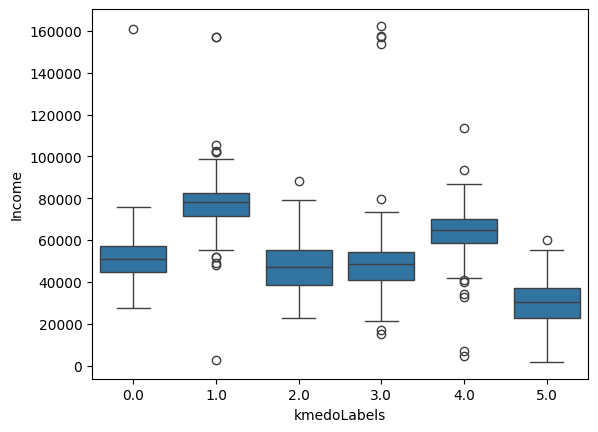

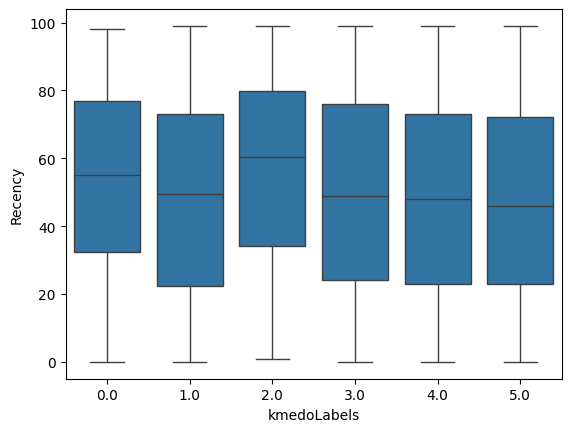

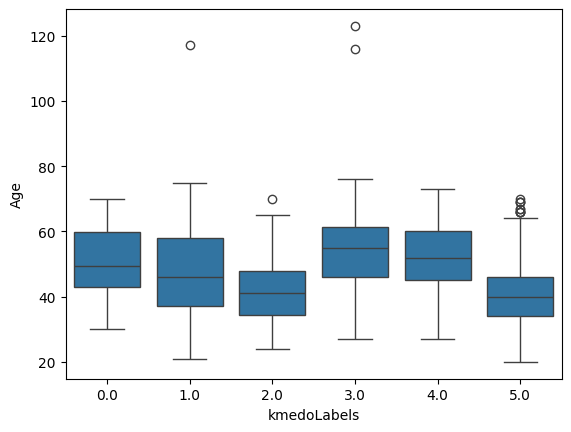

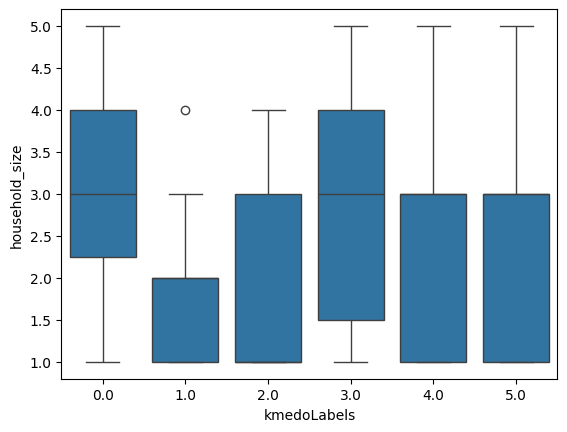

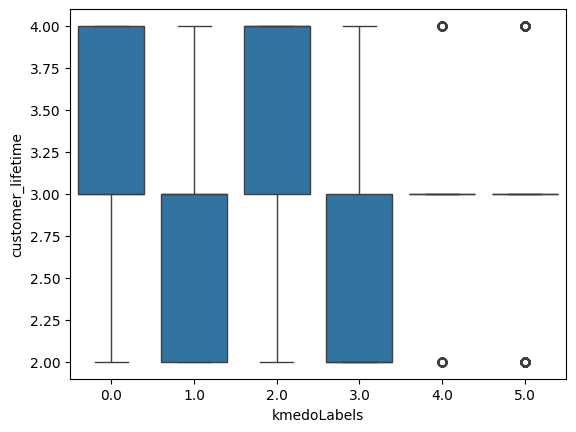

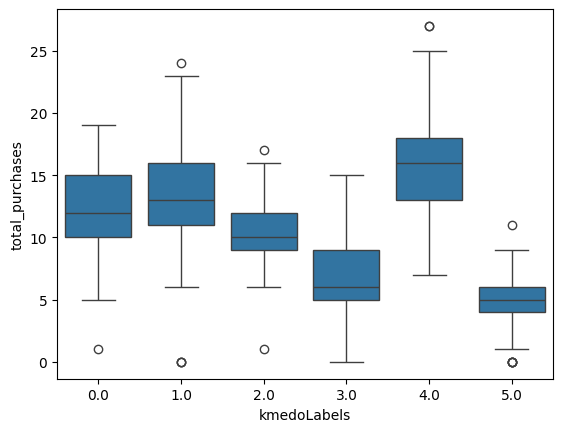

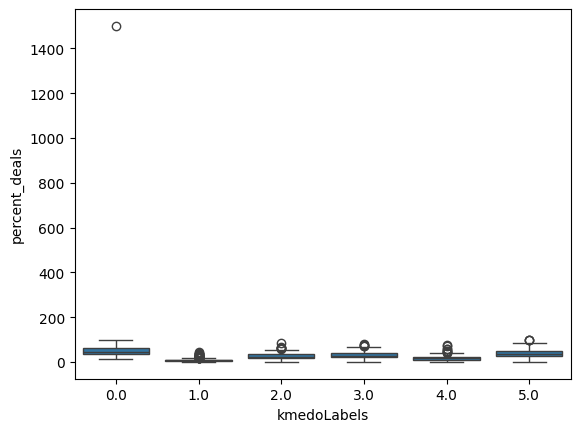

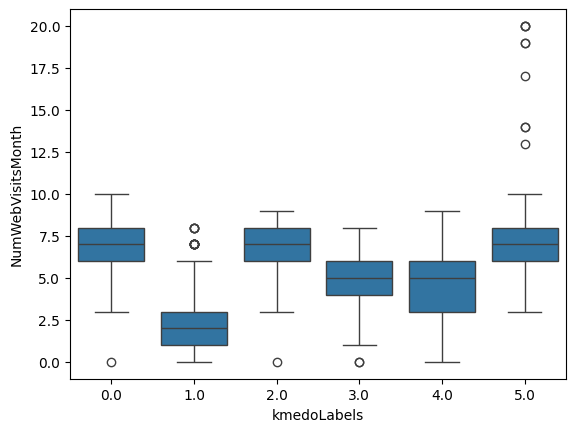

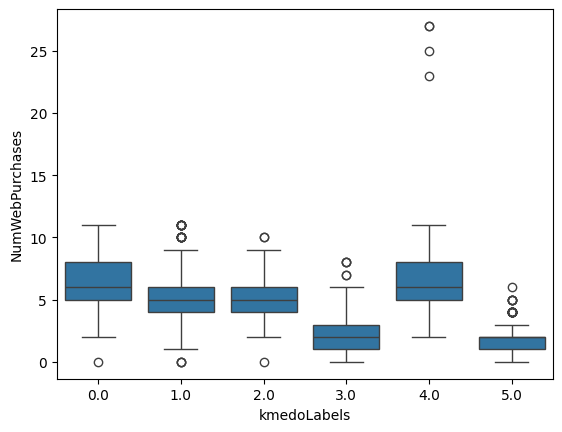

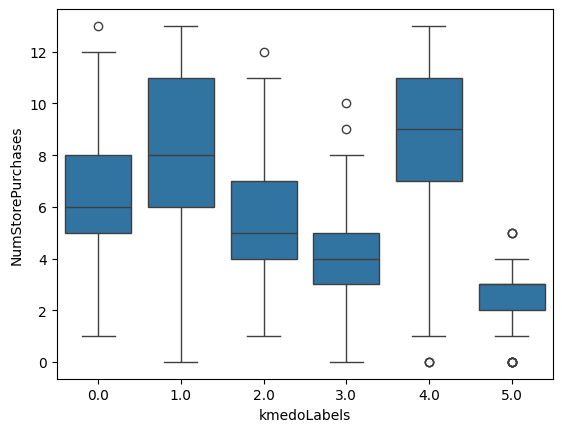

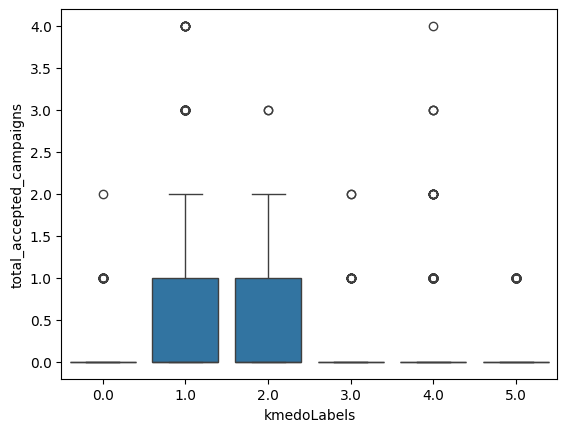

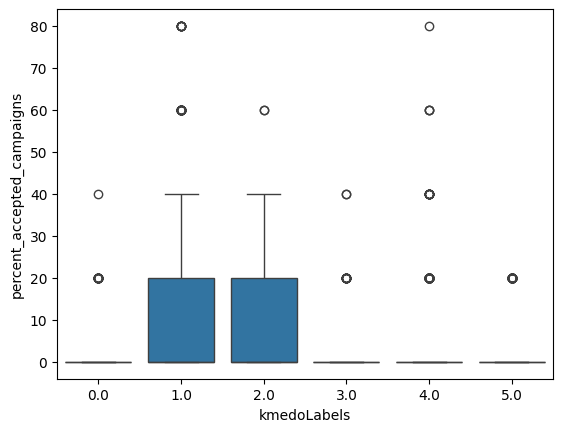

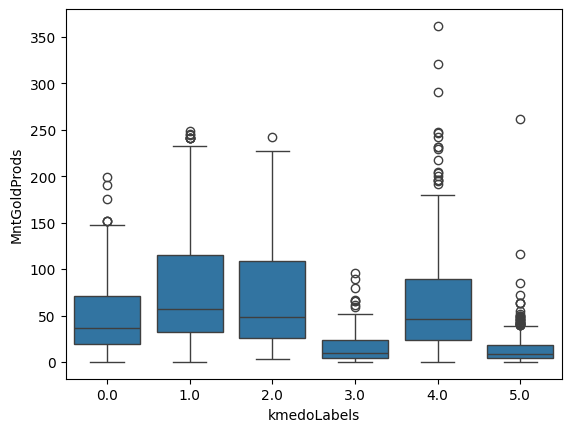

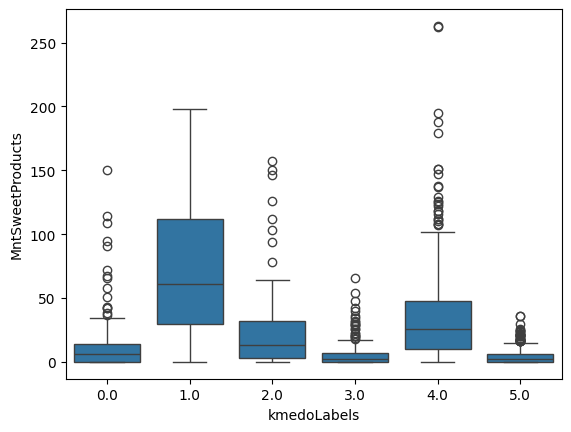

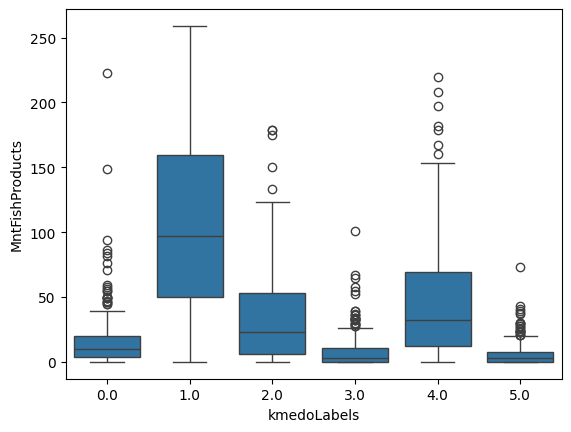

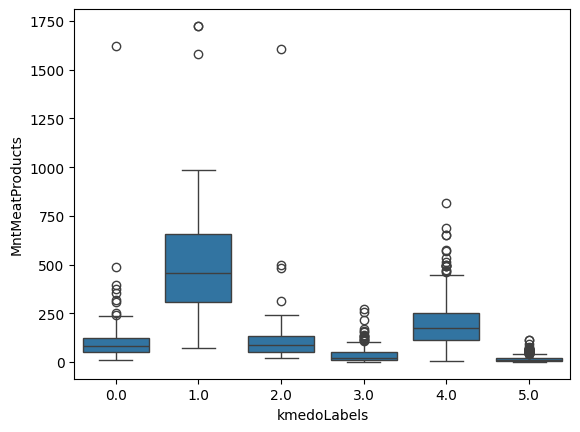

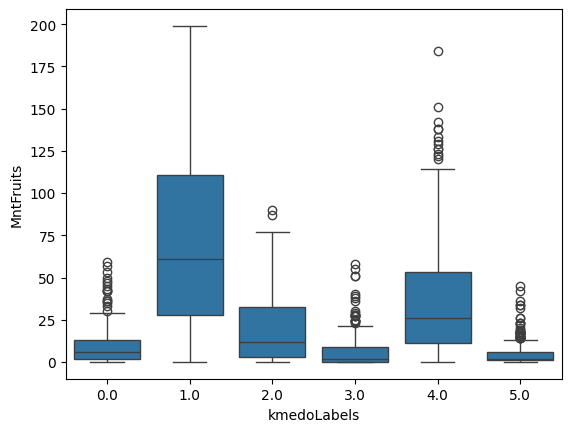

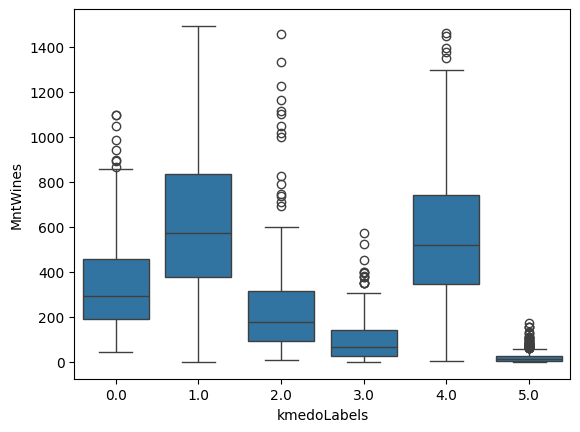

In [ ]:
for col in kmedo_cols:
    sns.boxplot(x = 'kmedoLabels', y = col, data = combinedkmedoids_df)
    plt.show()

**Comparing with clusters without PCA data**

In [ ]:
scaled_segmenting_data_copy_kmedoids = scaled_segmenting_data.copy(deep=True)

In [ ]:
kmedoids = KMedoids(n_clusters = 6, random_state = 1)
kmedoids.fit(scaled_segmenting_data_copy_kmedoids)
data_kmedoids['kmedoLabels'] = kmedoids.predict(scaled_segmenting_data_copy_kmedoids)

In [ ]:
combined_pca_kmedoids_df = pd.concat([pca_df_kmedoids, data_kmedoids], axis = 1)

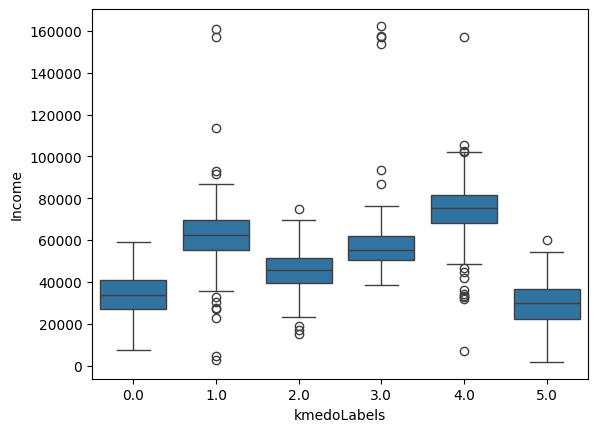

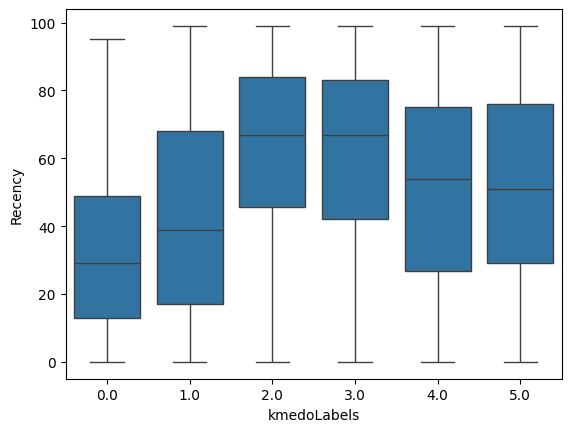

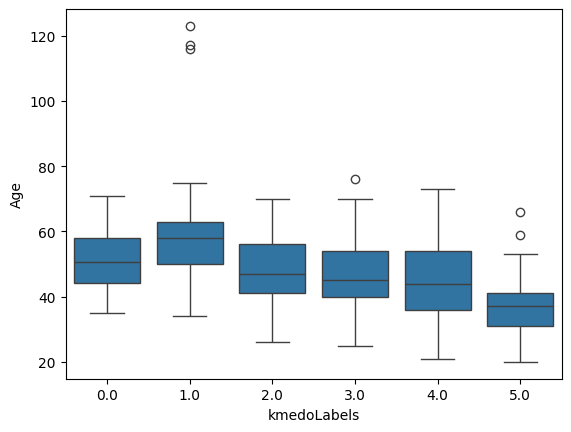

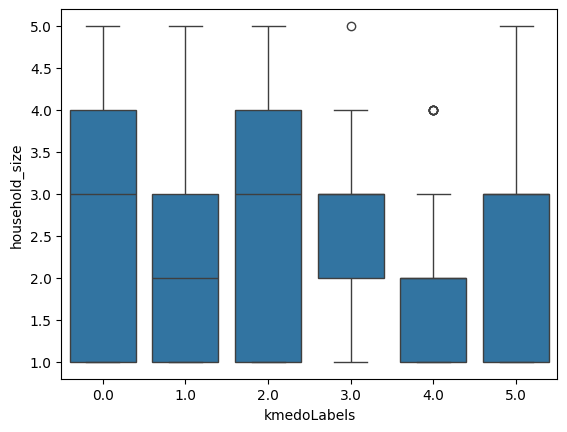

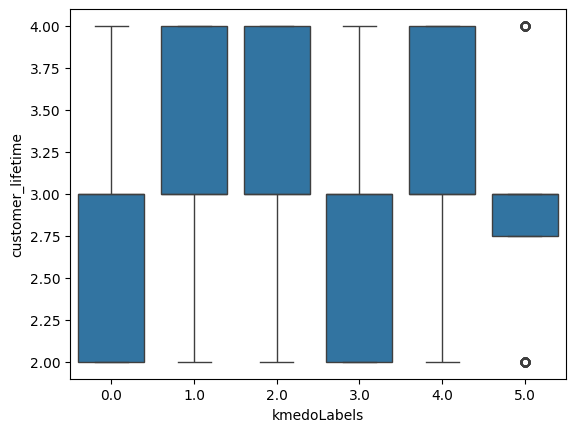

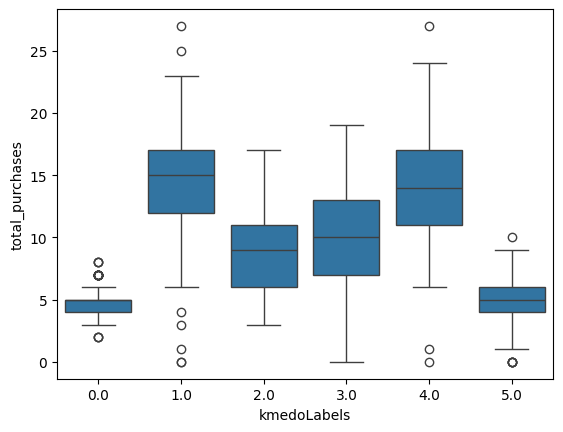

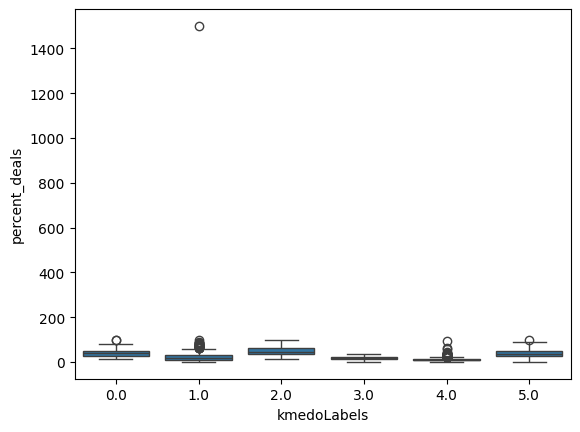

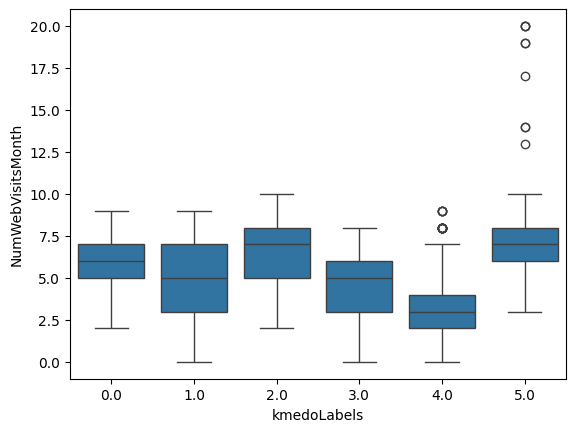

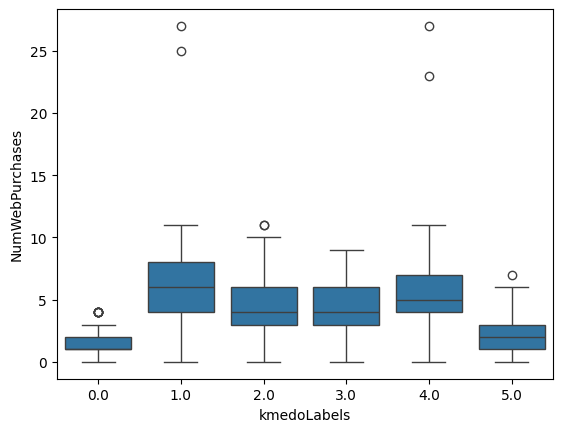

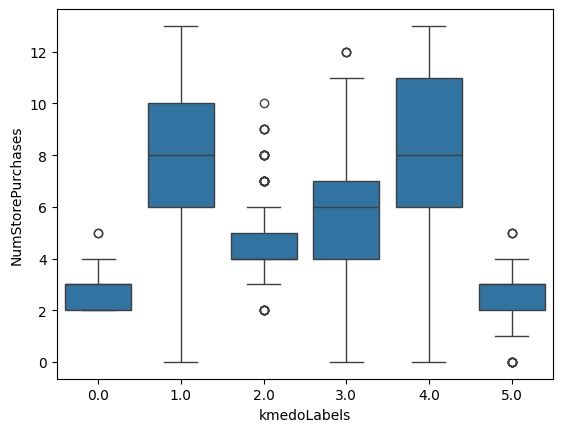

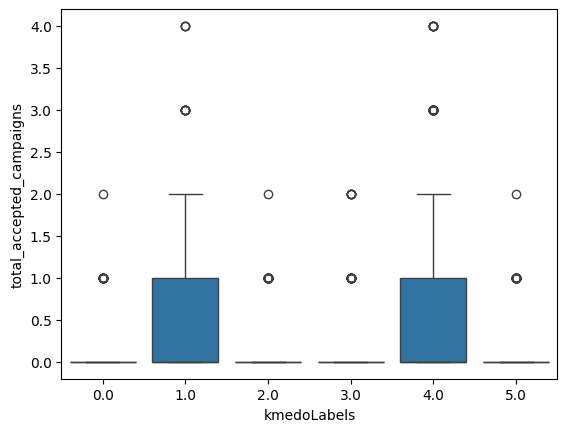

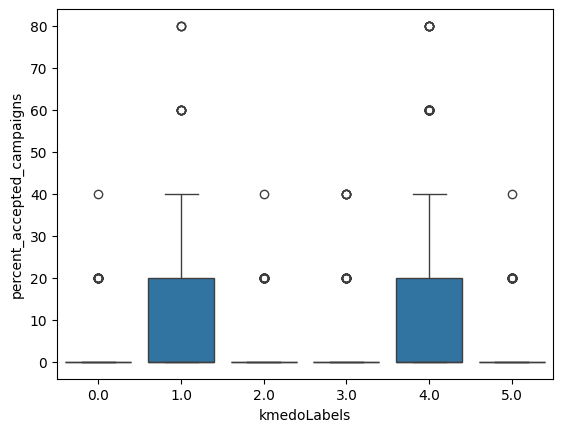

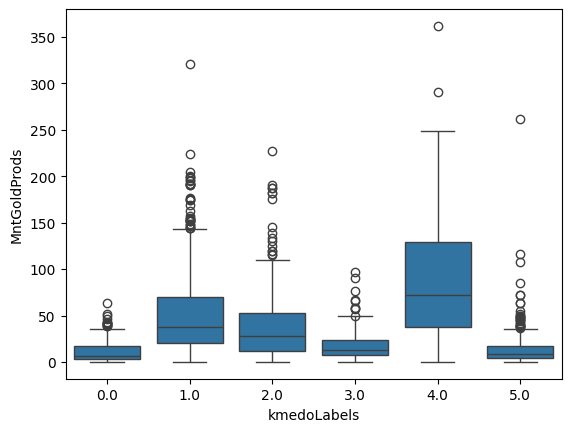

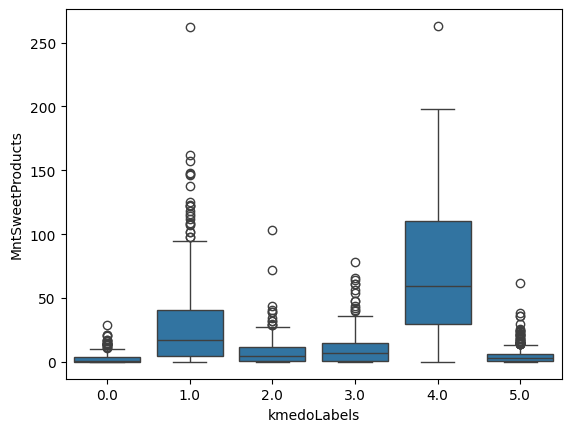

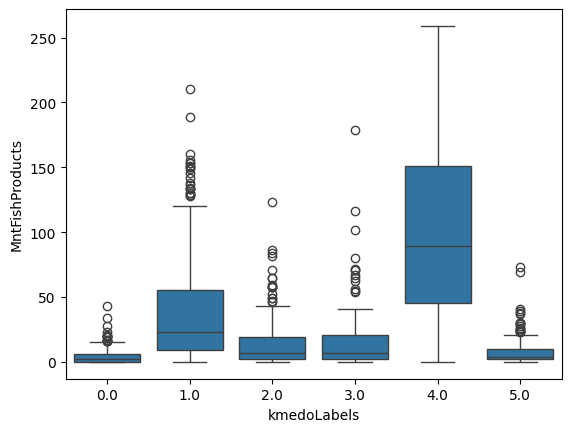

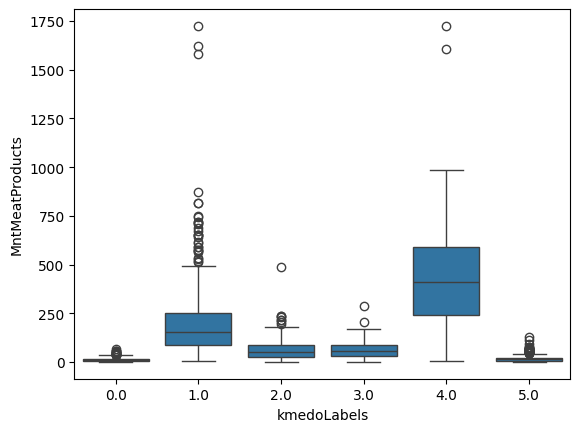

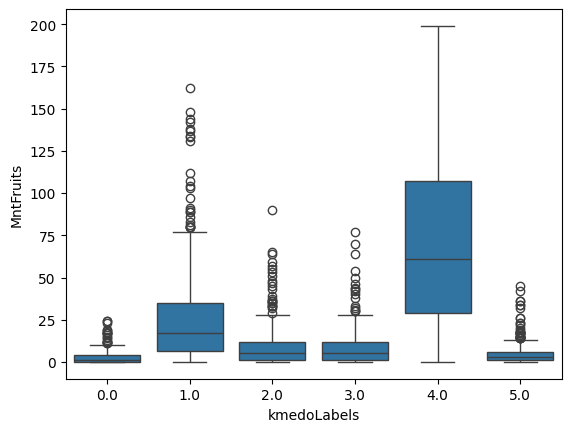

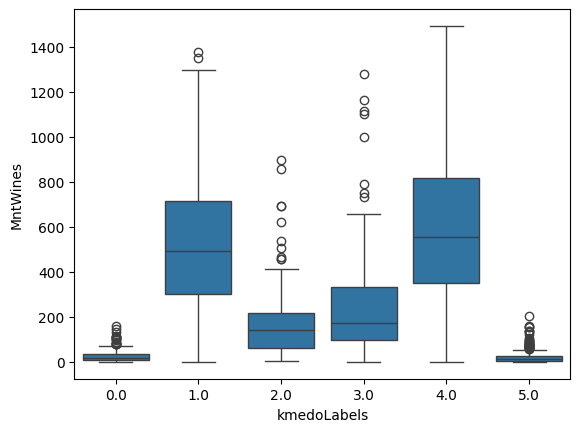

In [ ]:
for col in kmedo_cols:
    sns.boxplot(x = 'kmedoLabels', y = col, data = combined_pca_kmedoids_df)
    plt.show()

### **Cluster Profiling**

In [ ]:
combined_pca_kmedoids_df

PC1       PC2       PC3       PC4       PC5       PC6  Year_Birth  \
0     3.428302  1.126730 -1.470952  1.734356 -0.921309 -0.561770      1957.0   
1    -2.498884 -1.310956 -0.316427 -0.042209  1.410021  0.515231      1954.0   
2     2.020855  0.578669 -1.127988 -1.530646 -0.405409  0.910965      1965.0   
3    -2.679324 -0.831878 -0.118569 -0.122800 -0.005703  1.029994      1984.0   
4    -0.275251  0.580884 -0.558798  0.357069  1.034857 -1.045593      1981.0   
...        ...       ...       ...       ...       ...       ...         ...   
2233       NaN       NaN       NaN       NaN       NaN       NaN      1977.0   
2235       NaN       NaN       NaN       NaN       NaN       NaN      1967.0   
2237       NaN       NaN       NaN       NaN       NaN       NaN      1981.0   
2238       NaN       NaN       NaN       NaN       NaN       NaN      1956.0   
2239       NaN       NaN       NaN       NaN       NaN       NaN      1954.0   

       Education Marital_Status        Income  ...   Age  total_kids_teens  \
0     Graduation          Alone  58138.000000  ...  59.0               0.0   
1     Graduation          Alone  46344.000000  ...  62.0               2.0   
2     Graduation       Together  71613.000000  ...  51.0               0.0   
3     Graduation       Together  26646.000000  ...  32.0               1.0   
4            PhD       Together  58293.000000  ...  35.0               1.0   
...          ...            ...           ...  ...   ...               ...   
2233  Graduation       Together  52357.791544  ...  39.0               1.0   
2235  Graduation       Together  61223.000000  ...  49.0               1.0   
2237  Graduation          Alone  56981.000000  ...  35.0               0.0   
2238      Master       Together  69245.000000  ...  60.0               1.0   
2239         PhD       Together  52869.000000  ...  62.0               2.0   

     household_size    year  customer_lifetime  total_purchases  \
0               1.0  2012.0                4.0             12.0   
1               1.0  2014.0                2.0              3.0   
2               2.0  2013.0                3.0             18.0   
3               3.0  2014.0                2.0              6.0   
4               3.0  2014.0                2.0             11.0   
...             ...     ...                ...              ...   
2233            3.0  2013.0                3.0              6.0   
2235            3.0  2013.0                3.0             13.0   
2237            1.0  2014.0                2.0             15.0   
2238            3.0  2014.0                2.0             16.0   
2239            4.0  2012.0                4.0              7.0   

      percent_deals  total_accepted_campaigns  percent_accepted_campaigns  \
0         25.000000                       0.0                         0.0   
1         66.666667                       0.0                         0.0   
2          5.555556                       0.0                         0.0   
3         33.333333                       0.0                         0.0   
4         45.454545                       0.0                         0.0   
...             ...                       ...                         ...   
2233      66.666667                       0.0                         0.0   
2235      15.384615                       0.0                         0.0   
2237       6.666667                       1.0                        20.0   
2238      12.500000                       0.0                         0.0   
2239      42.857143                       0.0                         0.0   

      kmedoLabels  
0             4.0  
1             0.0  
2             1.0  
3             5.0  
4             2.0  
...           ...  
2233          5.0  
2235          4.0  
2237          4.0  
2238          1.0  
2239          2.0  

[2212 rows x 42 columns]

In [ ]:
combined_pca_kmedoids_df[kmedo_cols + ['kmedoLabels']].groupby('kmedoLabels').mean()

Income    Recency        Age  household_size  \
kmedoLabels                                                       
0.0          33678.881019  32.835570  51.610738        2.510067   
1.0          62638.808072  42.925926  56.900463        2.053241   
2.0          45235.593487  61.730038  48.235741        2.855513   
3.0          58761.987162  61.483221  46.570470        2.590604   
4.0          74465.343261  50.898000  44.704000        1.826000   
5.0          29205.139131  51.848558  36.600962        2.348558   

             customer_lifetime  total_purchases  percent_deals  \
kmedoLabels                                                      
0.0                   2.761745         4.553691      41.044663   
1.0                   3.081019        14.543981      26.352138   
2.0                   3.053232         8.939163      46.275947   
3.0                   2.751678        10.060403      17.081764   
4.0                   3.022000        13.726000      10.841227   
5.0                   2.959135         4.706731      36.301034   

             NumWebVisitsMonth  NumWebPurchases  NumStorePurchases  \
kmedoLabels                                                          
0.0                   6.057047         1.624161           2.929530   
1.0                   5.020833         6.344907           8.199074   
2.0                   6.357414         4.323194           4.615970   
3.0                   4.691275         4.120805           5.939597   
4.0                   3.100000         5.340000           8.386000   
5.0                   7.338942         1.896635           2.810096   

             total_accepted_campaigns  percent_accepted_campaigns  \
kmedoLabels                                                         
0.0                          0.083893                    1.677852   
1.0                          0.372685                    7.453704   
2.0                          0.133080                    2.661597   
3.0                          0.214765                    4.295302   
4.0                          0.658000                   13.160000   
5.0                          0.084135                    1.682692   

             MntGoldProds  MntSweetProducts  MntFishProducts  MntMeatProducts  \
kmedoLabels                                                                     
0.0             10.855705          2.936242         4.379195        13.063758   
1.0             53.861111         28.060185        38.127315       207.129630   
2.0             40.756654          8.600760        13.041825        64.703422   
3.0             18.872483         12.040268        16.516779        62.496644   
4.0             89.004000         73.690000       100.794000       436.034000   
5.0             13.834135          4.884615         6.634615        17.829327   

             MntFruits    MntWines  
kmedoLabels                         
0.0           3.023490   26.338926  
1.0          25.569444  530.708333  
2.0           9.653992  162.703422  
3.0          10.617450  250.946309  
4.0          71.916000  599.254000  
5.0           4.723558   20.545673

### **Characteristics of each cluster**

**Observations and Insights:**

*   It appears that Kmedoids resulted in more differentiated groups than K-means (due to not being limited to using 2 labels).
*   The labels in our clustering results using K-medoids has demographic profiling characteristics, including Age, Household size and Income.  This also lends itself to distinct behavioral characteristics per cluster, including Recency, Customer lifetime, Gold products amounts, fish products, meat products, fruit products and wine products.
*   Whereas K-Means clusters only revealed that marketing campaigns should be directed to groups of different types of incomes and in-store visits, K-Medoids labels can help us target customers even more specifically by identifying types of products they have historically bought the most to date.
*   The groups from performing K-Medoids on data without PCA seems to provide more distinct groupings and lends itself to characterization.


**Summary for each cluster:**

Cluster 1 (Label 0)
*   This group is characterized by a mostly low income family group.  With a larger household (children at home), they engage more with deals and have a higher percentage of purchases that were through deals.  As mentioned before, out of the six groups, they have the lowest income, so they are much more cost-conscious and make the least purchases overall.
*   While Cluster 1 does not have the most web or store purchases, they do have a high amount of web visits.  Although they have the lowest web purchases, the fact that they still visit the web often suggests that they visit the web to check for deals online.
*   Most: Percent deals, Household size
*   Least: Income, Store visits, Web purchases, Gold purchases

Cluster 2 (Label 1):
*   This group is the oldest out of the six groups.  They are one of two groups with the most purchases overall.  Yet, since they have only the second-highest income, they make less purchases overall in meat, wine, fish, fruits and gold.  They are more likely to engage with campaigns.  THey have had the longest customer lifetime.  As this group has a huge range in household size, they are less characterized as 'family' as much as they are being perhaps a typically older couple that may or may not still have children at home.  They have more disposable income than younger families.
*   Not only does this group make the most purchases overall, they have the highest web purchases.  This is important to note because it is contradictory to some expectations that older groups prefer avoiding technology. This group does show a preference for web purchases over store purchases.  Interestingly, they have less web visits than Cluster 1, but since they have a higher income than Cluster 1, they are more likely to purchase something online.
*   Most: Age, Sweets purchased, Web purchases, Accepted campaigns, Total purchases, Customer lifetime
*   Least: Percent deals

Cluster 3 (Label 2):
*   Much like Cluster 1, this group also has the largest household size among the six groups.  With children at home, they similarly behave in terms of purchases mostly through deals.  Unlike Cluster 1, they are one of the three groups with the highest customer lifetime, which alludes to higher customer loyalty.  Perhaps due to this, they do not have the least total purchases, and tend to purchase more gold, meat, wine, fruits and sweets than the other family-categorized counterparts.  They are around the same age as the other parent group but make more income overall.
*   Having a higher income than Cluster 1 may help explain in part why they also make more web and store purchases.  Like Cluster 1, they visit the website often - likely due to searching for deals - and show preference for web purchases over store purchases.
*   Most: Percent deals, Customer lifetime, Recency, Household size
*   Least: None

Cluster 4 (Label 3):
*   This group is the younger than the general customer population and also has a smaller range of household size - with larger than most.  They do not make neither the most nor least income - and likewise, they simply make mid-level amounts of purchases, meat, wine, fish.  Unlike Group 3, however, Group 4 has more income but buys less gold.  Again, this may due to being younger in age overall.  In some ways, this groups seems to represent the middle class.
*   This group seems to equalyl prefer web and store purchases.  They visit the company's website, but do not as much as other groups.  In other words, this group is perhaps neutral and not strongly behaving in one way or another in terms of channels.  Since they are not using deals, they perhaps do not see a strong incentive to check for them online.
*   Most: Recency
*   Least: Customer lifetime, Percent deals, Total accepted campaigns

Cluster 5 (Label 4):
*   Out of all the groups, this cluster has the highest income, highest enagement and highest purchases in every category.  From gold to sweets to fish, they make more purchases than any other group by a large margin.  They have the smallest hosuehold size.  On the other hand, they are not the oldest out of all the groups.  This suggests that they are single mid-aged bachelors or bachelorettes with more free time and disposable income.
*   This group shows a clear preference for purchasing through stores, and also have the second highest purchases on the web.  Again - this may be due to the group having overall more purchasing power.  Since they do not engage with deals (likely not needing it), they have the lowest website visits.
*   Most: Customer lifetime, Total purchase, Total acceped campaign Amount spent on gold, Amount on meat, Amount on wine, Amount on fish, Amount on fruits, Amount on sweets, Income, Store purchases
*   Least: Percent deals, Web visits, household size

Cluster 6 (Label 5):
*   As the youngest out of the group and the lowest customer lifetime, this group is characterized by having the least income and lowest total purchases made.  Overall, it seems that this group has had less time to develop their careers and purchasing power.  Interestingly, they also have the least amount of purchases made through deals.  This may suggest an alternate source of food and would be an interesting research topic to explore.
*   Out of all the groups, they make the least store and web purchases, simply because they rarely make purchases overall.  However, they have the highest web visits out of all the groups.  It would be, again, an insightful research to look into this group and understand their behaviors, needs and wants.
*   Most: Web visits
*   Least: Customer lifetime, Percent deals, Total purchases, Total accepted campaigns, Amount of gold, Amount of meat, Amount of wine, Amount of fish, Amount of fruits, Amount of sweets, Income, Age, Web purchases, Store purchases

## **Hierarchical Clustering**

In [ ]:
pca_hc_copy = pca_df.copy(deep=True)
data_hc_copy = data.copy(deep=True)

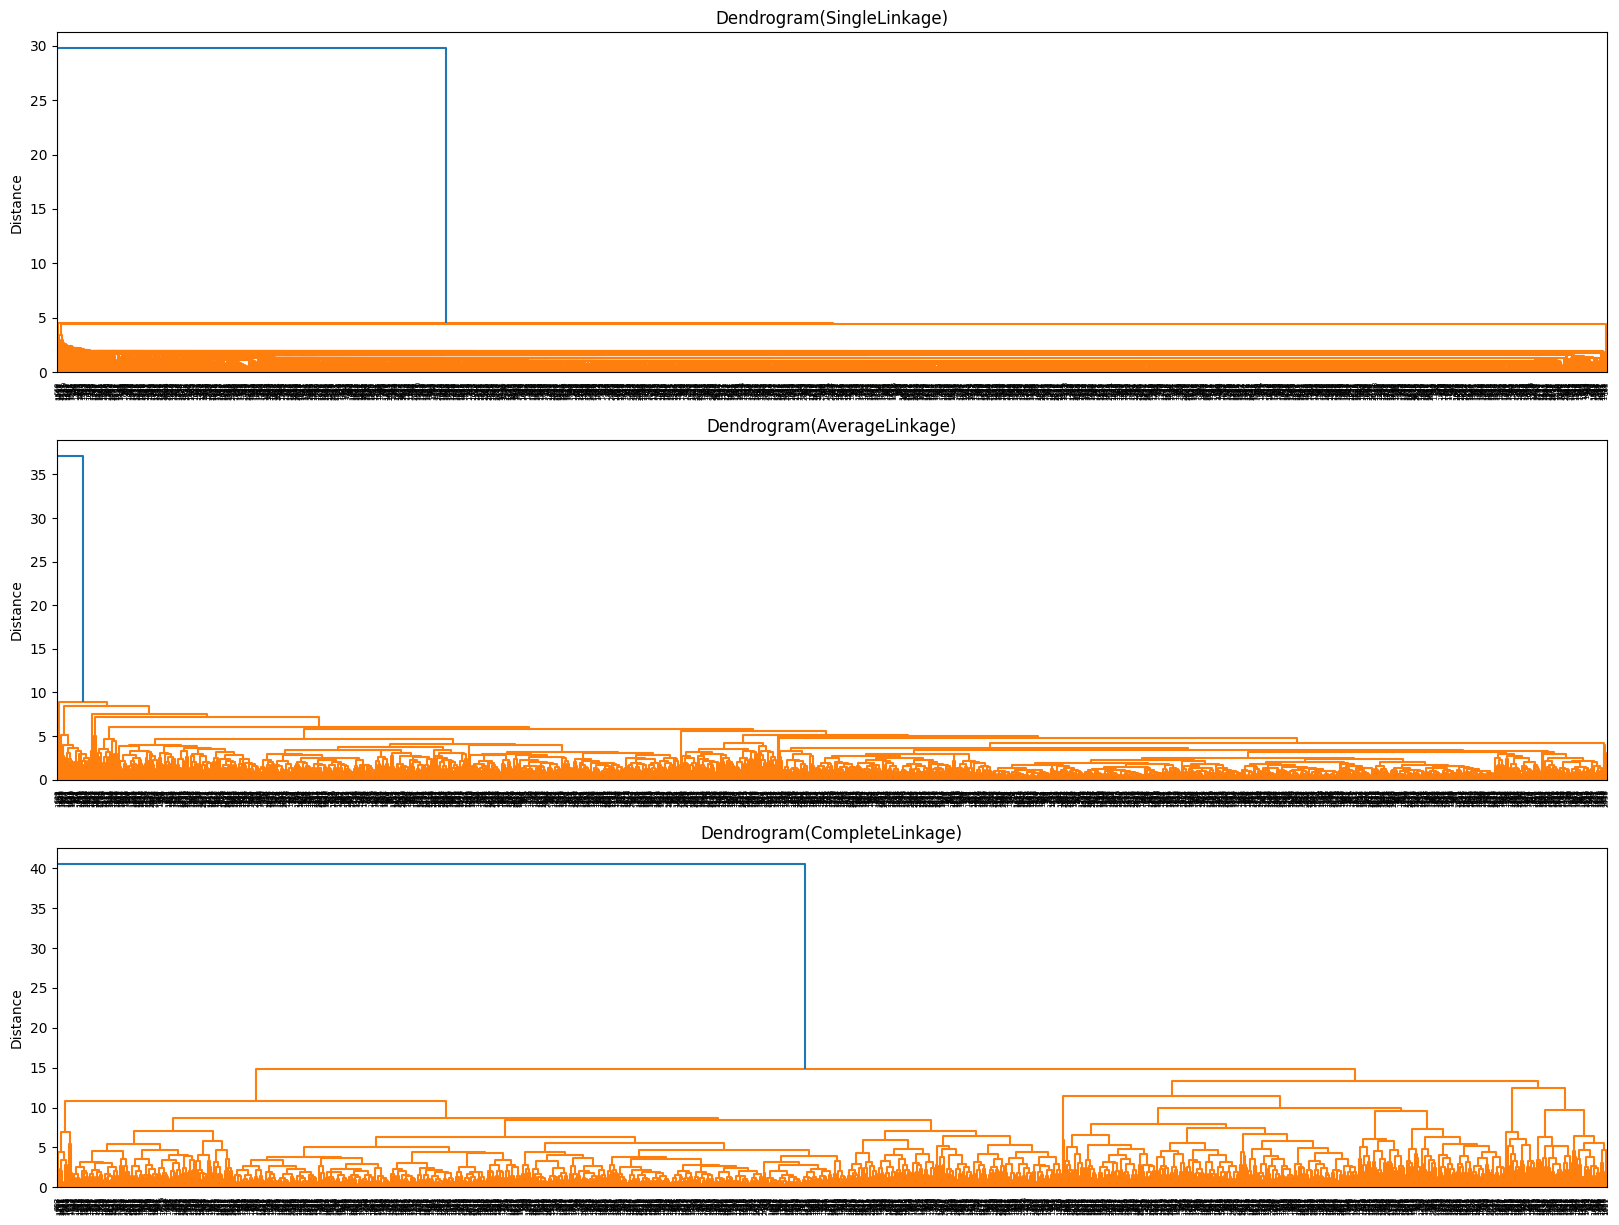

In [ ]:
methods = ['single', 'average', 'complete']

fig, axs = plt.subplots(len(methods), 1, figsize=(20, 15))

for x, method in enumerate(methods):
  dendro = linkage(pca_hc_copy, metric = 'euclidean', method = method)
  dendrogram(dendro, ax = axs[x]);
  axs[x].set_title(f'Dendrogram({method.capitalize()}Linkage)')
  axs[x].set_ylabel('Distance')

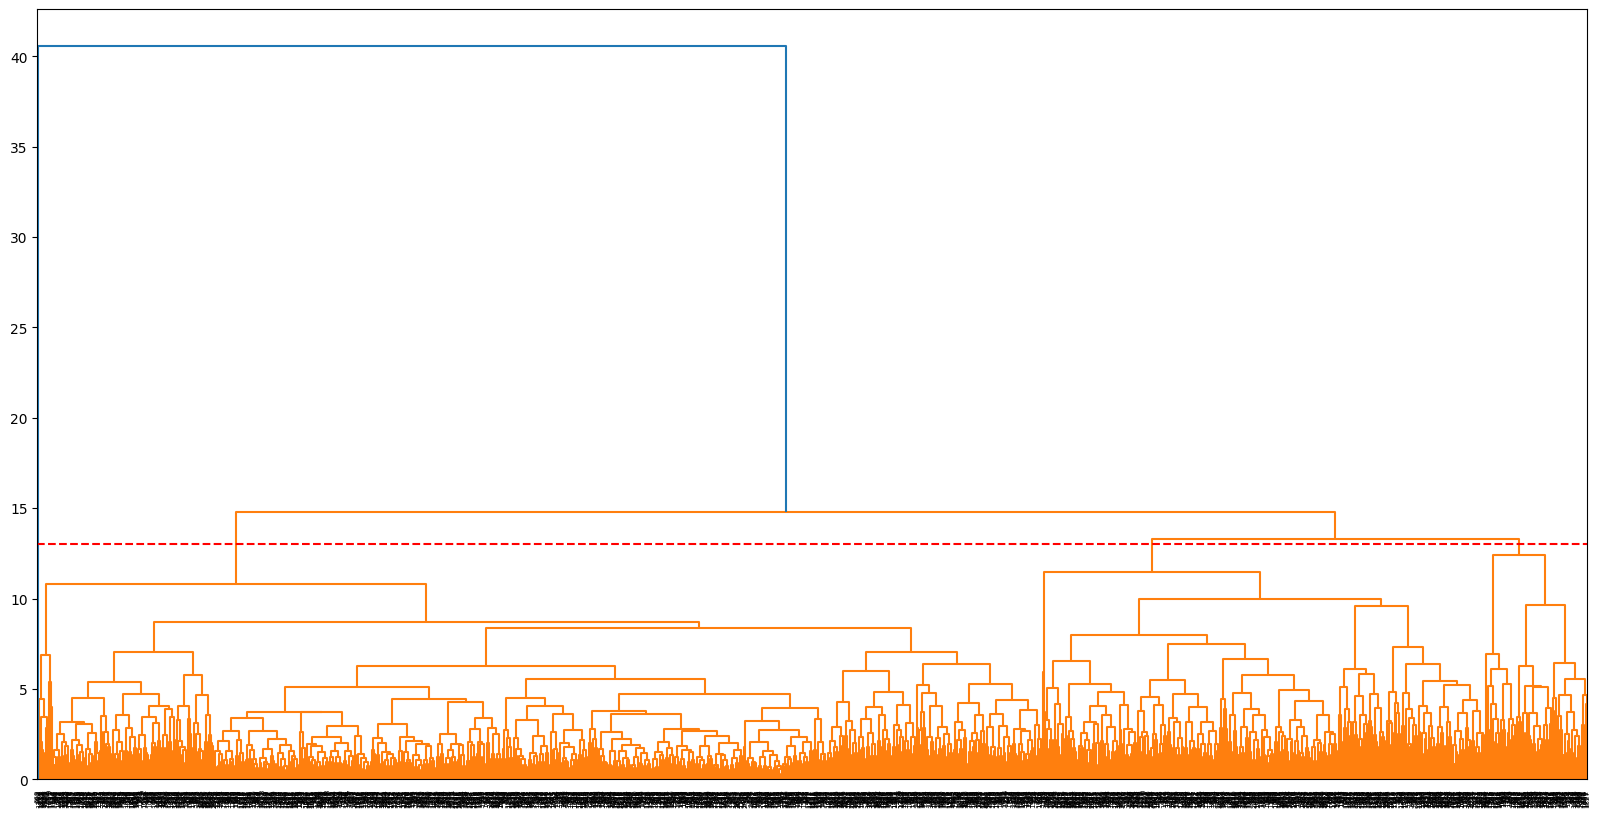

In [ ]:
plt.figure(figsize=(20,10))
dendro_marked = dendrogram(linkage(pca_hc_copy, method='complete'))
plt.axhline(y=13, color='r', linestyle='--')

### **Visualize the clusters using PCA**

In [ ]:
# n= 4 clusters
hierarchical = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')
hierarchical.fit(pca_hc_copy)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [ ]:
data_hc_copy['HCLabels'] = hierarchical.labels_

In [ ]:
data_hc_copy.HCLabels.value_counts()

HCLabels
2    1334
1     588
0     135
3       1
Name: count, dtype: int64

In [ ]:
#Checking HC label = 3 with 1 count
data_hc_copy[data_hc_copy.HCLabels == 3]

Year_Birth Education Marital_Status    Income  Kidhome  Teenhome  \
687        1982       PhD       Together  160803.0        0         0   

    Dt_Customer  Recency  MntWines  MntFruits  ...  Age  total_kids_teens  \
687  2012-08-04       21        55         16  ...   34                 0   

     household_size  year  customer_lifetime  total_purchases  percent_deals  \
687               2  2012                  4                1         1500.0   

     total_accepted_campaigns  percent_accepted_campaigns  HCLabels  
687                         0                         0.0         3  

[1 rows x 36 columns]

In [ ]:
#silhoeutte score
fitpredicthc = hierarchical.fit_predict(pca_hc_copy)
hc_silhouette = silhouette_score(pca_hc_copy, fitpredicthc)
print(hc_silhouette)

0.3243622434608632


In [ ]:
hc_sil = hc_silhouette
print(hc_sil)

0.3243622434608632


### **Cluster Profiling**

In [ ]:
hc_cols = ['Income', 'Recency', 'Age', 'household_size', 'customer_lifetime', 'total_purchases', 'percent_deals', 'NumWebVisitsMonth', 'NumWebPurchases', 'NumStorePurchases',  'total_accepted_campaigns', 'percent_accepted_campaigns', 'MntGoldProds', 'MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines']

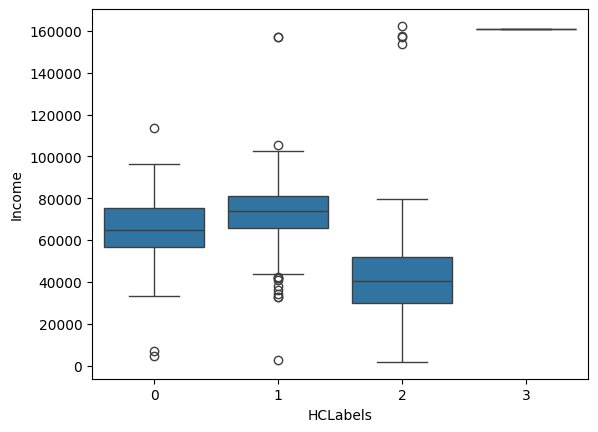

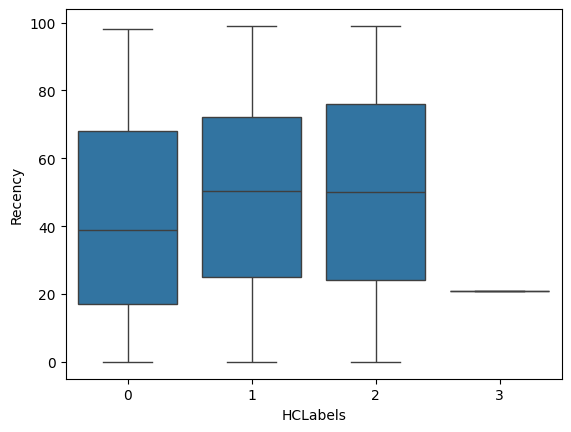

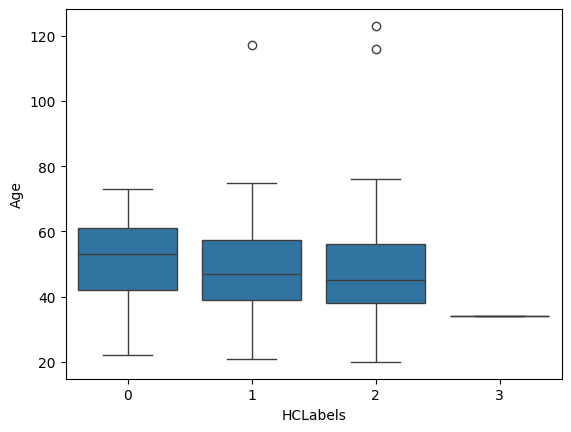

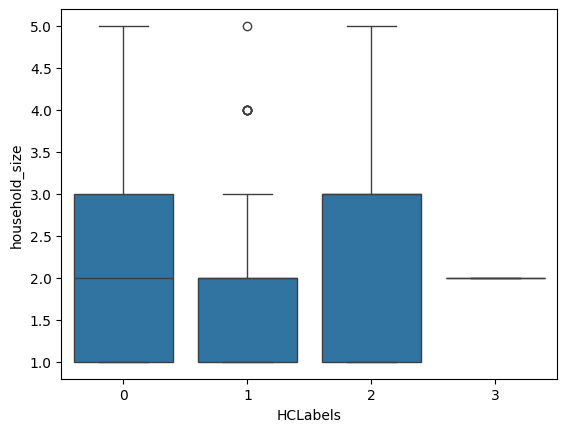

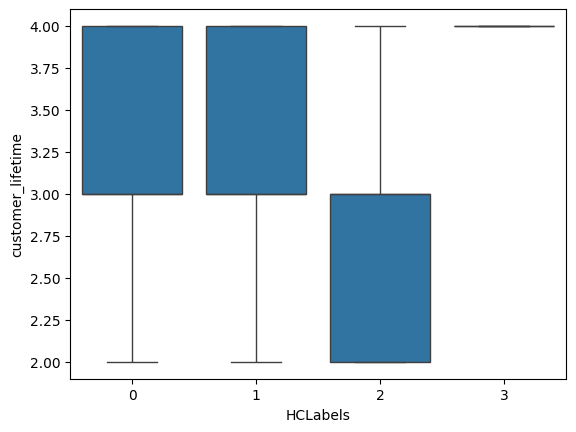

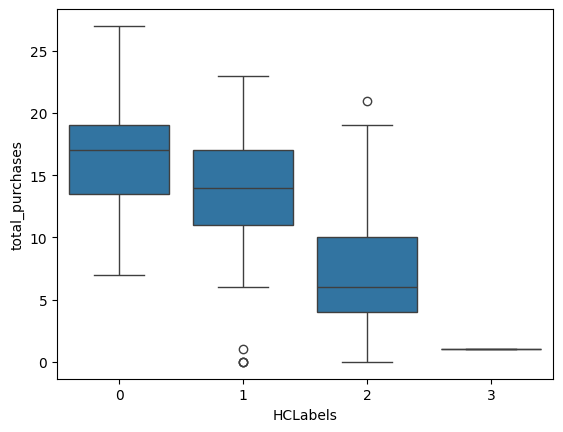

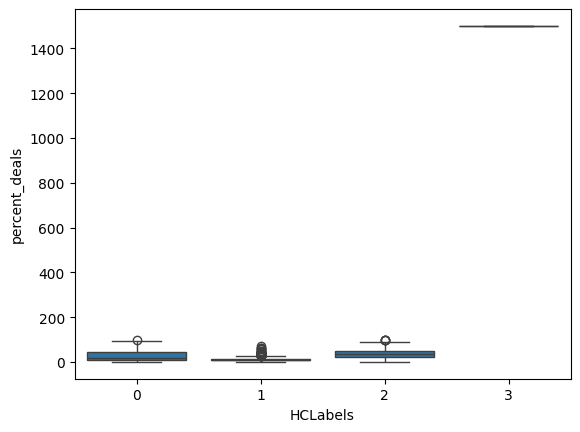

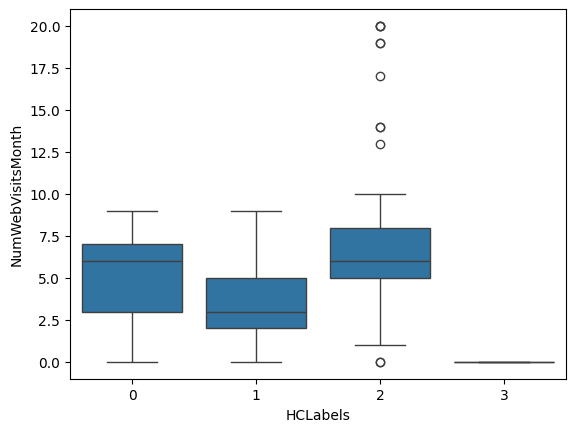

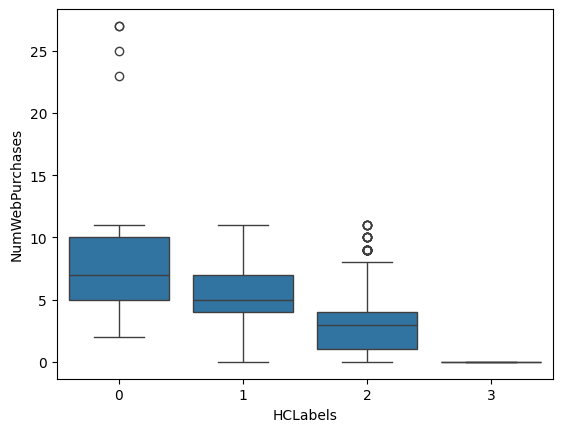

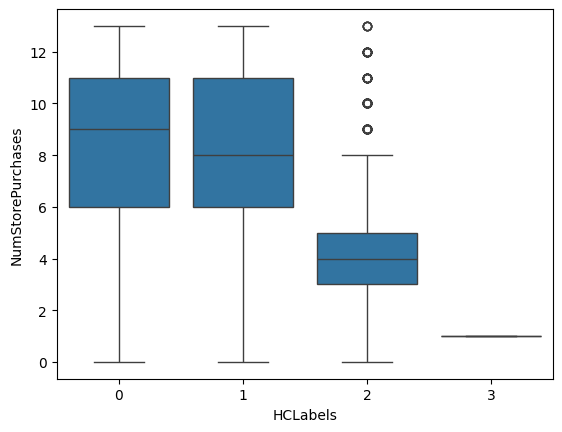

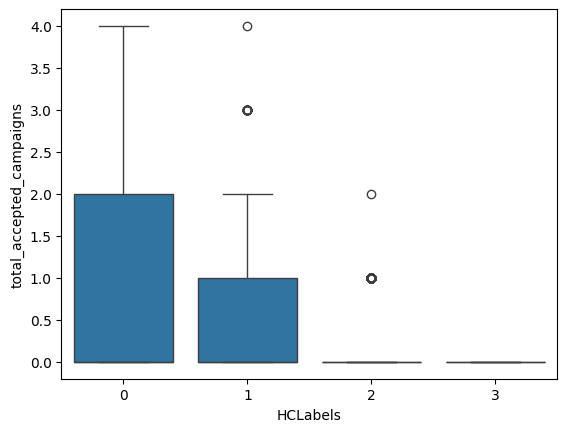

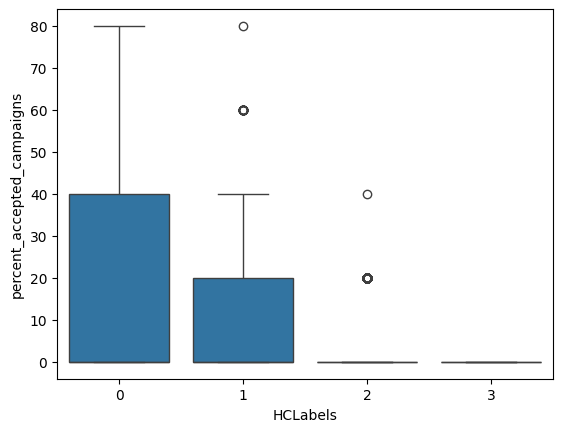

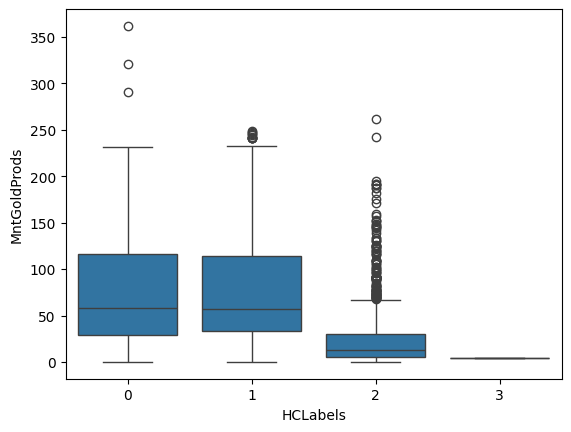

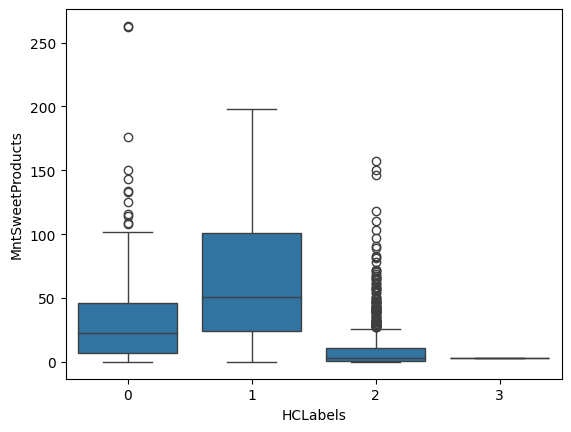

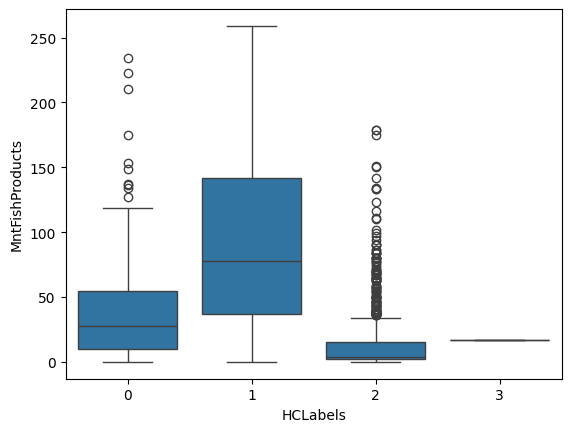

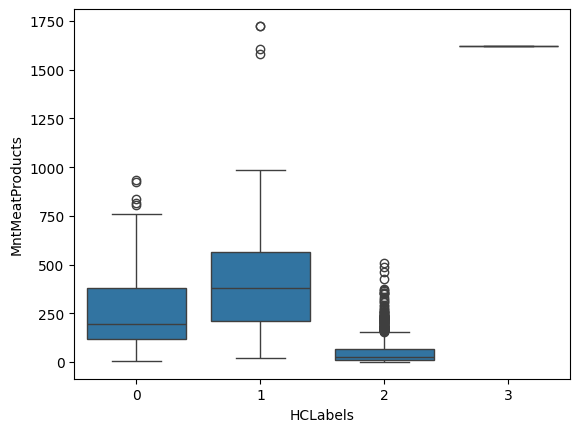

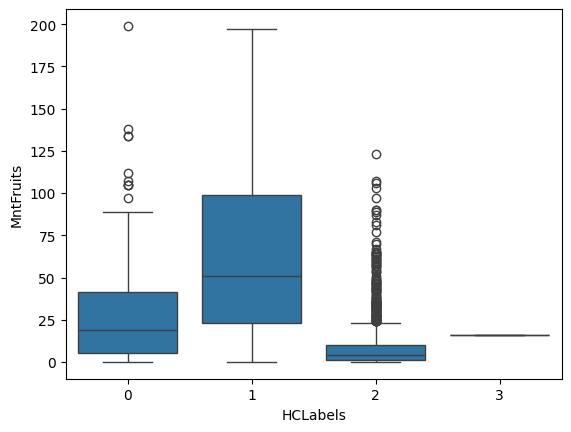

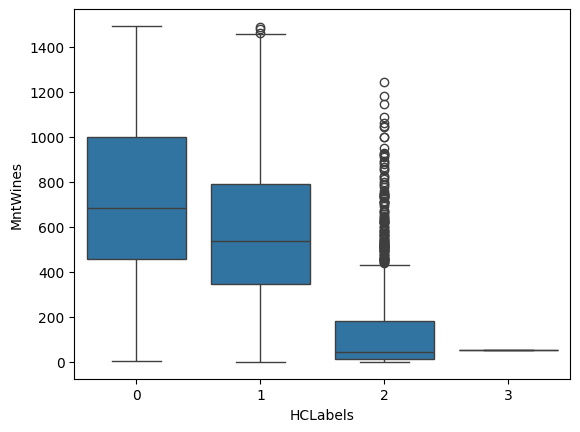

In [ ]:
for col in hc_cols:
    sns.boxplot(x = 'HCLabels', y = col, data = data_hc_copy)
    plt.show()

**Observations and Insights:**

*   When using all linkage methods, the complete method provided the most separated clusters.  When cutting at y=13, there were 3 clusters.  However, when doing a value count, there was one cluster with 1 record.  I decided to perform Hierarchical Clustering with 4 clusters so that there would be at least 3 characterizable clusters for marketing segementation purposes.


### **Characteristics of each cluster**

**Summary of each cluster:**

Cluster 1 (Label 0):
*   With the second highest income - this group commands the most total spendings as well, specifically in the Wine and Gold categories.  They are generally older than other groups, have larger household sizes and engaged the most in campaigns.
*   Group 1 does not show significant preferences for in-store vs web purchases.  

Cluster 2 (Label 1):
*   Group 2 has the highest income and generally the same age as Group 1.  Unlike Group 1, they do not have the most purchases.  Items that they do purchase the most in comparison to others is the Fruits, Meat, Fish and Sweets.
*   They purchase more in stores than other groups and second highest purhcases on the web.

Cluster 3 (Label 2):
*   Group 3 has the second-lowest income and likewise the second-lowest total purchases.  While they also have the second-lowest purchases in indivdiual categories, it is important to note that a large amount of outliers exist in this category for wine purchases - it is heavily skewed right.
*   They hae the most web visits among all the groups.

Cluster 4 (Label 3):
*   This group has only 1 customer. The member appears to have a high income $160,000+ and percent deals of 1500%, which is an error.  This group can be ignored for segmentation purposes due to error.

## **DBSCAN**

In [ ]:
pca_df_hc = pca_df.copy(deep=True)
data_db_copy = data.copy(deep=True)

In [ ]:
dbs = DBSCAN(eps =1)
data_db_copy['DBSLabels'] = dbs.fit_predict(pca_df_hc)

In [ ]:
data_db_copy['DBSLabels'].value_counts()

DBSLabels
 0     1157
-1      789
 6       18
 11      12
 1       10
 9        9
 2        9
 10       9
 8        8
 5        7
 14       6
 13       5
 3        5
 12       5
 7        5
 4        4
Name: count, dtype: int64

In [ ]:
dbscan_cols = ['Income', 'Recency', 'Age', 'household_size', 'customer_lifetime', 'total_purchases', 'percent_deals', 'NumWebVisitsMonth', 'NumWebPurchases', 'NumStorePurchases',  'total_accepted_campaigns', 'percent_accepted_campaigns', 'MntGoldProds', 'MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines']

In [ ]:
data_db_copy

Year_Birth   Education Marital_Status        Income  Kidhome  Teenhome  \
0           1957  Graduation          Alone  58138.000000        0         0   
1           1954  Graduation          Alone  46344.000000        1         1   
2           1965  Graduation       Together  71613.000000        0         0   
3           1984  Graduation       Together  26646.000000        1         0   
4           1981         PhD       Together  58293.000000        1         0   
...          ...         ...            ...           ...      ...       ...   
2233        1977  Graduation       Together  52357.791544        1         0   
2235        1967  Graduation       Together  61223.000000        0         1   
2237        1981  Graduation          Alone  56981.000000        0         0   
2238        1956      Master       Together  69245.000000        0         1   
2239        1954         PhD       Together  52869.000000        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  Age  total_kids_teens  \
0     2012-09-04       58       635         88  ...   59                 0   
1     2014-03-08       38        11          1  ...   62                 2   
2     2013-08-21       26       426         49  ...   51                 0   
3     2014-02-10       26        11          4  ...   32                 1   
4     2014-01-19       94       173         43  ...   35                 1   
...          ...      ...       ...        ...  ...  ...               ...   
2233  2013-06-02       23         9         14  ...   39                 1   
2235  2013-06-13       46       709         43  ...   49                 1   
2237  2014-01-25       91       908         48  ...   35                 0   
2238  2014-01-24        8       428         30  ...   60                 1   
2239  2012-10-15       40        84          3  ...   62                 2   

      household_size  year  customer_lifetime  total_purchases  percent_deals  \
0                  1  2012                  4               12      25.000000   
1                  1  2014                  2                3      66.666667   
2                  2  2013                  3               18       5.555556   
3                  3  2014                  2                6      33.333333   
4                  3  2014                  2               11      45.454545   
...              ...   ...                ...              ...            ...   
2233               3  2013                  3                6      66.666667   
2235               3  2013                  3               13      15.384615   
2237               1  2014                  2               15       6.666667   
2238               3  2014                  2               16      12.500000   
2239               4  2012                  4                7      42.857143   

      total_accepted_campaigns  percent_accepted_campaigns  DBSLabels  
0                            0                         0.0         -1  
1                            0                         0.0          0  
2                            0                         0.0          0  
3                            0                         0.0          0  
4                            0                         0.0         13  
...                        ...                         ...        ...  
2233                         0                         0.0          0  
2235                         0                         0.0          0  
2237                         1                        20.0         -1  
2238                         0                         0.0         -1  
2239                         0                         0.0          0  

[2058 rows x 36 columns]

In [ ]:
data_db_copy[dbscan_cols + ['DBSLabels']].groupby('DBSLabels').mean()

Income    Recency        Age  household_size  \
DBSLabels                                                       
-1         64400.128231  49.148289  48.653992        2.139417   
 0         43185.658721  48.831461  46.115817        2.355229   
 1         61053.100000  65.100000  55.000000        2.600000   
 2         23574.111111  54.666667  33.666667        1.888889   
 3         44528.000000  74.000000  43.800000        2.000000   
 4         72725.000000  68.000000  43.750000        1.250000   
 5         66941.428571  78.571429  52.285714        3.142857   
 6         31030.000000  19.222222  38.555556        2.333333   
 7         59812.400000  82.400000  65.800000        2.800000   
 8         59163.500000  40.250000  62.625000        3.000000   
 9         79062.000000  67.888889  59.222222        1.777778   
 10        56692.222222  14.666667  47.666667        2.000000   
 11        78905.750000  64.083333  44.666667        1.500000   
 12        77439.000000   9.400000  63.400000        2.000000   
 13        54237.600000  88.400000  44.200000        2.600000   
 14        65082.000000   8.500000  41.166667        2.333333   

           customer_lifetime  total_purchases  percent_deals  \
DBSLabels                                                      
-1                  3.079848        13.120406      24.309114   
 0                  2.892826         7.518583      32.143639   
 1                  3.400000        12.900000      27.347153   
 2                  3.666667         3.777778      40.740741   
 3                  3.000000         8.000000      58.333333   
 4                  2.750000        10.000000      10.795455   
 5                  2.428571        17.142857      12.638389   
 6                  2.944444         4.111111      38.518519   
 7                  3.000000        11.400000      15.682984   
 8                  2.250000        10.125000      15.150613   
 9                  3.111111        15.888889       6.329235   
 10                 2.888889        11.555556      13.561500   
 11                 2.750000        16.000000       6.812268   
 12                 3.000000        18.600000       5.386997   
 13                 3.000000        11.600000      35.132867   
 14                 3.166667        15.833333      10.530178   

           NumWebVisitsMonth  NumWebPurchases  NumStorePurchases  \
DBSLabels                                                          
-1                  4.888466         5.722433           7.397972   
 0                  5.699222         3.004322           4.514261   
 1                  7.000000         6.000000           6.900000   
 2                  7.555556         1.777778           2.000000   
 3                  6.800000         4.000000           4.000000   
 4                  1.500000         3.250000           6.750000   
 5                  4.571429         7.571429           9.571429   
 6                  6.833333         1.777778           2.333333   
 7                  2.800000         3.600000           7.800000   
 8                  2.125000         3.000000           7.125000   
 9                  2.111111         4.111111          11.777778   
 10                 3.444444         3.555556           8.000000   
 11                 1.833333         4.833333          11.166667   
 12                 3.000000         6.000000          12.600000   
 13                 4.000000         3.600000           8.000000   
 14                 4.333333         5.500000          10.333333   

           total_accepted_campaigns  percent_accepted_campaigns  MntGoldProds  \
DBSLabels                                                                       
-1                         0.717364                   14.347275     69.415716   
 0                         0.000000                    0.000000     25.629213   
 1                         1.000000                   20.000000     34.200000   
 2                         1.000000                   20.000000

### **Apply DBSCAN for the best hyperparameter and visualize the clusters from PCA**

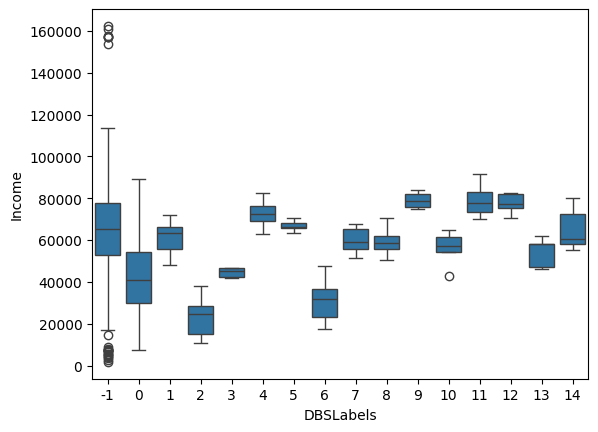

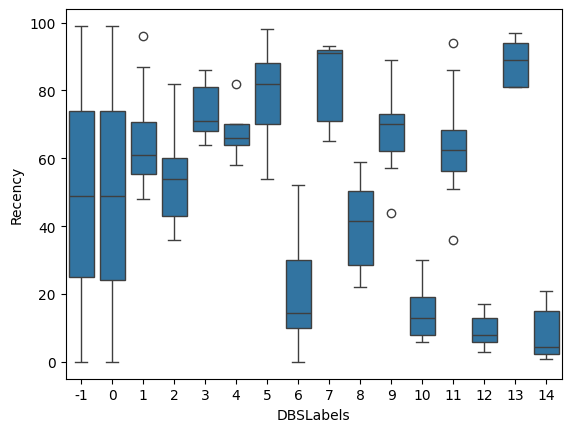

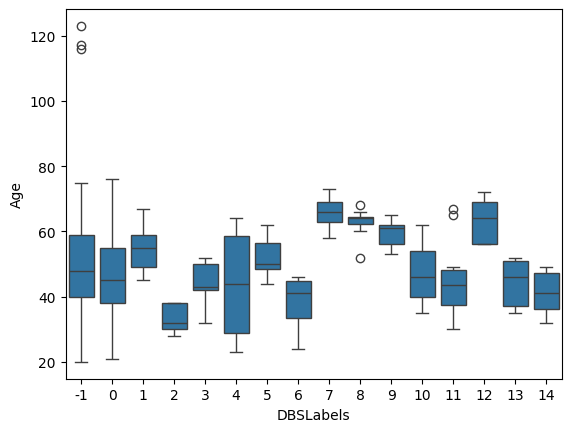

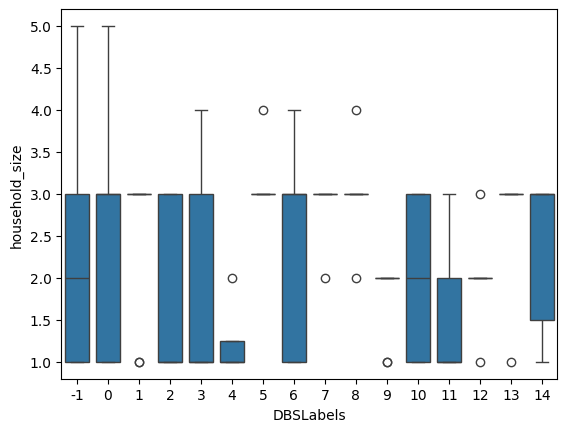

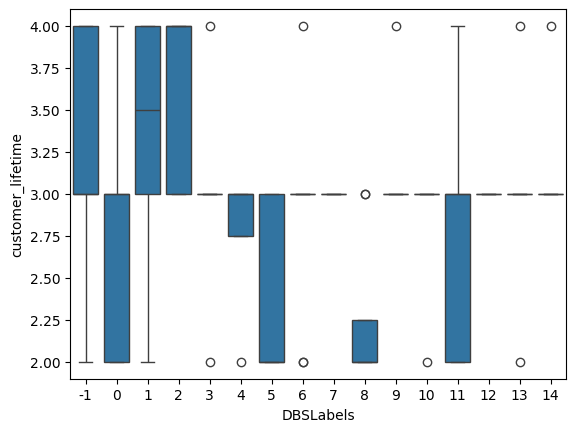

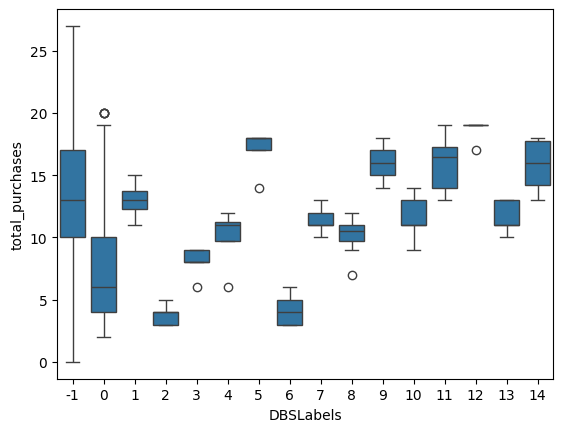

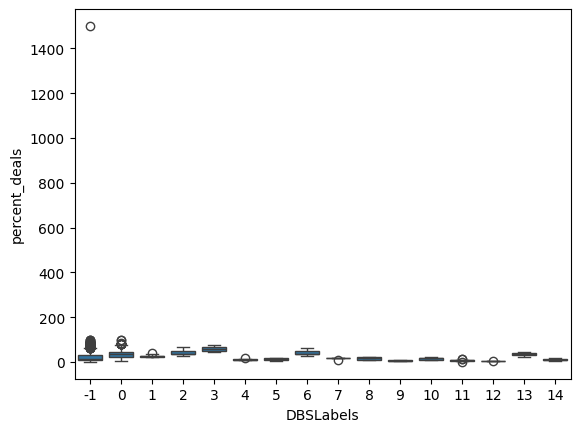

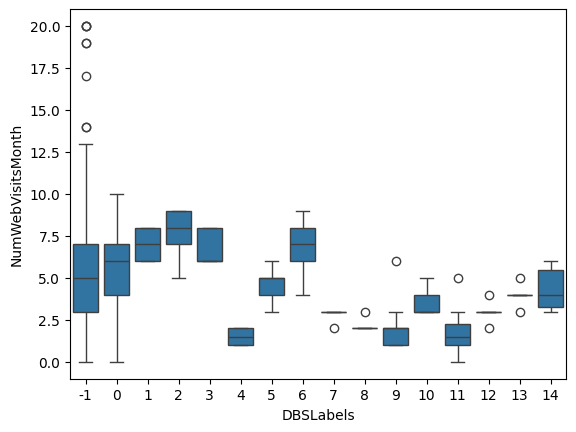

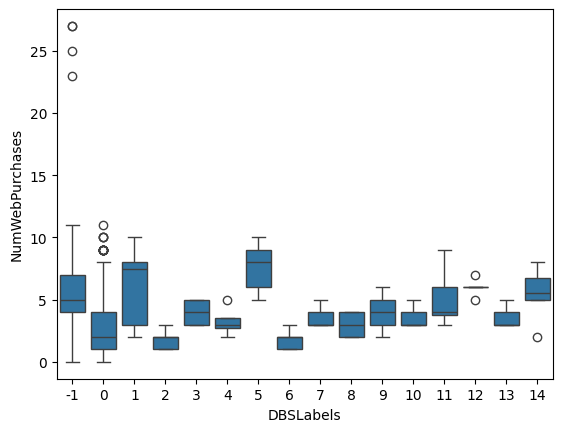

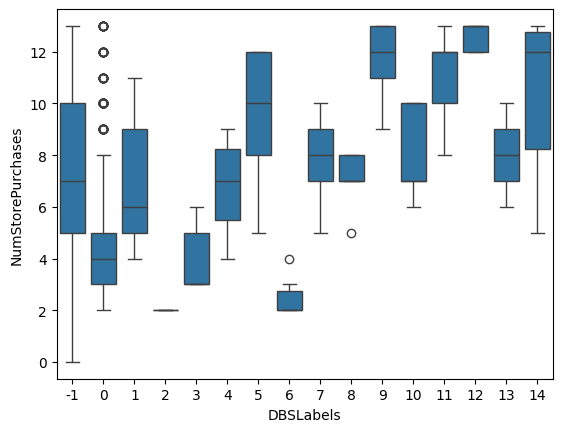

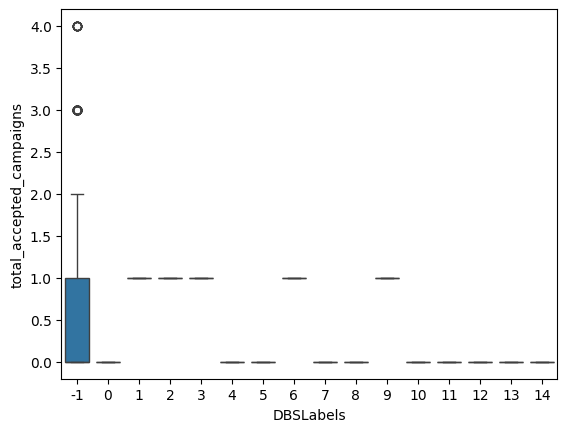

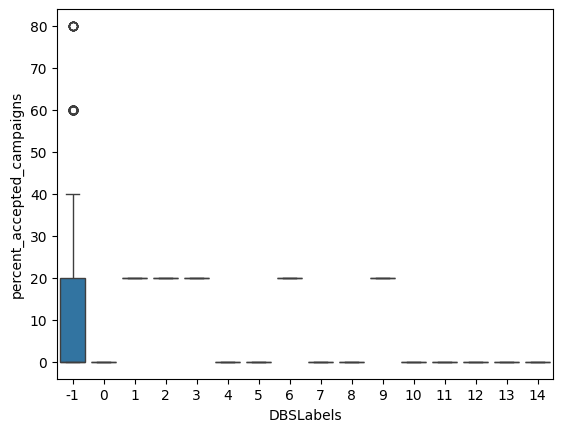

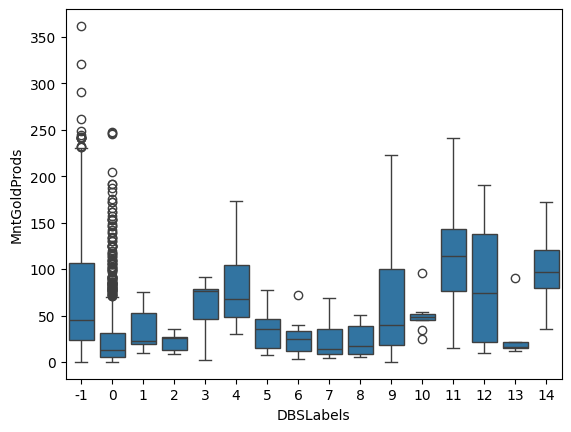

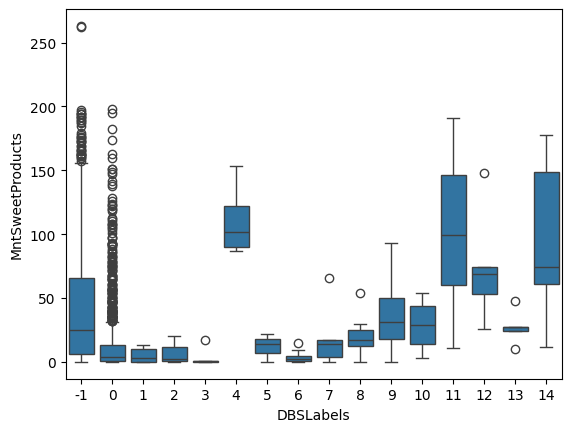

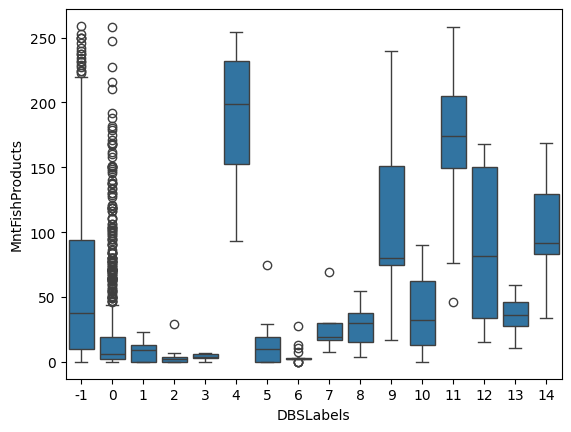

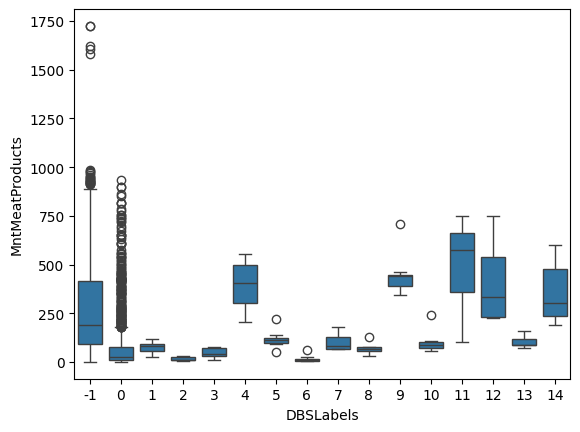

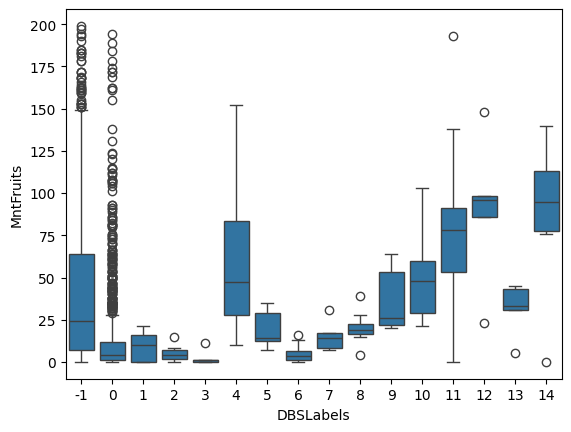

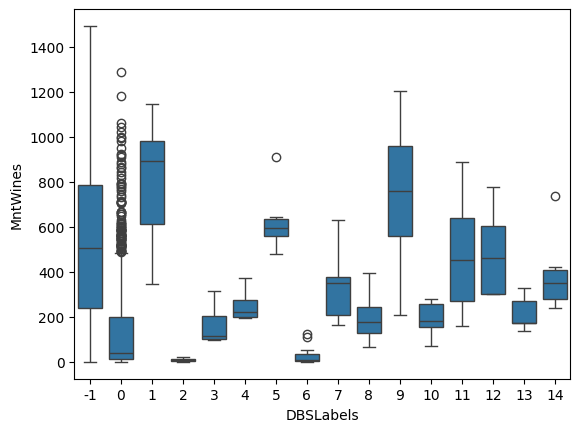

In [ ]:
for col in dbscan_cols:
    sns.boxplot(x = 'DBSLabels', y = col, data = data_db_copy)
    plt.show()

**Observations and Insights:**

In [ ]:
pca_df_hc_secondtry = pca_df.copy(deep=True)
data_db_copy_secondtry = data.copy(deep=True)

In [ ]:
dbs = DBSCAN(eps = 1, min_samples = 12)
data_db_copy_secondtry['DBSLabels'] = dbs.fit_predict(pca_df_hc)

In [ ]:
data_db_copy_secondtry['DBSLabels'].value_counts()

DBSLabels
-1    1259
 0     792
 1       7
Name: count, dtype: int64

In [ ]:
#silhouette score
fitpredictdbs = dbs.fit_predict(pca_df_hc)
dbscan_silhouette = silhouette_score(pca_df_hc, fitpredictdbs)
print(dbscan_silhouette)

0.0765654425459049


In [ ]:
db_sil = dbscan_silhouette
print(db_sil)

0.0765654425459049


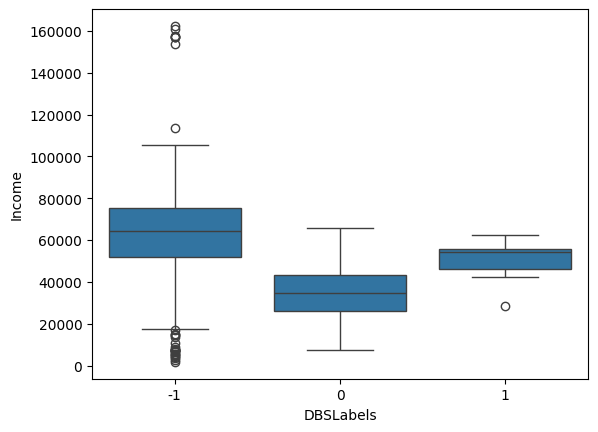

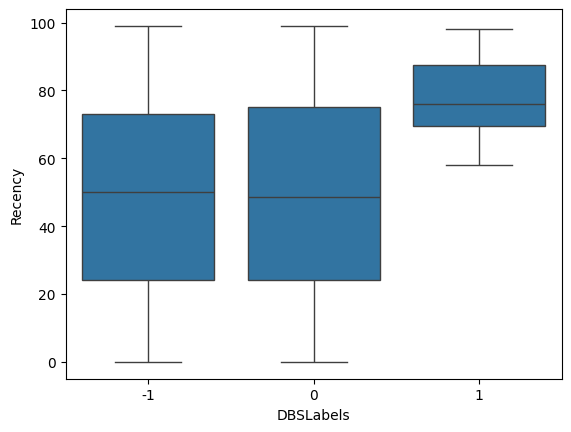

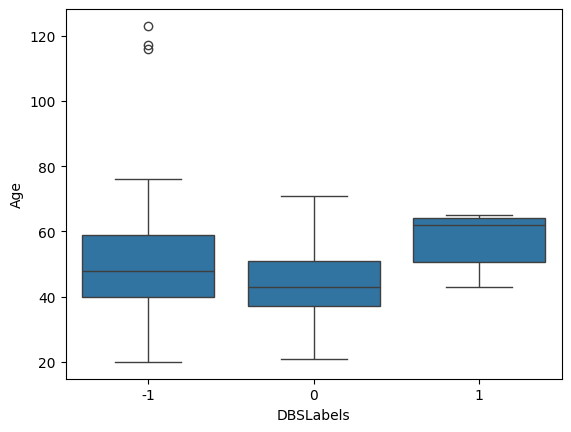

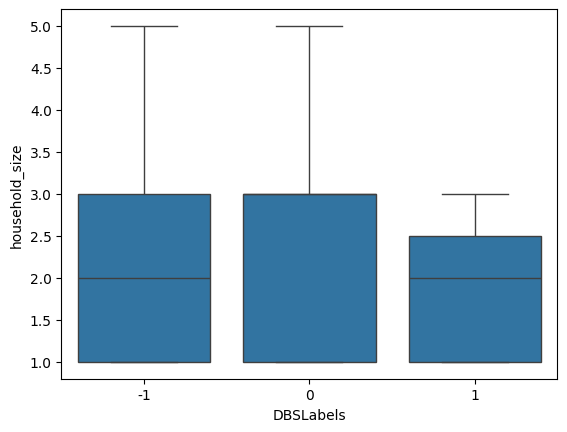

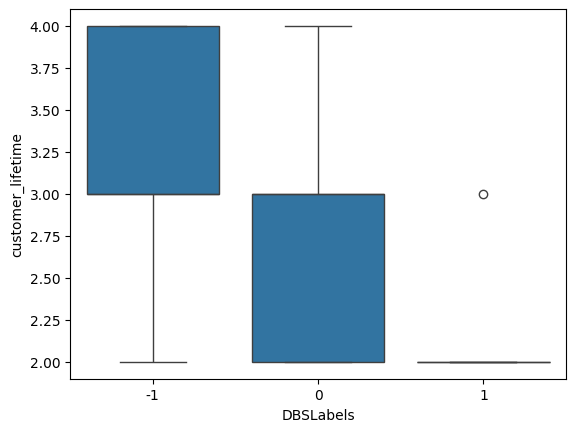

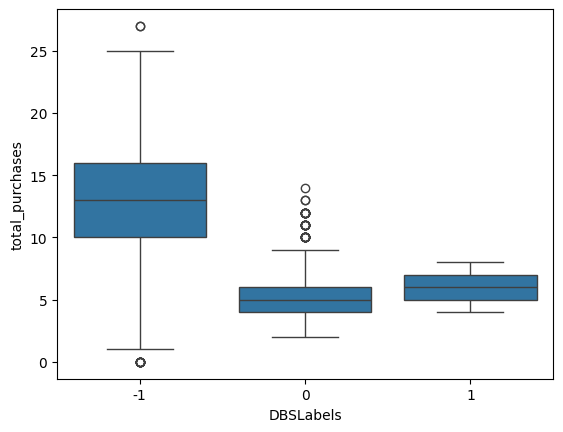

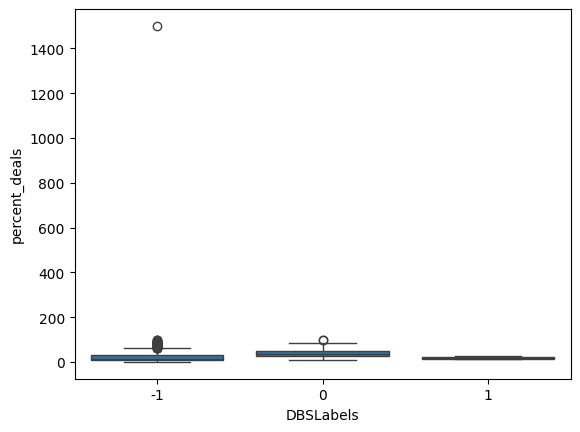

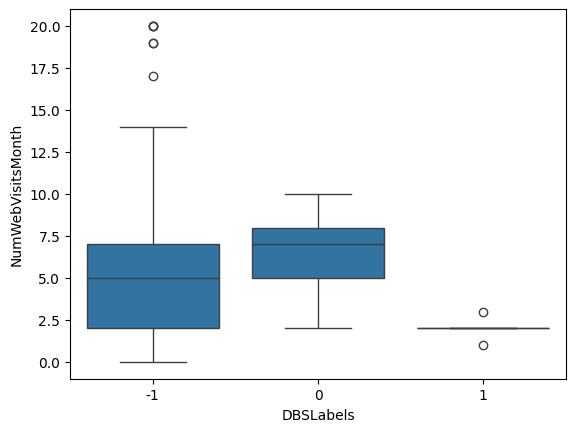

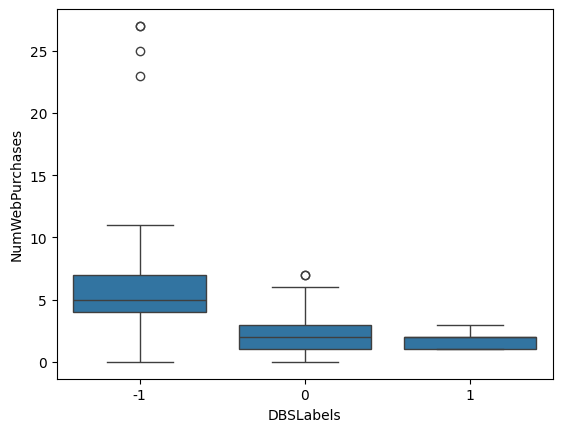

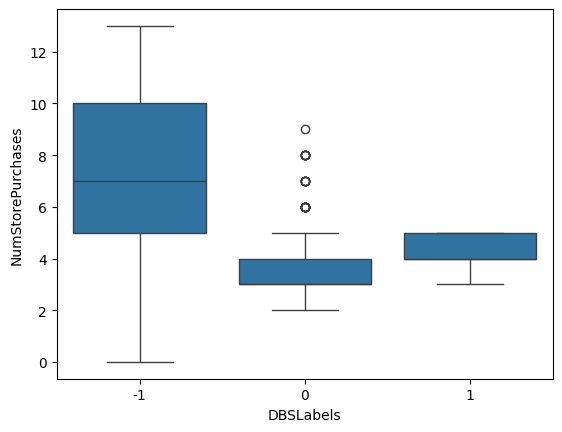

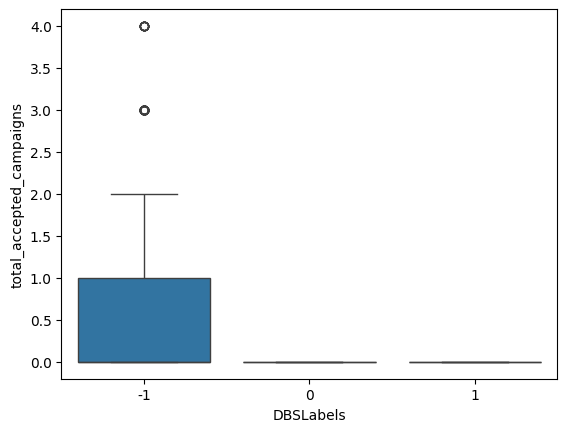

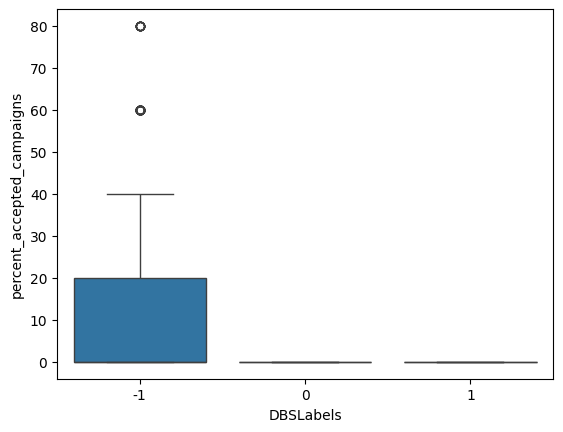

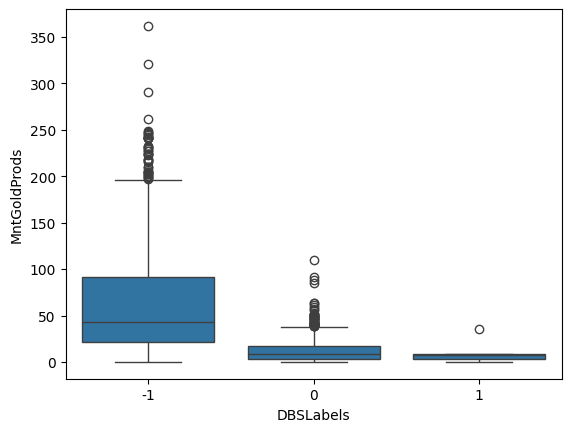

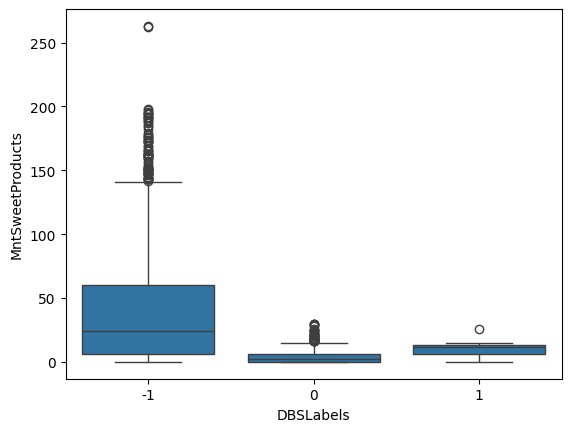

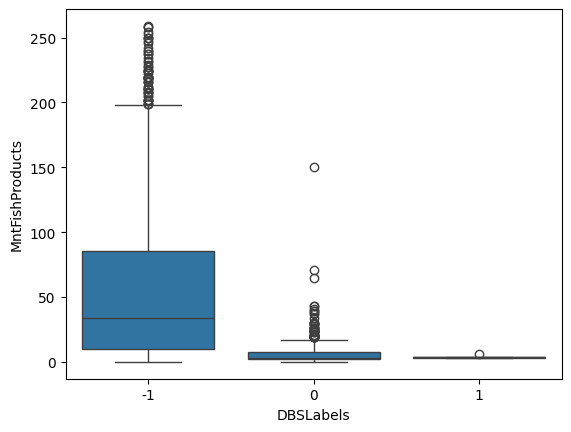

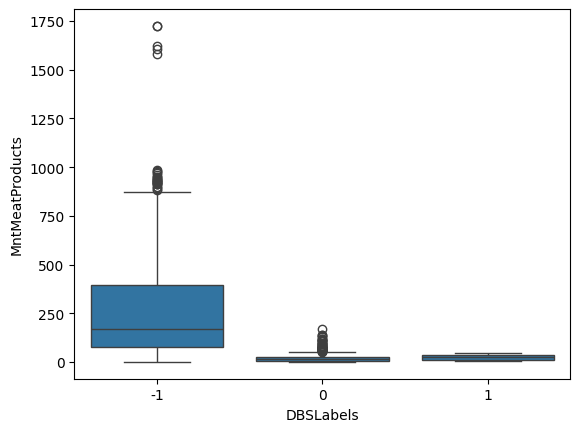

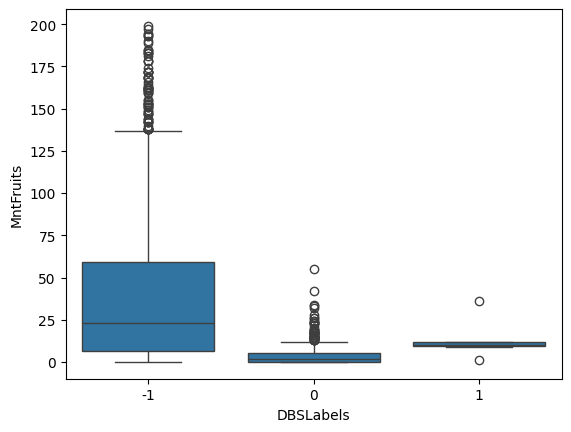

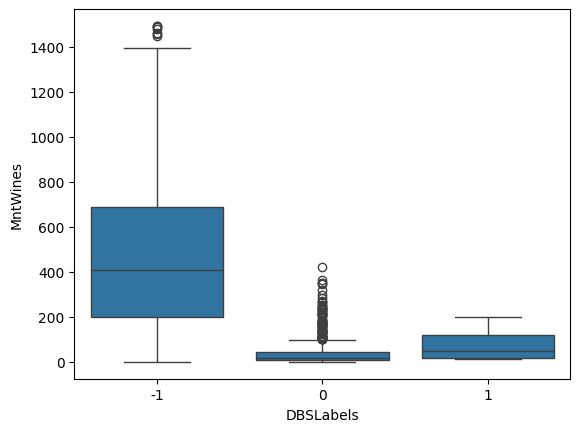

In [ ]:
for col in dbscan_cols:
    sns.boxplot(x = 'DBSLabels', y = col, data = data_db_copy_secondtry)
    plt.show()

**Observations and Insights:**

*   When changing the eps value, the number of clusters would dramatically decrease. Instead, I kept eps = 1 and changed the minimum sample number to 12.  This provided 3 clusters.  As opposed to 16 clusters before, which would perhaps only be practical for companies with large budgets, having 3 different customer segments is managable for mid-sized companies.


### **Characteristics of each cluster**

**Summary of each cluster:**

Cluster 1 (Label -1)

*   This cluster is characterized by having the highest income - they are not the oldest or youngest amon gthe groups yet due to their high income, they make the most purchases by far, especially in the categories of wine and meat.
*   This group has a large range of visitng the website and combined with their purchasing power, they also make the most web and store purchases out of all the groups.

Cluster 2 (Label 0)

*   Although this group makes the least total purchases overall and have the lowest income, they do purchase more using deals than any other group as well.  In spite of this, they do purchase more gold and fish than Group 3.
*   This group makes more web purchases than any other group and less store purchases.  Their web preference is also accentuated by the fact that they also make more visits to the company's website than any other group.

Cluster 3 (Label 1)

*   Group 3 makes more income than Group 2 but overall not as much as Group 1.  They do have the most old customers and seem to have a smaller household size.  They purchase more wine, fruits and sweets than Cluster 2.
*   Perhaps due to their older age, this groups purchases much more in stores, showing a clear preference over web.  Their web purchases and visits are very low.



## **Gaussian Mixture Model**

In [ ]:
pca_df_gmm = pca_df.copy(deep=True)
data_gmm_copy = data.copy(deep=True)

In [ ]:
gmm = GaussianMixture(n_components = 3, random_state = 1)
gmm.fit(pca_df_gmm)
data_gmm_copy['GMMLabels'] = gmm.predict(pca_df_gmm)
data_gmm_copy.GMMLabels.value_counts()

GMMLabels
1    882
0    802
2    374
Name: count, dtype: int64

In [ ]:
gmm = GaussianMixture(n_components = 5, random_state = 1)
gmm.fit(pca_df_gmm)
data_gmm_copy['GMMLabels'] = gmm.predict(pca_df_gmm)
data_gmm_copy.GMMLabels.value_counts()

GMMLabels
4    863
0    709
2    289
1    158
3     39
Name: count, dtype: int64

In [ ]:
gmm = GaussianMixture(n_components = 4, random_state = 1)
gmm.fit(pca_df_gmm)
data_gmm_copy['GMMLabels'] = gmm.predict(pca_df_gmm)
data_gmm_copy.GMMLabels.value_counts()

GMMLabels
1    894
0    653
2    324
3    187
Name: count, dtype: int64

In [ ]:
fitpredictgmm = gmm.fit_predict(pca_df_gmm)
gmm_silhouette = silhouette_score(pca_df_gmm, fitpredictgmm)
print(gmm_silhouette)

0.2593520519734237


In [ ]:
gmm_sil = gmm_silhouette
print(gmm_sil)

0.2593520519734237


**Observations and Insights:**

*   I chose to set n = 4 because previous clustering methods have shown that 3-5 clusters proivdes the most insights and differentation without becoming unmanageable.



### **Visualize the clusters using PCA**

In [ ]:
gmm_cols = ['Income', 'Recency', 'Age', 'household_size', 'customer_lifetime', 'total_purchases', 'percent_deals', 'NumWebVisitsMonth', 'NumWebPurchases', 'NumStorePurchases',  'total_accepted_campaigns', 'percent_accepted_campaigns', 'MntGoldProds', 'MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines']

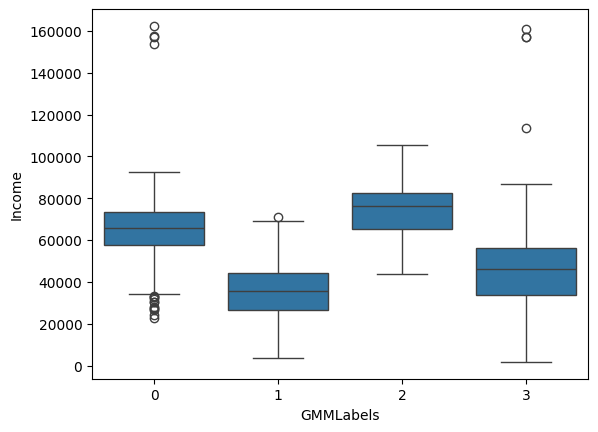

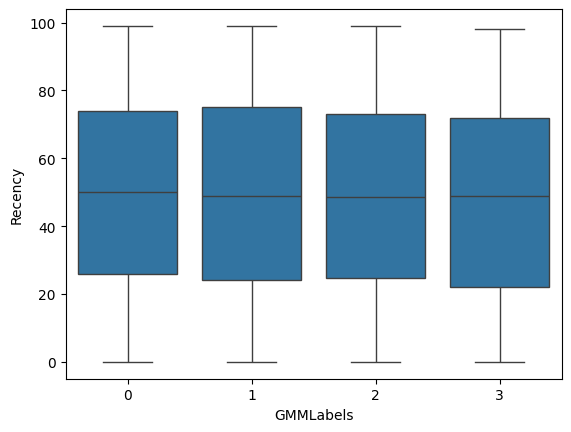

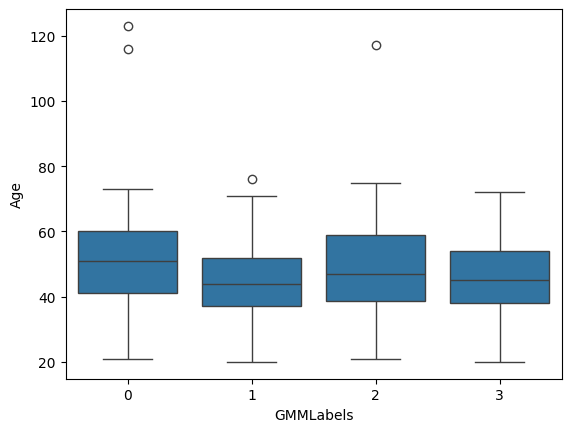

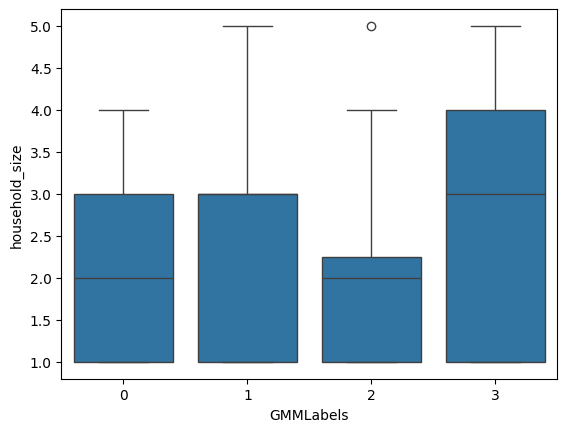

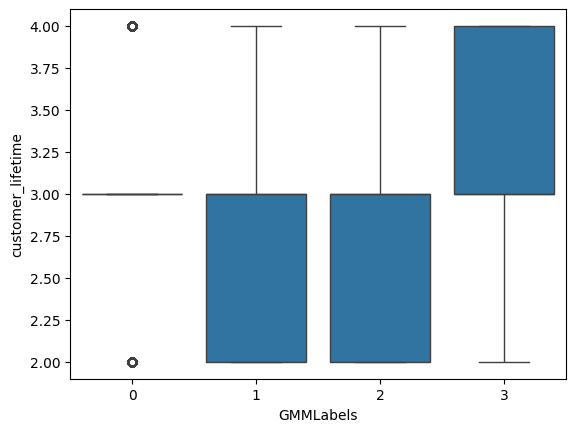

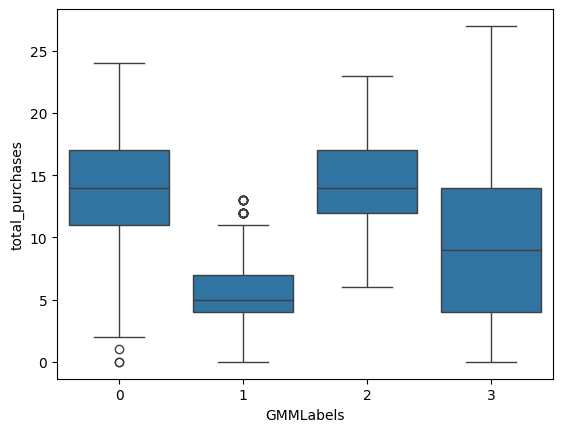

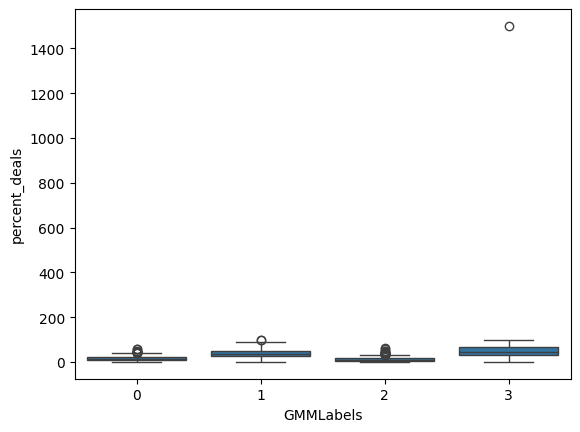

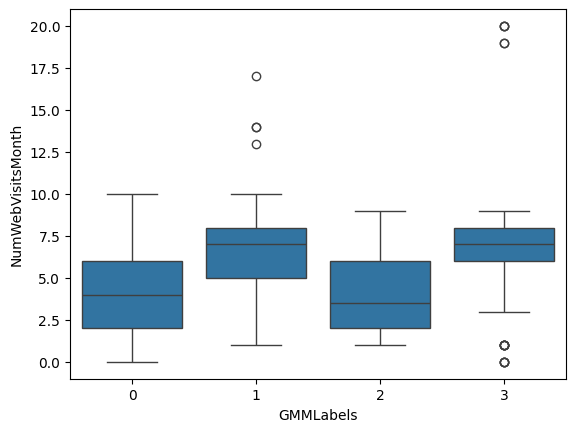

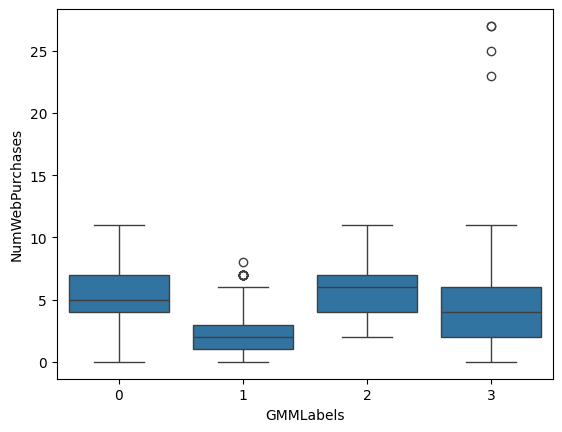

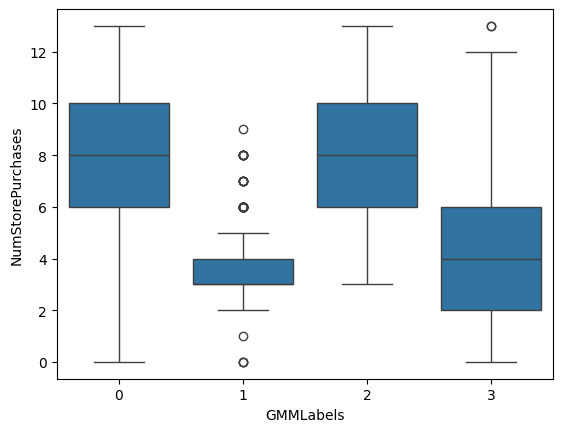

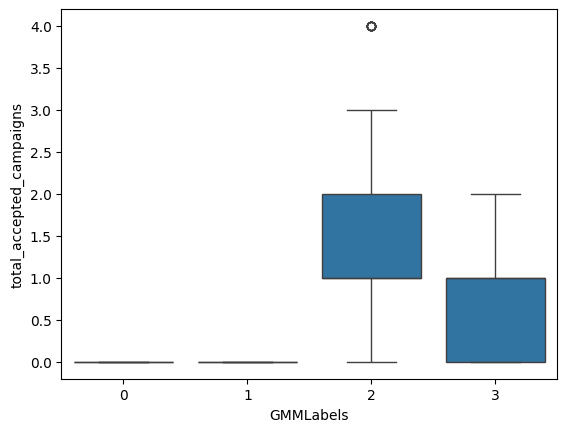

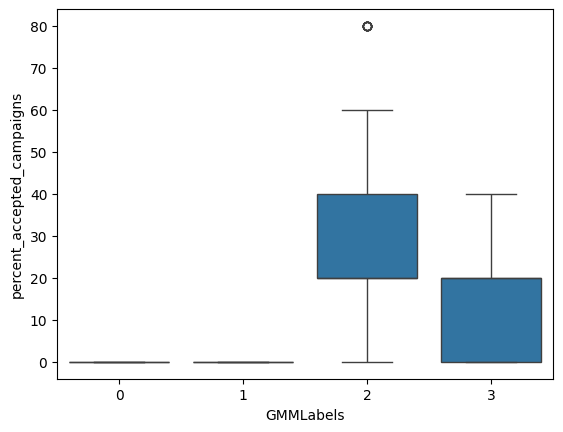

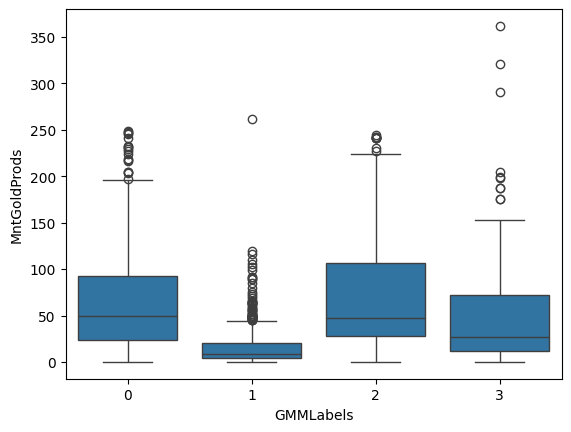

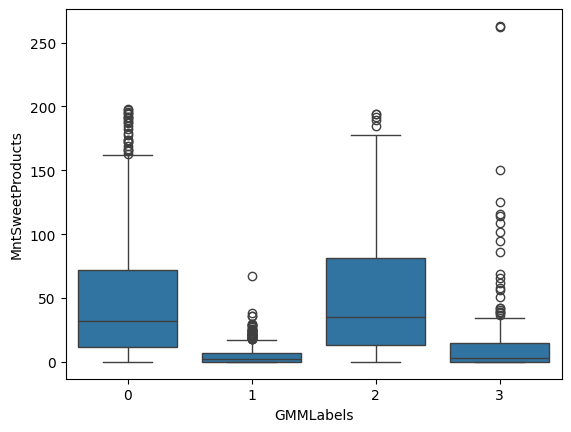

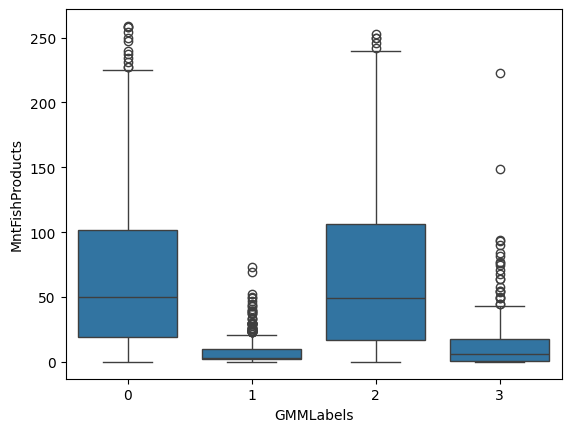

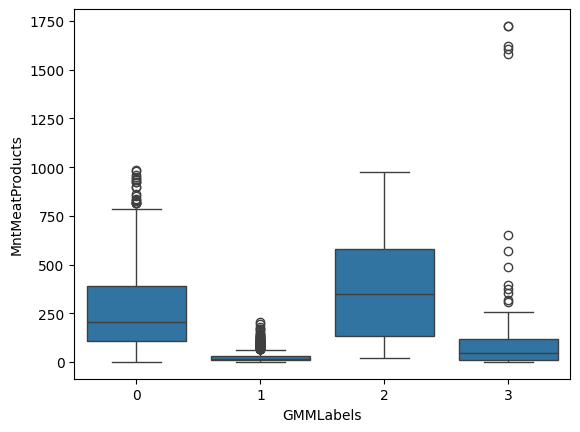

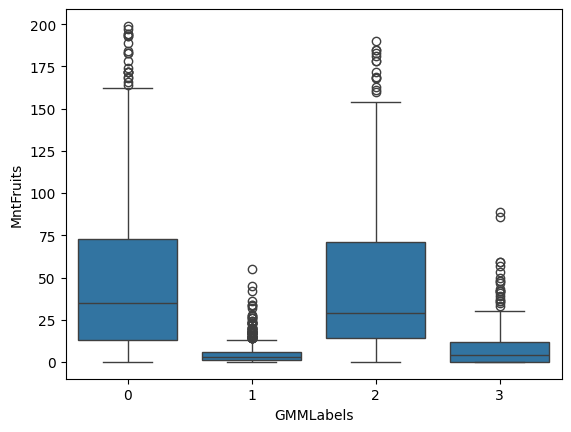

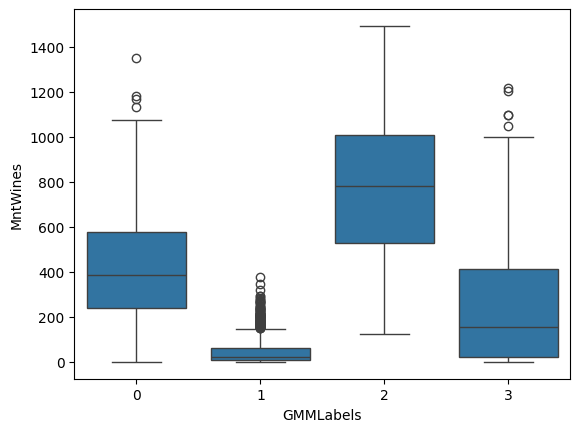

In [ ]:
for col in gmm_cols:
    sns.boxplot(x = 'GMMLabels', y = col, data = data_gmm_copy)
    plt.show()

### **Cluster Profiling**

In [ ]:
data_gmm_copy

Year_Birth   Education Marital_Status        Income  Kidhome  Teenhome  \
0           1957  Graduation          Alone  58138.000000        0         0   
1           1954  Graduation          Alone  46344.000000        1         1   
2           1965  Graduation       Together  71613.000000        0         0   
3           1984  Graduation       Together  26646.000000        1         0   
4           1981         PhD       Together  58293.000000        1         0   
...          ...         ...            ...           ...      ...       ...   
2233        1977  Graduation       Together  52357.791544        1         0   
2235        1967  Graduation       Together  61223.000000        0         1   
2237        1981  Graduation          Alone  56981.000000        0         0   
2238        1956      Master       Together  69245.000000        0         1   
2239        1954         PhD       Together  52869.000000        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  Age  total_kids_teens  \
0     2012-09-04       58       635         88  ...   59                 0   
1     2014-03-08       38        11          1  ...   62                 2   
2     2013-08-21       26       426         49  ...   51                 0   
3     2014-02-10       26        11          4  ...   32                 1   
4     2014-01-19       94       173         43  ...   35                 1   
...          ...      ...       ...        ...  ...  ...               ...   
2233  2013-06-02       23         9         14  ...   39                 1   
2235  2013-06-13       46       709         43  ...   49                 1   
2237  2014-01-25       91       908         48  ...   35                 0   
2238  2014-01-24        8       428         30  ...   60                 1   
2239  2012-10-15       40        84          3  ...   62                 2   

      household_size  year  customer_lifetime  total_purchases  percent_deals  \
0                  1  2012                  4               12      25.000000   
1                  1  2014                  2                3      66.666667   
2                  2  2013                  3               18       5.555556   
3                  3  2014                  2                6      33.333333   
4                  3  2014                  2               11      45.454545   
...              ...   ...                ...              ...            ...   
2233               3  2013                  3                6      66.666667   
2235               3  2013                  3               13      15.384615   
2237               1  2014                  2               15       6.666667   
2238               3  2014                  2               16      12.500000   
2239               4  2012                  4                7      42.857143   

      total_accepted_campaigns  percent_accepted_campaigns  GMMLabels  
0                            0                         0.0          0  
1                            0                         0.0          1  
2                            0                         0.0          0  
3                            0                         0.0          1  
4                            0                         0.0          0  
...                        ...                         ...        ...  
2233                         0                         0.0          1  
2235                         0                         0.0          0  
2237                         1                        20.0          2  
2238                         0                         0.0          0  
2239                         0                         0.0          1  

[2058 rows x 36 columns]

In [ ]:
data_gmm_copy[gmm_cols + ['GMMLabels']].groupby('GMMLabels').mean()

Income    Recency        Age  household_size  \
GMMLabels                                                       
0          65541.787270  49.581930  50.162328        2.029096   
1          35409.571392  48.965324  44.861298        2.485459   
2          74377.911467  48.382716  48.283951        1.919753   
3          45868.401535  47.673797  46.299465        2.636364   

           customer_lifetime  total_purchases  percent_deals  \
GMMLabels                                                      
0                   3.041348        13.744257      15.834135   
1                   2.888143         5.631991      38.727718   
2                   2.959877        14.123457      12.220019   
3                   3.112299         9.224599      53.109505   

           NumWebVisitsMonth  NumWebPurchases  NumStorePurchases  \
GMMLabels                                                          
0                   4.036753         5.529862           8.214395   
1                   6.430649         2.272931           3.359060   
2                   3.962963         5.947531           8.175926   
3                   6.839572         4.625668           4.598930   

           total_accepted_campaigns  percent_accepted_campaigns  MntGoldProds  \
GMMLabels                                                                       
0                          0.000000                    0.000000     66.255743   
1                          0.000000                    0.000000     15.271812   
2                          1.530864                   30.617284     72.907407   
3                          0.647059                   12.941176     52.144385   

           MntSweetProducts  MntFishProducts  MntMeatProducts  MntFruits  \
GMMLabels                                                                  
0                 48.226646        68.646248       268.797856  49.448698   
1                  4.804251         6.653244        25.364653   4.540268   
2                 52.916667        70.981481       383.496914  48.586420   
3                 16.032086        16.320856       121.294118  10.160428   

             MntWines  
GMMLabels              
0          424.633997  
1           49.809843  
2          785.901235  
3          262.155080

In [ ]:
data_gmm_copy[gmm_cols + ['GMMLabels']].groupby('GMMLabels').median()

Income  Recency   Age  household_size  customer_lifetime  \
GMMLabels                                                              
0          65704.0     50.0  51.0             2.0                3.0   
1          35683.0     49.0  44.0             3.0                3.0   
2          76074.5     48.5  47.0             2.0                3.0   
3          46014.0     49.0  45.0             3.0                3.0   

           total_purchases  percent_deals  NumWebVisitsMonth  NumWebPurchases  \
GMMLabels                                                                       
0                     14.0      12.500000                4.0              5.0   
1                      5.0      33.333333                7.0              2.0   
2                     14.0       8.333333                3.5              6.0   
3                      9.0      44.444444                7.0              4.0   

           NumStorePurchases  total_accepted_campaigns  \
GMMLabels                                                
0                        8.0                       0.0   
1                        3.0                       0.0   
2                        8.0                       1.0   
3                        4.0                       1.0   

           percent_accepted_campaigns  MntGoldProds  MntSweetProducts  \
GMMLabels                                                               
0                                 0.0          49.0              32.0   
1                                 0.0           9.0               2.0   
2                                20.0          47.5              35.0   
3                                20.0          27.0               3.0   

           MntFishProducts  MntMeatProducts  MntFruits  MntWines  
GMMLabels                                                         
0                     50.0            205.0       35.0     387.0  
1                      3.0             16.0        3.0      22.5  
2                     49.5            347.0       29.0     781.0  
3                      6.0             45.0        4.0     157.0

**Observations and Insights:**

*   When visualizing the clusters via boxplots and tables of the mean/median, it is apparent that certain variables are symemtric and others are skewed - the distribution of customers suggest the presence of some extremes.
*   For example, Group 2's Age is skewed positively, meaning that there are some people in this group with higher ages than most.  In contrast, Group 0's age is skewed left - the median is higher than the mean, and there are a few very young customers in this group.  Overall, it is possible to note that the groups from oldest to youngest is Group 0 > 1 > 2 >3.
*   In contrast, Customer Lifetime is largely the same at 3 years across all groups (according to the median).  There is some skewness which suggests that customers with extremely long customer lifetimes exist in Group 3, versus customers much shorter customer lifetimes exist in groups 1 and 2.
*   Variables that lend the most insights into the distictions that can be made include Income, Age, Total Purchases, Percent Deals, Number of Web Visits, Number of Purchases (Store, Web, Total), and Amount of Products.

### **Characteristics of each cluster**

**Summary of each cluster:**

Cluster 1 (Label 0)

*   From being the oldest to having the second highest income at around $65,000, this group also makes the most purchases on average alongside Group 3.  With only 12% of their purchases being deals, this group mostly purchases regularly priced products.  The household size is on average 2, which suggests that these customers live with a partner but do not have chidren; or they are single parents and live with a child.
*   Although this group does not have the highest income, they do make the most gold purchases and fish.

Cluster 2 (Label 1)

*   This group has the lowest income of all at $35,000.  Hand-in-hand with this statistic, they also make the least purchases total. They are characterized as the youngest at 44 years old.  With a typical household size of 3, they have at least one child living with them.  They make the second most purchases using deals (33%) and check the company website the most.  Despite this, they make the least store and web purchases - suggesting that they buy products only when the right price or opportunity presents itself.  

Cluster 3 (Label 2)

*   Group 3 has the highest income of all the groups at $76,000.  Additionally, they are the second-oldest at 47 years old.  Combined with the fact that they have the smallest household size, they seem to have the most disposable income and highest total spending across almost all of the categories, including wine, meat and sweets. In spite of this, they have spent the least on deals (only 8% of purchases are using deals). They are one of two groups that have accepted campaigns at 20%.
*   It is important to note that while they have the most web and store purchases, they have visited the company's website the least among all the groups.

Cluster 4 (Label 3)

*   Out of all the groups, this group made the most purchases with deals (44%).  They have one of the lowest incomes (second lowest at $46,000) and one of the youngest (45 years old) with a median household size of 3.  Again, similar to Group 2, this group perhaps represents a family with less disposable income. Alongside Group 2, they also have the most web visits per month and make overall more purchases in store and web and more individual product purchases (such as Wine and Meat) than Group 2 thanks to a slightly higher income.


## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:



In [ ]:
print('kmeans', kmeans_sil)
print('kmedoid', kmed_sil)
print('hierarchical', hc_sil)
print('dbscan', db_sil)
print('gmm', gmm_sil)

kmeans 0.38191778773640195
kmedoid 0.16067717077461152
hierarchical 0.3243622434608632
dbscan 0.0765654425459049
gmm 0.2593520519734237


When using the Silhouette Score, we can see that the model that best separates clusters well is the K-Means and Hierarchical Clustering methods.  However, their scores are 0.38 and 0.32 so there is still room to improve the score to at least have a score of 0.5.

Out of all the models, the DBSCAN technique performed the least well. It is apparent that using trial and error to select the minimum samples parameter was not as effective as the other methods which either used an elbow curve or machine learning to determine fine-tuning.

**2. Refined insights**:

Group 1: High
Group 2: Mid-high
Group 3: Mid-low
Group 4: Low

All of the models seem to suggest that are are four main clusters of customers - three different income groups (high, mid-high, mid-low low) with the high group having no children, highest total purchases, no deals used and least web visits and the mid-low group having children, lowest total purchases, the most deals used, and most web visits.

The mid-high is interestingly more likely to purchase some items at a higher amount than even the highest income group - those items include gold and fish. They are likely to purchase more on the web than the high group.

Lastly, the low group is typically the youngest, single, makes minimal purchases, and visits the website the most out of all groups while still using very little deals and making the least purchases.

For the purposes of our customer segmentation and generating insights for marketing campaigns, this would be the most pertinent strategies for each group:

*   Group 1: They are less attracted to deals and visiting the store online.  As they are the most likely to purchase items due to high disposable income, the best way to market to this group is via in-store campaigns that improve their overall experience and convenience.
*   Group 2: They typically engage in deals but to a lesser extent. Out of all groups, they are most likely to purchase items online, so marketing campaigns directed at online web purchases and improving their shopping experience online is of uptmost importance for this group.  If a specific product is directed at this group, it would be fish.
*   Group 3: The best way to target this group is via deals online.  They make less purchases overall than most groups, but marketing campaigns that engage them with timely deals would help increase revenue resulting from this group.
*   Group 4: With the most web visits but least total purchases, this group does not engage with deals or campaigns.  It is important to study this group further, but overall, they are attracted to online purchases.


**3. Proposal for the final solution design:**

Out of all the models, I believe that the Hierarchical Clustering model should be adopted.  It had one of the highest scores (0.32), and there's room to fine-tune more by further adjusting the number of clusters selected.

One reason to use Hierarchical Clustering over the better-scoring K-Means modeling method is due to the number of clusters resulting from the algorithm.  K-Means only resulted in 2 clusters, but for marketing customer segmentation purposes, this may not lend itself well to customizing campaigns.  Given that Hierarchical Clustering resulted in 4 clusters, it is more useful for customization purposes.